In [2]:
# Importamos las librerias necesarias
from Busquedas import *
import datetime
import pymongo
from pymongo import MongoClient
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
import plotly.graph_objs as go
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Descarga de Datos

## 1.1 Conexion y descarga de datos desde Instancia de BBDD NoSQL MongoDB

In [3]:
# Autentificacion
def auth_mongo(username, password, database):
    
    # Conexion con BD NoSQL MongoDB - Creacion de BD y Colección

    username_url = urllib.parse.quote_plus(username)
    password_url = urllib.parse.quote_plus(password)

    # Fuera de GCP - Direccion Ip Externa
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    # Dentro de GCP - Direccion Ip Interna
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    url = 'mongodb://%s:%s@XXXX:XXXX/'+database # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    try: 
        client = MongoClient(url % (username_url, password_url))
        print("Conectado satisfactoriamente!!!") 
    except:   
        print("No se logro conectar a MongoDB")
    return client

# Extraer datos de mongo
def extract_mongo(client, database, collection_name):
    
    try:
        db = client[database]
        collection = db[collection_name]
        info = collection.find()
        df = pd.DataFrame(list(info))
        df.drop_duplicates('id_post', inplace=True)
        df['reactions_count'] = df['reactions_count'].astype(int)
        df['date'] = df['date'].astype('datetime64[ns]')
        print("Los datos de la coleccion %s de la base de datos %s fueron extraidos satisfactoriamente!" %(collection_name, database))
    
    except:
        print("Los datos de la coleccion %s de la base de datos %s NO fueron extraidos" %(collection_name, database))
    
    return df

# Insertar un dataframe en mongo
def insert_mongo (client, database, collection_name, df):
    
    try:
        db = client[database]
        collection = db[collection_name]
        data_dict = df.to_dict("records")
        collection.insert_many(data_dict)
        print("Los datos fueron insertados correctamente en la coleccion %s, de la base de datos %s." %(collection_name, database))
    
    except:
        print("Los datos NO fueron insertados en la coleccion %s, de la base de datos %s." %(collection_name, database))
    

In [4]:
# Definicion de parametros de descarga
database = 'GNN'
client = auth_mongo('XXXX', 'XXXX', database)    # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
clave = 'fvf'

Conectado satisfactoriamente!!!


---
---
## Premium v1.1: 30-Days
---
---

In [100]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
df_30days = extract_mongo(client, database, 't_fvf_busqueda')
df_30days.shape

Los datos de la coleccion t_fvf_busqueda de la base de datos GNN fueron extraidos satisfactoriamente!


(7848, 115)

In [101]:
list(df_30days.columns)

['_id',
 'created_at',
 'id_post',
 'id_str',
 'message',
 'source',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'extended_tweet',
 'quote_count',
 'comments_count',
 'retweet_count',
 'likes_count',
 'entities',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'edit_history',
 'edit_controls',
 'editable',
 'filter_level',
 'lang',
 'matching_rules',
 'retweeted_status',
 'display_text_range',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'quoted_status_permalink',
 'extended_entities',
 'Fecha_completa',
 'date',
 'hour',
 'reactions_count',
 'id_user',
 'id_str_user',
 'name',
 'username',
 'location',
 'url_user',
 'description',
 'translator_type',
 'protected',
 'verified',
 'verified_type',
 'followers',
 'followings',
 'listed_count',
 'favourites_count',
 'statuses_count'

In [102]:
# Imprimimos informacion sobre el DataFrame
df_30days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7848 entries, 0 to 7947
Columns: 115 entries, _id to attributes
dtypes: bool(14), datetime64[ns](3), float64(3), int64(13), object(82)
memory usage: 6.2+ MB


In [103]:
# Observemos las primeras filas del DataFrame
df_30days.head()

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,category,id_place,url_place,place_type,name_place,full_name,country_code,country,bounding_box,attributes
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,NaN,None,NaN,...,Busqueda30days_21042023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,NaN,None,NaN,...,Busqueda30days_21042023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6442ae573c00c6c014a4798a,2023-04-20 23:56:18,1649200347645194243,1649200347645194243,"Nuestro pupilo, David Martinez nativo del El Tigre, Estado Anzoátegui fue fundamental para este gran objetivo de nuestra selección nacional.\n\nVIVA VENEZUELA 🇻🇪🍷 @fvf_oficial https://t.co/46H8K9p2GA",Twitter for Android,True,1.649200e+18,1649200340187619328,1.454169e+18,...,Busqueda30days_21042023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6442ae573c00c6c014a4798b,2023-04-20 23:55:48,1649200224773046277,1649200224773046277,"rt Exigimos a la @FVF_Oficial que le de contrato multianual al CT de la Sub-17, conformado por Ricardo Valiño🇦🇷 (DT), Marco Capetillo🇲🇽(AT), José Paciullo🇦🇷(PF) y Juán Pabón🇻🇪(PA), además el control de Sub-20 y Sub-23. #Caracas #CaracasFC #Venezuela #LaVintinto 👇 https://t.co/G5szqpgxWu",Twitter Web App,False,NaN,None,NaN,...,Busqueda30days_21042023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6442ae573c00c6c014a4798c,2023-04-20 23:54:56,1649200005834522626,1649200005834522626,rt @LaDivinaDiva La FVF es un dinosaurio echado encima de nuestros futbolistas.,Twitter for Android,False,NaN,None,NaN,...,Busqueda30days_21042023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_30days[['entities', 'extended_entities']][:10]

,entities,extended_entities
0,"{'hashtags': [], 'urls': [{'url': 'https://t.co/HPvhz3PzVP', 'expanded_url': 'https://twitter.com/i/web/status/1649200946419826688', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}], 'user_mentions': [], 'symbols': []}",NaN
1,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'klon_perez', 'name': 'Klon Pérez', 'id': 221829871, 'id_str': '221829871', 'indices': [3, 14]}], 'symbols': []}",NaN
2,"{'hashtags': [], 'urls': [{'url': 'https://t.co/H6wKCqfmYZ', 'expanded_url': 'https://twitter.com/i/web/status/1649200347645194243', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}], 'user_mentions': [], 'symbols': []}",NaN
3,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'CaracasFC1967', 'name': 'Caracas 1967 🔴', 'id': 1475517342759198723, 'id_str': '1475517342759198723', 'indices': [3, 17]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [33, 45]}], 'symbols': []}",NaN
4,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'luistorres167', 'name': 'Luis A. Torres', 'id': 497538063, 'id_str': '497538063', 'indices': [3, 17]}, {'screen_name': 'LaDivinaDiva', 'name': 'La Divina Diva', 'id': 49482270, 'id_str': '49482270', 'indices': [19, 32]}], 'symbols': []}",NaN
5,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'SOLOVENEX_', 'name': 'SOLOVENEX', 'id': 700738736737243138, 'id_str': '700738736737243138', 'indices': [3, 14]}, {'screen_name': 'juvenilesfvf', 'name': 'Juveniles Vinotinto', 'id': 3598733600, 'id_str': '3598733600', 'indices': [103, 116]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [119, 131]}], 'symbols': []}",NaN
6,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'dosisdepor710', 'name': 'Dosis Deportiva', 'id': 2543962176, 'id_str': '2543962176', 'indices': [3, 17]}, {'screen_name': 'SeleVinotinto', 'name': 'La Vinotinto', 'id': 2577349345, 'id_str': '2577349345', 'indices': [69, 83]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [84, 96]}, {'screen_name': 'LigaFUTVE', 'name': 'Liga FUTVE', 'id': 3242137713, 'id_str': '3242137713', 'indices': [97, 107]}, {'screen_name': 'LigaFUTVE2', 'name': 'Liga FUTVE 2', 'id': 962066728149635072, 'id_str': '962066728149635072', 'indices': [108, 119]}], 'symbols': []}",NaN
7,"{'hashtags': [{'text': 'EnVideo', 'indices': [15, 23]}], 'urls': [], 'user_mentions': [{'screen_name': 'VTVcanal8', 'name': 'VTV CANAL 8', 'id': 118864905, 'id_str': '118864905', 'indices': [3, 13]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [38, 50]}], 'symbols': []}",NaN
8,"{'hashtags': [{'text': 'FVF', 'indices': [98, 102]}], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [3, 15]}, {'screen_name': 'jandresgimenez', 'name': 'Jorge Gimenez', 'id': 113976897, 'id_str': '113976897', 'indices': [120, 135]}], 'symbols': []}",NaN
9,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'luistorres167', 'name': 'Luis A. Torres', 'id': 497538063, 'id_str': '497538063', 'indices': [3, 17]}, {'screen_name': 'LaDivinaDiva', 'name': 'La Divina Diva', 'id': 49482270, 'id_str': '49482270', 'indices': [19, 32]}], 'symbols': []}",NaN


In [105]:
df_30days.shape[0]

7848

In [106]:
df_30days[['extended_entities']].isna().sum()

extended_entities    7559
dtype: int64

In [107]:
df_30days[['extended_entities']].isna().sum()

extended_entities    7559
dtype: int64

In [108]:
df_30days[~(df_30days['extended_entities'].isna())][['entities', 'extended_entities']]

,entities,extended_entities
46,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'klon_perez', 'name': 'Klon Pérez', 'id': 221829871, 'id_str': '221829871', 'indices': [0, 11]}], 'symbols': [], 'media': [{'id': 1649185527940218882, 'id_str': '1649185527940218882', 'indices': [56, 79], 'media_url': 'http://pbs.twimg.com/media/FuMVf_mXgAIbPfg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FuMVf_mXgAIbPfg.jpg', 'url': 'https://t.co/zjIWK37XjI', 'display_url': 'pic.twitter.com/zjIWK37XjI', 'expanded_url': 'https://twitter.com/alfonzo_38825/status/1649185531857600512/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 667, 'h': 680, 'resize': 'fit'}, 'large': {'w': 750, 'h': 765, 'resize': 'fit'}, 'medium': {'w': 750, 'h': 765, 'resize': 'fit'}}}]}","{'media': [{'id': 1649185527940218882, 'id_str': '1649185527940218882', 'indices': [56, 79], 'media_url': 'http://pbs.twimg.com/media/FuMVf_mXgAIbPfg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FuMVf_mXgAIbPfg.jpg', 'url': 'https://t.co/zjIWK37XjI', 'display_url': 'pic.twitter.com/zjIWK37XjI', 'expanded_url': 'https://twitter.com/alfonzo_38825/status/1649185531857600512/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 667, 'h': 680, 'resize': 'fit'}, 'large': {'w': 750, 'h': 765, 'resize': 'fit'}, 'medium': {'w': 750, 'h': 765, 'resize': 'fit'}}}]}"
229,"{'hashtags': [{'text': 'Vinotintosub17', 'indices': [49, 64]}, {'text': 'Vinotinto', 'indices': [65, 75]}], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [76, 88]}, {'screen_name': 'juvenilesfvf', 'name': 'Juveniles Vinotinto', 'id': 3598733600, 'id_str': '3598733600', 'indices': [90, 103]}], 'symbols': [], 'media': [{'id': 1649172164958998528, 'id_str': '1649172164958998528', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/FuMJWKnX0AAFTN5.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FuMJWKnX0AAFTN5.jpg', 'url': 'https://t.co/EiLupkd8ET', 'display_url': 'pic.twitter.com/EiLupkd8ET', 'expanded_url': 'https://twitter.com/JAntonioQ_/status/1649172170436669440/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1276, 'h': 1427, 'resize': 'fit'}, 'small': {'w': 608, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1073, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 1649172164958998528, 'id_str': '1649172164958998528', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/FuMJWKnX0AAFTN5.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FuMJWKnX0AAFTN5.jpg', 'url': 'https://t.co/EiLupkd8ET', 'display_url': 'pic.twitter.com/EiLupkd8ET', 'expanded_url': 'https://twitter.com/JAntonioQ_/status/1649172170436669440/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1276, 'h': 1427, 'resize': 'fit'}, 'small': {'w': 608, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1073, 'h': 1200, 'resize': 'fit'}}}]}"
243,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [45, 57]}], 'symbols': [], 'media': [{'id': 1649170464328019970, 'id_str': '1649170464328019970', 'indices': [58, 81], 'media_url': 'http://pbs.twimg.com/media/FuMHzLRWcAIe7qV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FuMHzLRWcAIe7qV.jpg', 'url': 'https://t.co/q1g8LD6Fsg', 'display_url': 'pic.twitter.com/q1g8LD6Fsg', 'expanded_url': 'https://twitter.com/luisequint/status/1649170467964559363/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 531, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 902, 'h': 1156, 'resize': 'fit'}, 'large': {'w': 902, 'h': 1156, 'resize': 'fit'}}}]}","{'media': [{'id': 1649170464328019970, 'id_str': '1649170464328019970', 'indices': [58, 81], 'media_url': 'http://pbs.twimg.co

---
---
## Premium v1.1: Full Archive
---
---

In [109]:
# Convertir datos almacenados en MongoDB en un dataframe
# df1 = extract_mongo(client, database, collection_name)
df_full_archive = extract_mongo(client, database, 't_fvf_tag')
df_full_archive.shape

Los datos de la coleccion t_fvf_tag de la base de datos GNN NO fueron extraidos


(4100, 42)

In [110]:
# Columnas procesadas luego de la obtencion de datos de la API Full-Archive
df_full_archive.columns

Index(['_id', 'created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'edit_history', 'edit_controls', 'editable',
       'filter_level', 'lang', 'matching_rules', 'possibly_sensitive',
       'display_text_range', 'extended_tweet', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'word', 'category'],
      dtype='object')

In [111]:
# Imprimimos informacion sobre el DataFrame
df_full_archive.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        4100 non-null   object 
 1   created_at                 4100 non-null   object 
 2   id                         4100 non-null   int64  
 3   id_str                     4100 non-null   object 
 4   text                       4100 non-null   object 
 5   source                     4100 non-null   object 
 6   truncated                  4100 non-null   bool   
 7   in_reply_to_status_id      899 non-null    float64
 8   in_reply_to_status_id_str  899 non-null    object 
 9   in_reply_to_user_id        934 non-null    float64
 10  in_reply_to_user_id_str    934 non-null    object 
 11  in_reply_to_screen_name    932 non-null    object 
 12  user                       4100 non-null   object 
 13  geo                        0 non-null      objec

In [112]:
# Observemos las primeras filas del DataFrame
df_full_archive.head()

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,possibly_sensitive,display_text_range,extended_tweet,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,word,category
0,6441a2d13c00c6c014a4697d,Tue Feb 28 23:57:05 +0000 2023,1630718763631882243,1630718763631882243,rt La Federación Venezolana de Fútbol anunció oficialmente los dos amistosos de La Vinotinto para el mes de marzo. \n\n24/3 vs Arabia Saudí \n\n28/3 vs Uzbekistán \n\n¿Qué opinan de la escogencia de amistosos de Pékerman y la FVF? https://t.co/bSbIhnvaju,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
1,6441a2d13c00c6c014a4697e,Tue Feb 28 23:48:35 +0000 2023,1630716626877153280,1630716626877153280,rt ¡LA VINOTINTO TENDRÁ UNA GIRA AL MEDIO ORIENTE! 🇻🇪⚽\n\nLa @SeleVinotinto viajará a Arabia Saudí para disputar dos partidos amistosos en el mes de marzo.\n\n➡️ 24/03 🆚 Arabia Saudita 🇸🇦 \n\n➡️ 28/03 🆚 Uzbekistán 🇺🇿\n\n📸: @fvf_oficial https://t.co/AcbA3Um0w4,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
2,6441a2d13c00c6c014a4697f,Tue Feb 28 23:44:52 +0000 2023,1630715689576062976,1630715689576062976,rt ¡LA VINOTINTO TENDRÁ UNA GIRA AL MEDIO ORIENTE! 🇻🇪⚽\n\nLa @SeleVinotinto viajará a Arabia Saudí para disputar dos partidos amistosos en el mes de marzo.\n\n➡️ 24/03 🆚 Arabia Saudita 🇸🇦 \n\n➡️ 28/03 🆚 Uzbekistán 🇺🇿\n\n📸: @fvf_oficial https://t.co/AcbA3Um0w4,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
3,6441a2d13c00c6c014a46980,Tue Feb 28 23:43:07 +0000 2023,1630715249325223938,1630715249325223938,"rt Ojalá que el nuevo CT de la U17 no deje pasar desapercibido el talento de Andrew Pereira (2007 / Newell’s).\n\nDaniel Brizuela, ex director de scouting de la FVF, pujó por su convocatoria antes de renunciar.\n\nEspero que no se disuelva el interés en él. Está para grandes cosas. ⚽️🇻🇪","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
4,6441a2d13c00c6c014a46981,Tue Feb 28 23:40:54 +0000 2023,1630714691390521345,1630714691390521345,rt FVF regresará al Medio Oriente para partidos amistosos| #EUVzla | #Deportes \n\nhttps://t.co/nfkwIYiuWx,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023


In [113]:
# Observemos las ultimas filas del DataFrame
df_full_archive.tail()

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,possibly_sensitive,display_text_range,extended_tweet,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,word,category
4095,6441a34a3c00c6c014a4797c,Wed Feb 01 00:25:23 +0000 2023,1620579026099392513,1620579026099392513,Los colores no pueden borrarse @AdolfoP_Oficial @LigaFUTVE @FVF_Oficial @EdgardoCDL13_HR @DeportivoLara #KHALILENTREGAELEQUIPO https://t.co/tZ8zO8LUm0,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,...,False,"[0, 140]","{'full_text': 'Los colores no pueden borrarse @AdolfoP_Oficial @LigaFUTVE @FVF_Oficial @EdgardoCDL13_HR @DeportivoLara #KHALILENTREGAELEQUIPO https://t.co/tZ8zO8LUm0', 'display_text_range': [0, 127], 'entities': {'hashtags': [{'text': 'KHALILENTREGAELEQUIPO', 'indices': [105, 127]}], 'urls': [], 'user_mentions': [{'screen_name': 'AdolfoP_Oficial', 'name': 'Adolfo Pereira Gobernador', 'id': 1322169685387993089, 'id_str': '1322169685387993089', 'indices': [31, 47]}, {'screen_name': 'LigaFUTVE', 'name': 'Liga FUTVE', 'id': 3242137713, 'id_str': '3242137713', 'indices': [48, 58]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [59, 71]}, {'screen_name': 'EdgardoCDL13_HR', 'name': 'Edgardo Freitez', 'id': 41658550, 'id_str': '41658550', 'indices': [72, 88]}, {'screen_name': 'DeportivoLara', 'name': 'Deportivo Lara', 'id': 72552062, 'id_str': '72552062', 'indices': [89, 103]}], 'symbols': [], 'media': [{'id': 1620579024232714242, 'id_str': '1620579024232714242', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/media/Fn10CU3XEAIrUSs.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fn10CU3XEAIrUSs.jpg', 'url': 'https://t.co/tZ8zO8LUm0', 'display_url': 'pic.twitter.com/tZ8zO8LUm0', 'expanded_url': 'https://twitter.com/xavierdorta/status/1620579026099392513/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1074, 'h': 813, 'resize': 'fit'}, 'large': {'w': 1074, 'h': 813, 'resize': 'fit'}, 'small': {'w': 680, 'h': 515, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1620579024232714242, 'id_str': '1620579024232714242', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/media/Fn10CU3XEAIrUSs.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fn10CU3XEAIrUSs.jpg', 'url': 'https://t.co/tZ8zO8LUm0', 'display_url': 'pic.twitter.com/tZ8zO8LUm0', 'expanded_url': 'https://twitter.com/xavierdorta/status/1620579026099392513/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1074, 'h': 813, 'resize': 'fit'}, 'large': {'w': 1074, 'h': 813, 'resize': 'fit'}, 'small': {'w': 680, 'h': 515, 'resize': 'fit'}}}]}}",NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
4096,6441a34a3c00c6c014a4797d,Wed Feb 01 00:20:08 +0000 2023,1620577706466476034,1620577706466476034,"rt EL DEPORTIVO LARA ES EMPLEO, SON SUEÑOS DE MILES DE NIÑOS EN LAS CANTERAS QUE PREPARAN SUEÑOS VINOTINTO, EL DEPORTIVO LARA SON HINCHAS QUE AMAN LOS COLORES Y DEJARIAN LA VIDA POR SU EQUIPO #LARA @SomosAfel @DeportivoLara @FVF_Oficial https://t.co/y0bCDCfwS9","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es,BusquedaFebrero_20042023
4097,6441a34a3c00c6c014a4797e,Wed Feb 01 00:19:41 +0000 2023,1620577590468837378,1620577590468837378,"rt EL DEPORTIVO LARA ES EMPLEO, SON SUEÑOS DE MILES DE NIÑOS EN LAS CANTERAS QUE PREPARAN SUEÑOS VINOTINTO, EL DEPORTIVO LARA SON HINCHAS QUE AMAN LOS COLORES Y DEJARIAN LA VIDA POR SU EQUIPO #LARA @SomosAfel @DeportivoLara @FVF_Oficial https://t.co/y0bCDCfwS9","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fvf lang:es

In [114]:
df_full_archive[['entities', 'extended_entities']][:10]

,entities,extended_entities
0,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'klon_perez', 'name': 'Klon Pérez', 'id': 221829871, 'id_str': '221829871', 'indices': [3, 14]}], 'symbols': []}",NaN
1,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'MeridianoTV', 'name': 'Meridiano', 'id': 65489923, 'id_str': '65489923', 'indices': [3, 15]}, {'screen_name': 'SeleVinotinto', 'name': 'La Vinotinto', 'id': 2577349345, 'id_str': '2577349345', 'indices': [73, 87]}], 'symbols': []}",NaN
2,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'MeridianoTV', 'name': 'Meridiano', 'id': 65489923, 'id_str': '65489923', 'indices': [3, 15]}, {'screen_name': 'SeleVinotinto', 'name': 'La Vinotinto', 'id': 2577349345, 'id_str': '2577349345', 'indices': [73, 87]}], 'symbols': []}",NaN
3,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'carlostaracher', 'name': 'Carlos Tarache', 'id': 409602102, 'id_str': '409602102', 'indices': [3, 18]}], 'symbols': []}",NaN
4,"{'hashtags': [{'text': 'EUVzla', 'indices': [73, 80]}, {'text': 'Deportes', 'indices': [83, 92]}], 'urls': [{'url': 'https://t.co/nfkwIYiuWx', 'expanded_url': 'http://bit.ly/3Y6Habp', 'display_url': 'bit.ly/3Y6Habp', 'indices': [95, 118]}], 'user_mentions': [{'screen_name': 'ElUniversal', 'name': 'El Universal', 'id': 6015212, 'id_str': '6015212', 'indices': [3, 15]}], 'symbols': []}",NaN
5,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'carlostaracher', 'name': 'Carlos Tarache', 'id': 409602102, 'id_str': '409602102', 'indices': [3, 18]}], 'symbols': []}",NaN
6,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'elsistema', 'name': 'El Sistema', 'id': 43378801, 'id_str': '43378801', 'indices': [3, 13]}, {'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [32, 44]}, {'screen_name': 'elsistema', 'name': 'El Sistema', 'id': 43378801, 'id_str': '43378801', 'indices': [61, 71]}], 'symbols': []}",NaN
7,"{'hashtags': [{'text': 'EUVzla', 'indices': [74, 81]}, {'text': 'Deportes', 'indices': [84, 93]}], 'urls': [{'url': 'https://t.co/x1c0Jh9D3g', 'expanded_url': 'http://bit.ly/3kGQOUx', 'display_url': 'bit.ly/3kGQOUx', 'indices': [96, 119]}], 'user_mentions': [{'screen_name': 'ElUniversal', 'name': 'El Universal', 'id': 6015212, 'id_str': '6015212', 'indices': [3, 15]}], 'symbols': []}",NaN
8,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'carlostaracher', 'name': 'Carlos Tarache', 'id': 409602102, 'id_str': '409602102', 'indices': [3, 18]}], 'symbols': []}",NaN
9,"{'hashtags': [], 'urls': [{'url': 'https://t.co/sXml1NKkhS', 'expanded_url': 'https://twitter.com/i/web/status/1630712447832031248', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [0, 12]}, {'screen_name': 'elsistema', 'name': 'El Sistema', 'id': 43378801, 'id_str': '43378801', 'indices': [13, 23]}], 'symbols': []}",NaN


In [115]:
df_full_archive.shape[0]

4100

In [116]:
df_full_archive[['extended_entities']].isna().sum()

extended_entities    3938
dtype: int64

In [117]:
df_full_archive[~(df_full_archive['extended_entities'].isna())][['entities', 'extended_entities']]

,entities,extended_entities
52,"{'hashtags': [{'text': 'MusicaParaTodos', 'indices': [39, 55]}, {'text': 'UnidosPorLaPasiónVinotinto', 'indices': [57, 84]}], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [3, 15]}], 'symbols': [], 'media': [{'id': 1630637956988846081, 'id_str': '1630637956988846081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'url': 'https://t.co/BhdvBtyP4P', 'display_url': 'pic.twitter.com/BhdvBtyP4P', 'expanded_url': 'https://twitter.com/FVF_Oficial/status/1630637988165107719/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 2048, 'resize': 'fit'}}, 'source_status_id': 1630637988165107719, 'source_status_id_str': '1630637988165107719', 'source_user_id': 360671330, 'source_user_id_str': '360671330'}]}","{'media': [{'id': 1630637956988846081, 'id_str': '1630637956988846081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'url': 'https://t.co/BhdvBtyP4P', 'display_url': 'pic.twitter.com/BhdvBtyP4P', 'expanded_url': 'https://twitter.com/FVF_Oficial/status/1630637988165107719/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 2048, 'resize': 'fit'}}, 'source_status_id': 1630637988165107719, 'source_status_id_str': '1630637988165107719', 'source_user_id': 360671330, 'source_user_id_str': '360671330'}]}"
55,"{'hashtags': [{'text': 'MusicaParaTodos', 'indices': [39, 55]}, {'text': 'UnidosPorLaPasiónVinotinto', 'indices': [57, 84]}], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [3, 15]}], 'symbols': [], 'media': [{'id': 1630637956988846081, 'id_str': '1630637956988846081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'url': 'https://t.co/BhdvBtyP4P', 'display_url': 'pic.twitter.com/BhdvBtyP4P', 'expanded_url': 'https://twitter.com/FVF_Oficial/status/1630637988165107719/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 2048, 'resize': 'fit'}}, 'source_status_id': 1630637988165107719, 'source_status_id_str': '1630637988165107719', 'source_user_id': 360671330, 'source_user_id_str': '360671330'}]}","{'media': [{'id': 1630637956988846081, 'id_str': '1630637956988846081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FqEwlReWwAEmQxa.jpg', 'url': 'https://t.co/BhdvBtyP4P', 'display_url': 'pic.twitter.com/BhdvBtyP4P', 'expanded_url': 'https://twitter.com/FVF_Oficial/status/1630637988165107719/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 2048, 'resize': 'fit'}}, 'source_status_id': 1630637988165107719, 'source_status_id_str': '1630637988165107719', 'source_user_id': 360671330, 'source_user_id_str': '360671330'}]}"
148,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'FVF_Oficial', 'name': 'FVF', 'id': 360671330, 'id_str': '360671330', 'indices': [45, 57]}], 'symbols': [], 'media': [{'id': 1630592529539256320, 'id_str': '1630592529539256320', 'indices': [77, 100], 'media_url': 'http://pbs.twimg.com/media/FqEH

# 2. Procesamiento de Datos

In [118]:
def Procesamiento(df, clave):
    
    # Eliminar columna screen_name, si los datos son de la coleccion timeline
    
        
            
    #df = df.drop_duplicates(subset=['id'], keep='last')
    
    def crear_columna_fecha(df):
    
        # Crear y actulizar columna creada con la hora local (America/Caracas)
        df['created_at'] = df['created_at'].astype('datetime64[ns]')
        df["Fecha_completa"] = df['created_at'].dt.tz_localize("UTC").dt.tz_convert('America/Caracas')
        df["date"] = df.apply(lambda x: x["Fecha_completa"].strftime("%Y-%m-%d"), axis=1)
        df["hour"] = df.apply(lambda x: x["Fecha_completa"].strftime("%H"), axis=1)
        
        return df
    
    df = crear_columna_fecha(df)
    
    

   
    
    def suma_interacciones(df):
        
        # Crear columna suma_interacciones, que resulta de sumar favoritos + Rts + menciones + Respuestas
        df['reactions_count'] = df['favorite_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
    
        return df
    
    df = suma_interacciones(df)
    
    #df['sentiment'] = senti(df['text'])
    
    
    def extraer_objeto_user_cordinates_place_entities(df):
        
        # Convertir a str las siguientes columnas (objetos de Twitter)
        df.user = df.user.apply(str)
        df.coordinates = df.coordinates.apply(str)
        df.place = df.place.apply(str)
        df.entities = df.entities.apply(str)
        df.extended_entities = df.extended_entities.astype(str)

        # Extraer del objeto user todas las columnas
        user_series = df['user'].map(literal_eval).apply(pd.Series)
        user_series.rename(columns={'id': 'iduser', 'id_str': 'id_str_user', 'lang':'lang_user', 'created_at':'created_atuser', 'url':'url_user'}, inplace=True)

        # Extraer del objeto coordinates todas las columnas
        coordinates_series = df['coordinates'].map(literal_eval).apply(pd.Series)
        coordinates_series.rename(columns={'coordinates': 'coordinates_geojson'}, inplace=True)

        # Extraer del objeto place todas las columnas
        place_series = df['place'].map(literal_eval).apply(pd.Series) 
        place_series.rename(columns={'coordinates': 'coordinates_place', 'id':'id_place', 'name':'name_place', 'url':'url_place'}, inplace=True)

        # Extraer del objeto entities todas las columnas
        entities_series = df['entities'].map(literal_eval).apply(pd.Series)    
        
        try:
            
            # retweet
            df.retweeted_status = df.retweeted_status.fillna(0)
            dfr = df[(df['retweeted_status'] != 0) & (df['retweeted_status'].notnull())][['retweeted_status']]
            dfr.retweeted_status = dfr.retweeted_status.apply(str)
            rt = dfr['retweeted_status'].map(literal_eval).apply(pd.Series)
            rt.user = rt.user.apply(str)
            screen_name = rt['user'].map(literal_eval).apply(pd.Series)
            rt = rt[['id_str']]
            rt.rename(columns={'id_str':'retweet_userid_str'},inplace=True)
            screen_name.rename(columns={'id_str': 'retweet_status_id_str', 'screen_name': 'retweet_screen_name'}, inplace=True)        
            rt_total = pd.concat([rt, screen_name[['retweet_status_id_str', 'retweet_screen_name']]], axis=1)
        
        except:
            
            pass
        
        try:
            
            # quoted
            df.quoted_status = df.quoted_status.fillna(0)
            dfq = df[(df['quoted_status'] != 0) & (df['quoted_status'].notnull())][['quoted_status']]
            dfq.quoted_status = dfq.quoted_status.apply(str)
            qt = dfq['quoted_status'].map(literal_eval).apply(pd.Series)
            qt.user = qt.user.apply(str)
            screen_name_qt = qt['user'].map(literal_eval).apply(pd.Series)
            qt = qt[['id_str']]
            qt.rename(columns={'id_str':'quote_userid_str'},inplace=True)
            screen_name_qt.rename(columns={'id_str': 'quote_status_id_str', 'screen_name': 'quote_screen_name'}, inplace=True)        
            qt_total = pd.concat([qt, screen_name_qt[['quote_status_id_str', 'quote_screen_name']]], axis=1)
            
        except:
            pass 
        
        # Concatenar las series obtenidas de la extraccion de objetos en un dataframe
        
        df_total  = pd.concat([df,user_series, coordinates_series, place_series, entities_series],axis=1) 
        # dfa = dataframe all
        
        
        
        try:
            
            df_total = pd.concat([df_total, rt_total, qt_total],axis=1) 
            
        except:
            
            try:
                
                qt_total = pd.DataFrame(columns=['quote_status_id_str', 'quote_screen_name'])
                df_total = pd.concat([df_total, rt_total, qt_total],axis=1) 
                
            except:
                try:
                    
                    rt_total = pd.DataFrame(columns=['retweet_status_id_str', 'retweet_screen_name'])
                    #qt_total = pd.DataFrame(columns=['quote_status_id_str', 'quote_screen_name'])
                    df_total = pd.concat([df_total, rt_total, qt_total],axis=1) 
                    
                except:
                    
                    rt_total = pd.DataFrame(columns=['retweet_status_id_str', 'retweet_screen_name'])
                    qt_total = pd.DataFrame(columns=['quote_status_id_str', 'quote_screen_name'])
                    df_total = pd.concat([df_total, rt_total, qt_total],axis=1) 
        
        return df_total
    
    
    
    
    
     
    df = extraer_objeto_user_cordinates_place_entities(df)
    
    #df.user_mentions = df.user_mentions.apply(str)

    
    def link_tweet(dfa):
        # Agregar columna contentivo del link de la publicacion

        h = 'https://twitter.com/'
        s = '/status/'

        dfa['link'] = dfa.apply(lambda x: h+x['screen_name']+s+str(x['id_str']),axis=1)
        
        

        dfa['link_comments'] = dfa.apply(lambda x: h+str(x['in_reply_to_screen_name'])+s+str(x['in_reply_to_status_id_str']),axis=1)

        dfa['link_user_in_reply_to_screen_name'] = dfa.apply(lambda x: h+str(x['in_reply_to_screen_name']), axis=1)

        


        # Agregar columna contentiva del link del usuario

        dfa['link_user'] = dfa.apply(lambda x: h+x['screen_name'], axis=1)

        # Agregar columna contentiva del link de la fuente de publicacion

        dfa['link_fuente'] = dfa['source'].replace({r"<a href=[\"]": "", r"[\"] rel.*" : ""}, regex=True)
        
        
            
        dfa['link_retweet'] = dfa.apply(lambda x: h+str(x['retweet_screen_name'])+s+str(x['retweet_status_id_str']),axis=1)
        dfa['link_usuario_retweeted'] = dfa.apply(lambda x: h+str(x['retweet_screen_name']), axis=1)

        
        
        return dfa
    
    df = link_tweet(df)
    
    def columna_frecuente(dfa):
        # Agregar columna frecuencia fuente y modifico la columna source para quedarme con el dato de interes

        #dfa[['source']].value_counts()
        dfa['frecuencia_fuente'] = dfa['source'].map(dfa['source'].value_counts())
        
        def remove_tags(string): 
            # Eliminar etiquetas html dentro de la columna especificada de un DataFrame dado
            result = re.sub('<.*?>','',string)
            return result
        
        dfa['source'] = dfa['source'].apply(lambda cw : remove_tags(cw))
        
        return dfa
    
    df = columna_frecuente(df)
    
    def cambio_nombre_columns(df):
        df.rename(columns={
                            'screen_name':'username', 'id':'id_post', 'iduser':'id_user', 'text':'message',
                            'favorite_count':'likes_count', 'reply_count':'comments_count', 'followers':'followers',
                            'friends_count': 'followings', 
                          }, inplace=True)
        return df
    
    df = cambio_nombre_columns(df)
    
    return df


In [119]:
# Verificacion de columnas que vienen por defecto en las llamadas para cada endpoint
api_30_days = ['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'extended_tweet', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'possibly_sensitive', 'edit_history',
       'edit_controls', 'editable', 'filter_level', 'lang', 'matching_rules',
       'retweeted_status', 'display_text_range', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink']

api_full_archive = ['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'edit_history', 'edit_controls', 'editable',
       'filter_level', 'lang', 'matching_rules', 'display_text_range',
       'extended_tweet', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities']

In [120]:
# Validemos las columnas
print('30 days endpoint')
print(sorted(api_30_days))
print('Full archive endpoint')
print(sorted(api_full_archive))

30 days endpoint
['contributors', 'coordinates', 'created_at', 'display_text_range', 'edit_controls', 'edit_history', 'editable', 'entities', 'extended_tweet', 'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'matching_rules', 'place', 'possibly_sensitive', 'quote_count', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'reply_count', 'retweet_count', 'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user']
Full archive endpoint
['contributors', 'coordinates', 'created_at', 'display_text_range', 'edit_controls', 'edit_history', 'editable', 'entities', 'extended_entities', 'extended_tweet', 'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_i

In [121]:
# Corroboremos las diferencias entre columnas
print(len(api_30_days))
print(len(api_full_archive))

38
39


In [122]:
# Veamos la estructura de cada df
print(df_30days.shape)
print(df_full_archive.shape)

(7848, 115)
(4100, 42)


In [123]:
# Aplicamos la funcion Procesamiento para extraer las columnas necesarias y realizar el merge de los datos obtenidos con ambos endpoints (30-Days y Full-archive)
df_full_archive_2 = Procesamiento(df_full_archive, 'fvf')
df_full_archive_2.shape

(4100, 115)

In [124]:
# Validemos las columnas
print('30 days endpoint')
print(list(sorted(df_30days.columns)))
print('Full archive endpoint')
print(list(sorted(df_full_archive_2.columns)))

30 days endpoint
['Fecha_completa', '_id', 'attributes', 'bounding_box', 'category', 'comments_count', 'contributors', 'contributors_enabled', 'coordinates', 'country', 'country_code', 'created_at', 'created_atuser', 'date', 'default_profile', 'default_profile_image', 'description', 'display_text_range', 'edit_controls', 'edit_history', 'editable', 'entities', 'extended_entities', 'extended_tweet', 'favorited', 'favourites_count', 'filter_level', 'follow_request_sent', 'followers', 'following', 'followings', 'frecuencia_fuente', 'full_name', 'geo', 'geo_enabled', 'hashtags', 'hour', 'id_place', 'id_post', 'id_str', 'id_str_user', 'id_user', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'is_translator', 'lang', 'lang_user', 'likes_count', 'link', 'link_comments', 'link_fuente', 'link_retweet', 'link_user', 'link_user_in_reply_to_screen_name', 'link_usuario_retweeted', 'listed_count', 

In [125]:
# Veamos la estructura de cada df y corroboremos que tienen el mismo numero de columnas
print(df_30days.shape)
print(df_full_archive_2.shape)

(7848, 115)
(4100, 115)


In [126]:
# Unimos los dos df's
df = pd.concat([df_30days, df_full_archive_2], ignore_index=True)
df.shape

(11948, 116)

In [127]:
# Eliminamos los Tweets duplicados
df1 = df.drop_duplicates(subset=['id_post'], keep='last')
df1.shape

(11948, 116)

## Análisis Exploratorio de los datos 
### Data dictionary:
- https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user#:~:text=listed_count,%22listed_count%22%3A%209274

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11948 entries, 0 to 11947
Columns: 116 entries, _id to followers_count
dtypes: bool(14), datetime64[ns](1), float64(5), int64(12), object(84)
memory usage: 9.5+ MB


In [129]:
df1.head()

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,id_place,url_place,place_type,name_place,full_name,country_code,country,bounding_box,attributes,followers_count
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6442ae573c00c6c014a4798a,2023-04-20 23:56:18,1649200347645194243,1649200347645194243,"Nuestro pupilo, David Martinez nativo del El Tigre, Estado Anzoátegui fue fundamental para este gran objetivo de nuestra selección nacional.\n\nVIVA VENEZUELA 🇻🇪🍷 @fvf_oficial https://t.co/46H8K9p2GA",Twitter for Android,True,1.649200e+18,1649200340187619328,1.454169e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6442ae573c00c6c014a4798b,2023-04-20 23:55:48,1649200224773046277,1649200224773046277,"rt Exigimos a la @FVF_Oficial que le de contrato multianual al CT de la Sub-17, conformado por Ricardo Valiño🇦🇷 (DT), Marco Capetillo🇲🇽(AT), José Paciullo🇦🇷(PF) y Juán Pabón🇻🇪(PA), además el control de Sub-20 y Sub-23. #Caracas #CaracasFC #Venezuela #LaVintinto 👇 https://t.co/G5szqpgxWu",Twitter Web App,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6442ae573c00c6c014a4798c,2023-04-20 23:54:56,1649200005834522626,1649200005834522626,rt @LaDivinaDiva La FVF es un dinosaurio echado encima de nuestros futbolistas.,Twitter for Android,False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Verificar que columnas son de tipo diccionario
is_dict = df1.applymap(lambda x: isinstance(x, dict))
print(is_dict)

         _id  created_at  id_post  id_str  message  source  truncated  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
...      ...         ...      ...     ...      ...     ...        ...   
11943  False       False    False   False    False   False      False   
11944  False       False    False   False    False   False      False   
11945  False       False    False   False    False   False      False   
11946  False       False    False   False    False   False      False   
11947  False       False    False   False    False   False      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                      False               

In [131]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_dict.sum().sort_values(ascending=False)[:10]

edit_controls              11948
edit_history               11948
retweeted_status            7955
extended_tweet              2356
quoted_status_permalink      549
quoted_status                549
extended_entities            289
attributes                    96
bounding_box                  96
following                      0
dtype: int64

In [215]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 'extended_entities', 'bounding_box', 'attributes']

In [216]:
df1_ = df1.loc[:, ~df1.columns.isin(col_dict)]
df1_.shape

(11948, 107)

In [217]:
# Verificar que columnas son de tipo lista
is_list = df1.applymap(lambda x: isinstance(x, list))
print(is_list)

         _id  created_at  id_post  id_str  message  source  truncated  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
...      ...         ...      ...     ...      ...     ...        ...   
11943  False       False    False   False    False   False      False   
11944  False       False    False   False    False   False      False   
11945  False       False    False   False    False   False      False   
11946  False       False    False   False    False   False      False   
11947  False       False    False   False    False   False      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                      False               

In [218]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_list.sum().sort_values(ascending=False)[:10]

user_mentions            11948
hashtags                 11948
matching_rules           11948
symbols                  11948
withheld_in_countries    11948
urls                     11948
display_text_range        3289
media                      451
contributors_enabled         0
profile_banner_url           0
dtype: int64

In [219]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 
            'extended_entities', 'bounding_box', 'attributes', 'urls', 'withheld_in_countries', 'matching_rules', 'user_mentions', 
            'symbols', 'hashtags', 'display_text_range', 'media']

In [288]:
df1_ = df1.loc[:, ~df1.columns.isin(col_dict)]
df1_.shape

(11948, 99)

### Valores Duplicados

In [289]:
df1_[df1_.duplicated()]

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,word,category,id_place,url_place,place_type,name_place,full_name,country_code,country,followers_count


In [290]:
df1_[['followings', 'following']]

,followings,following
0,4132,None
1,1773,None
2,47,None
3,2513,None
4,765,None
...,...,...
11943,50,None
11944,388,None
11945,798,None
11946,678,None


### Valores Faltantes 

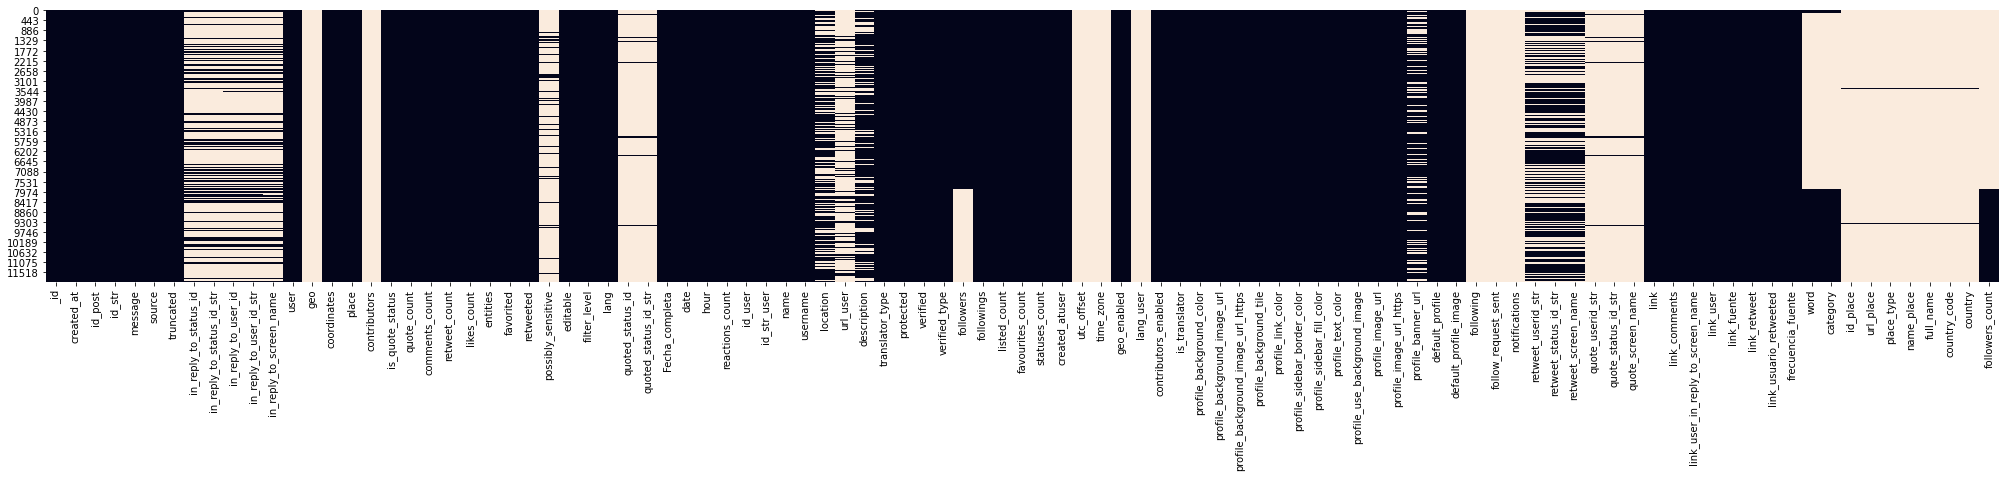

In [291]:
plt.figure(figsize=(35,5))
sns.heatmap(df1_.isnull(), cbar=False)
plt.show()

In [292]:
df1_.shape

(11948, 99)

In [293]:
# Numero de valores faltantes por variable
df1_.isna().sum().sort_values(ascending=False)[:40]

geo                          11948
contributors                 11948
notifications                11948
follow_request_sent          11948
following                    11948
utc_offset                   11948
time_zone                    11948
lang_user                    11948
country                      11852
country_code                 11852
full_name                    11852
name_place                   11852
place_type                   11852
url_place                    11852
id_place                     11852
quote_userid_str             11399
quote_status_id_str          11399
quote_screen_name            11399
quoted_status_id_str         11397
quoted_status_id             11397
possibly_sensitive            9899
url_user                      9684
in_reply_to_status_id_str     9550
in_reply_to_status_id         9550
in_reply_to_screen_name       9467
in_reply_to_user_id_str       9465
in_reply_to_user_id           9465
followers_count               7848
word                

In [294]:
# Numero de valores faltantes por variable, luego de eliminar las columnas que tienen 100% de valores missing o nulos
df1_.isna().sum().sort_values(ascending=False)[8:30]

country                      11852
country_code                 11852
full_name                    11852
name_place                   11852
place_type                   11852
url_place                    11852
id_place                     11852
quote_userid_str             11399
quote_status_id_str          11399
quote_screen_name            11399
quoted_status_id_str         11397
quoted_status_id             11397
possibly_sensitive            9899
url_user                      9684
in_reply_to_status_id_str     9550
in_reply_to_status_id         9550
in_reply_to_screen_name       9467
in_reply_to_user_id_str       9465
in_reply_to_user_id           9465
followers_count               7848
word                          7748
category                      7748
dtype: int64

### Evaluemos las columnas (siguientes) con mayor numero de valores missing o nulos. 
- Las que no tienen todas las filas con valores missing o nulos

In [295]:
df1_.country.value_counts()

Venezuela             48
United States         15
Spain                  8
Chile                  6
Colombia               4
Italy                  3
Argentina              3
Panama                 3
Dominican Republic     2
Uruguay                2
Brazil                 1
Ecuador                1
Name: country, dtype: int64

In [296]:
df1_.country_code.value_counts()

VE    48
US    15
ES     8
CL     6
CO     4
IT     3
AR     3
PA     3
DO     2
UY     2
BR     1
EC     1
Name: country_code, dtype: int64

In [297]:
df1_.full_name.value_counts()

Mérida, Venezuela                                  14
Táchira, Venezuela                                  8
Florida, USA                                        4
Caracas, Venezuela                                  4
Madrid, Spain                                       4
Orlando, FL                                         3
Trieste, Friuli-Venezia Giulia                      3
Barquisimeto, Venezuela                             3
Panama                                              3
Miranda, Venezuela                                  3
Ciudad Autónoma de Buenos Aires, Argentina          2
anto Domingo de Guzmán, Dominican Republic          2
Montevideo, Uruguay                                 2
Murfreesboro, TN                                    2
Macul, Chile                                        2
Naples, FL                                          2
Valencia, Venezuela                                 2
Macuto, Venezuela                                   1
Cúcuta, Colombia            

In [298]:
df1_.name_place.value_counts()

Mérida                                  14
Táchira                                  8
Florida                                  4
Caracas                                  4
Madrid                                   4
Orlando                                  3
Trieste                                  3
Barquisimeto                             3
Panama                                   3
Miranda                                  3
Ciudad Autónoma de Buenos Aires          2
anto Domingo de Guzmán                   2
Montevideo                               2
Murfreesboro                             2
Macul                                    2
Naples                                   2
Valencia                                 2
Macuto                                   1
Cúcuta                                   1
Avery Creek                              1
San Fernando                             1
Santiago                                 1
Bogotá, D.C.                             1
Zulia      

In [299]:
df1_.place_type.value_counts()

city       69
admin      24
country     3
Name: place_type, dtype: int64

In [300]:
df1_.id_place.value_counts()

015e5397777769a2    14
006fa5d223223cfc     8
4ec01c9dbc693497     4
00ec4c32070f5076     4
206c436ce43a43a3     4
55b4f9e5c516e0b6     3
cf5d106c94750000     3
012b6b2c110f0c21     3
9d8ae4b0fac2036a     3
01c93e351e3122fb     3
018f1cde6bad9747     2
01fcc4a23f17e1ed     2
01a9dbb9232f0fac     2
19e2bff2e89dc38e     2
00e322460b3f03b5     2
a3f971b69fefb699     2
012af435641420c7     2
00621bae6a031422     1
00a0366f1f6cd7ff     1
ac4a4ca2cb1d8a3d     1
f68227769e30abbc     1
0010b4cb51ca93d8     1
0161be1b3f98d6c3     1
01d677e97eae46b3     1
0047c84e70b9501b     1
00914f80743a0863     1
01a73d6169f504ac     1
01fde51e65075aeb     1
00e19e9a4e1d68db     1
010416b434768b1c     1
008cea206884906b     1
27485069891a7938     1
8c532f239d63fe04     1
009924a469d7ace1     1
e0060cda70f5f341     1
01a74227630d48a8     1
00d5bffa5b6661ca     1
45e3bce63f2beeee     1
00f7750f78431b5e     1
00f84d414936f28e     1
4db990e393c2e28b     1
018247693a6733dc     1
010af3a83e5ba035     1
01d461fd3da

In [301]:
df1_.quote_screen_name.value_counts()

klon_perez        53
daviladalgi       36
Naranjazos10      29
martringut        25
pulidojorge       19
                  ..
TrapieLLo          1
SVargasOK          1
stevenarce         1
giovaromero19      1
edgarddeportes     1
Name: quote_screen_name, Length: 156, dtype: int64

In [302]:
df1_.quote_status_id_str.value_counts()

221829871              53
2178952336             36
1475197978877079554    29
2732991028             25
63284839               19
                       ..
78123176                1
79218321                1
114075048               1
120936064               1
2245716574              1
Name: quote_status_id_str, Length: 156, dtype: int64

In [303]:
df1_.quote_userid_str.value_counts()

1647976346067382272    36
1524836319289036824    25
1649157405245153281    18
1646895078944768000    18
1640705706134491136    16
                       ..
1641808355969646592     1
1641608408074731520     1
1641474054254211081     1
1641464349846904833     1
1620577844840759296     1
Name: quote_userid_str, Length: 272, dtype: int64

In [304]:
df1_.quoted_status_id_str.value_counts()

1647976346067382272    36
1524836319289036824    25
1649157405245153281    18
1646895078944768000    18
1640705706134491136    16
                       ..
1641608408074731520     1
1641474054254211081     1
1641464349846904833     1
1640341651637022720     1
1620577844840759296     1
Name: quoted_status_id_str, Length: 274, dtype: int64

In [305]:
df1_.quoted_status_id.value_counts()

1.647976e+18    36
1.524836e+18    25
1.649157e+18    18
1.646895e+18    18
1.640706e+18    16
                ..
1.641608e+18     1
1.641474e+18     1
1.641464e+18     1
1.640342e+18     1
1.620578e+18     1
Name: quoted_status_id, Length: 274, dtype: int64

In [306]:
df1_.quote_userid_str.value_counts()

1647976346067382272    36
1524836319289036824    25
1649157405245153281    18
1646895078944768000    18
1640705706134491136    16
                       ..
1641808355969646592     1
1641608408074731520     1
1641474054254211081     1
1641464349846904833     1
1620577844840759296     1
Name: quote_userid_str, Length: 272, dtype: int64

In [307]:
df1_.possibly_sensitive.value_counts()

False    2049
Name: possibly_sensitive, dtype: int64

In [308]:
df1_.url_user.value_counts()

http://todofutbolnet.mforos.com                             64
http://rayozuliano.com                                      58
http://www.nuevodia.com.ve                                  56
http://www.avsphotoreport.com                               53
http://www.ffcv.es                                          34
                                                            ..
https://evtv.online/                                         1
https://www.youtube.com/channel/UCdXnwXM6uH4hBnoBpZUomjQ     1
http://misionarbol.gob.ve/web/                               1
http://www.inproas.es                                        1
http://www.estudiantesdemerida.net                           1
Name: url_user, Length: 903, dtype: int64

In [309]:
df1_.in_reply_to_status_id.value_counts()

1.639107e+18    55
1.621660e+18    38
1.640706e+18    28
1.642294e+18    23
1.621690e+18    21
                ..
1.641973e+18     1
1.641977e+18     1
1.641826e+18     1
1.641972e+18     1
1.620489e+18     1
Name: in_reply_to_status_id, Length: 1663, dtype: int64

In [310]:
df1_.in_reply_to_status_id_str.value_counts()

1639106959579201537    55
1621660111251951616    38
1640705706134491136    28
1642293509947367425    23
1621690321426849795    21
                       ..
1641972657749995521     1
1641976962699624451     1
1641826242495119361     1
1641972130173669376     1
1620489144727375873     1
Name: in_reply_to_status_id_str, Length: 1663, dtype: int64

In [311]:
df1_.in_reply_to_screen_name.value_counts()

pulidojorge       254
FVF_Oficial       169
klon_perez        164
Naranjazos10       86
carlostaracher     60
                 ... 
CarlosRafa07        1
BarakaldoCF         1
ibrahimsael71       1
elestimulo          1
Albirroja           1
Name: in_reply_to_screen_name, Length: 766, dtype: int64

In [312]:
df1_.in_reply_to_user_id.value_counts()

6.328484e+07    254
3.606713e+08    169
2.218299e+08    164
1.475198e+18     86
4.096021e+08     60
               ... 
3.045961e+08      1
3.258138e+08      1
1.389879e+09      1
1.640331e+18      1
2.999182e+08      1
Name: in_reply_to_user_id, Length: 767, dtype: int64

In [313]:
df1_.in_reply_to_user_id_str.value_counts()

63284839               254
360671330              169
221829871              164
1475197978877079554     86
409602102               60
                      ... 
304596105                1
325813822                1
1389879272               1
1640331129185005568      1
299918176                1
Name: in_reply_to_user_id_str, Length: 767, dtype: int64

In [314]:
df1_.category.value_counts()

BusquedaFebrero_20042023    4100
Busqueda30days_21042023      100
Name: category, dtype: int64

In [315]:
df1_.word.value_counts()

fvf lang:es    4200
Name: word, dtype: int64

In [316]:
df1_.location.value_counts()

Venezuela                         1061
Caracas, Venezuela                 430
Caracas                            146
Zulia, Venezuela                   109
http://pulidojorge.blogspot.co     103
                                  ... 
En El Mejor Pais Del Mundo           1
Pakistan                             1
guacara edo carabobo                 1
Aragua                               1
Benjamin Aceval-Paraguay             1
Name: location, Length: 1753, dtype: int64

In [317]:
df1_.retweet_userid_str.value_counts()

1642691764489187328    556
1627339576472702978    542
1649077390394400768    538
1640017979495645184    489
1595117112560754688    360
                      ... 
1630691128331878400      1
1630674824740716545      1
1645824548573532161      1
1645907412405108737      1
1620453090431475716      1
Name: retweet_userid_str, Length: 911, dtype: int64

In [318]:
df1_.retweet_screen_name.value_counts()

klon_perez         997
MariaGArocha       556
VTVcanal8          538
zuricht94          489
FVF_Oficial        430
                  ... 
fiesta106            1
Mabastidas           1
ramoncolmenarec      1
IvanEReyes           1
BeikerNavas          1
Name: retweet_screen_name, Length: 413, dtype: int64

In [319]:
df1_.retweet_status_id_str.value_counts()

221829871              997
1107459559445147648    556
118864905              538
143278453              489
360671330              430
                      ... 
581913598                1
62642497                 1
103929379                1
132059687                1
240496696                1
Name: retweet_status_id_str, Length: 413, dtype: int64

In [320]:
df1_.profile_banner_url.value_counts()

https://pbs.twimg.com/profile_banners/63284839/1681516767               103
https://pbs.twimg.com/profile_banners/77606751/1675097627                64
https://pbs.twimg.com/profile_banners/193504277/1563577828               56
https://pbs.twimg.com/profile_banners/385000134/1478812614               54
https://pbs.twimg.com/profile_banners/221829871/1649353605               47
                                                                       ... 
https://pbs.twimg.com/profile_banners/330215254/1675981960                1
https://pbs.twimg.com/profile_banners/1085556689401757699/1587278863      1
https://pbs.twimg.com/profile_banners/137715066/1612494205                1
https://pbs.twimg.com/profile_banners/2814770663/1647190558               1
https://pbs.twimg.com/profile_banners/1220233871712755712/1581953818      1
Name: profile_banner_url, Length: 4219, dtype: int64

In [321]:
df1_.description.value_counts()

⚽ Football Manager C.E.O @planetavto                                                                                                                             103
Somos la comunidad más grande del País. 18 años de pasión por el Fútbol Profesional venezolano en todas sus categorías.  Fundado el 27-04-2004.                   64
Cuenta oficial del Club Deportivo #RayoZuliano | Fútbol profesional venezolano | 1ra División | Categorías juveniles ⚡️ #NuestraCausa                             58
Principal diario del estado Falcón, Venezuela. Noticias e informaciones para Venezuela, Latinoamérica y el Caribe. #NuevoDía                                      56
Futbolista                                                                                                                                                        54
                                                                                                                                                                ... 
Madre y ab

### Variables Categoricas

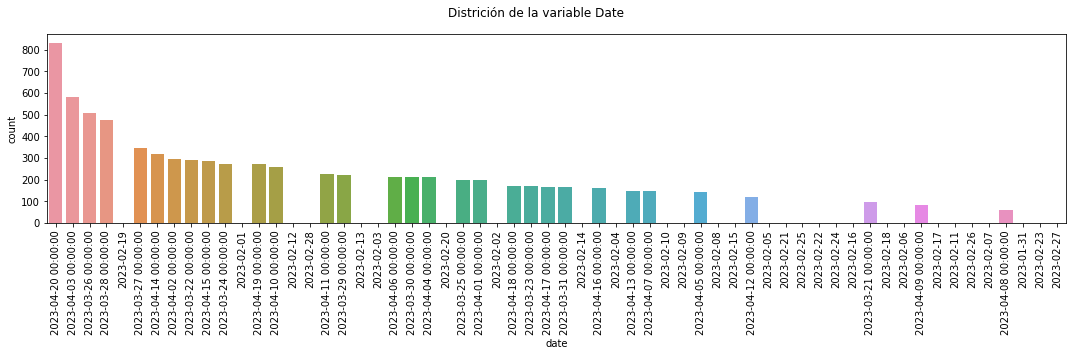

In [322]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df1_, x='date', ax=axes, order = df1_['date'].value_counts().index)
plt.xlabel('date')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable Date")
plt.tight_layout()
plt.show() 

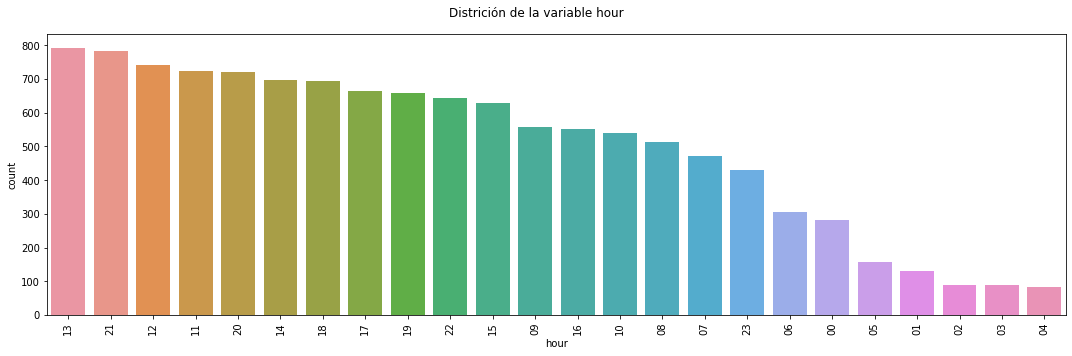

In [323]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df1_, x='hour', ax=axes, order = df1_['hour'].value_counts().index)
plt.xlabel('hour')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable hour")
plt.tight_layout()
plt.show() 

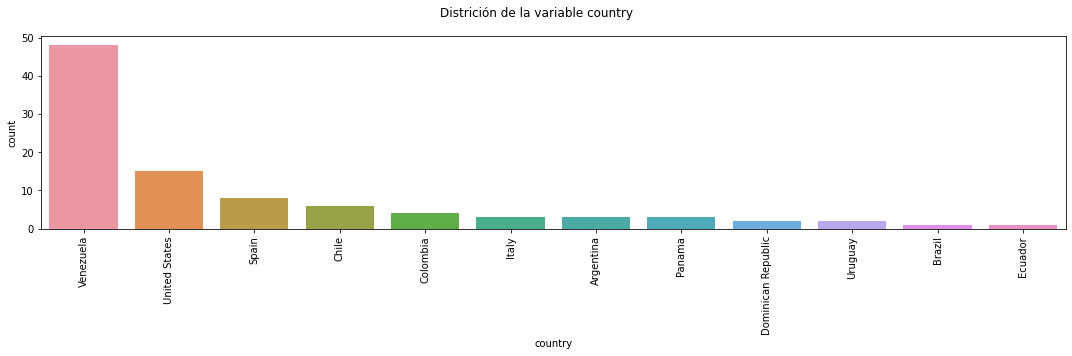

In [324]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df1_, x='country', ax=axes, order = df1_['country'].value_counts().index)
plt.xlabel('country')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable country")
plt.tight_layout()
plt.show() 

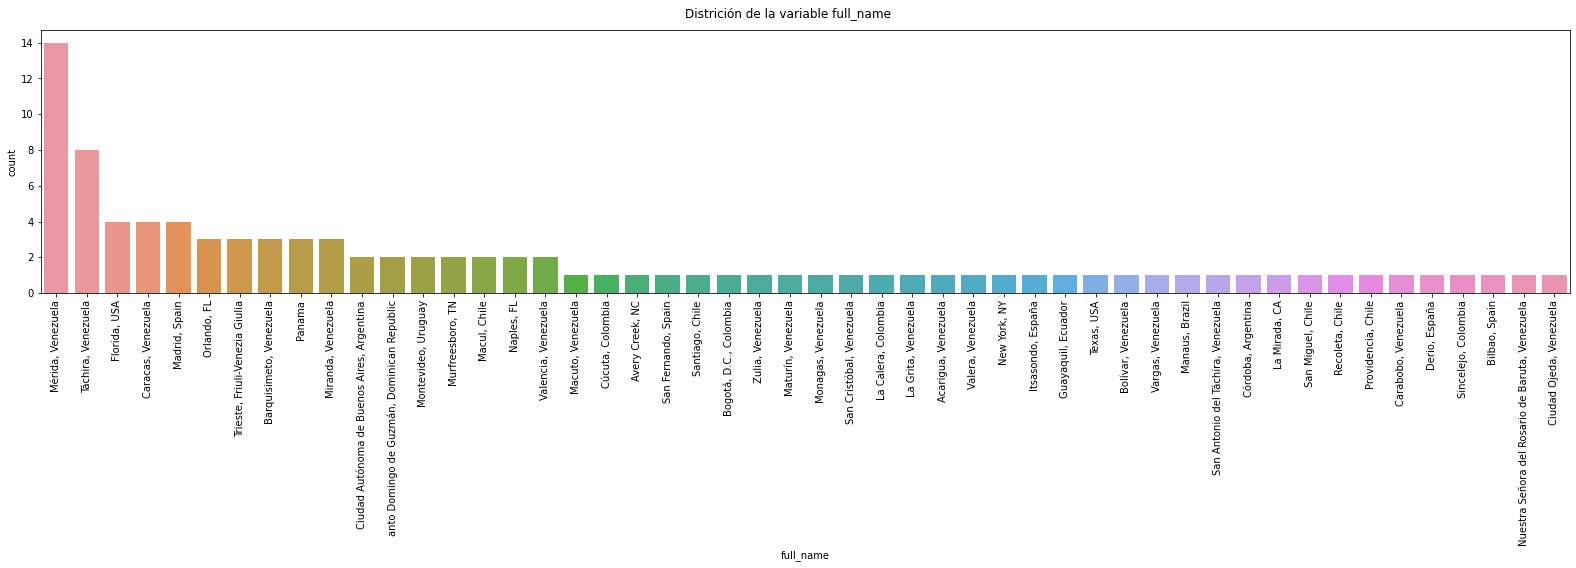

In [325]:
fig, axes = plt.subplots(figsize=(22,8))
sns.countplot(data=df1_, x='full_name', ax=axes, order = df1_['full_name'].value_counts().index)
plt.xlabel('full_name')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable full_name")
plt.tight_layout()
plt.show() 

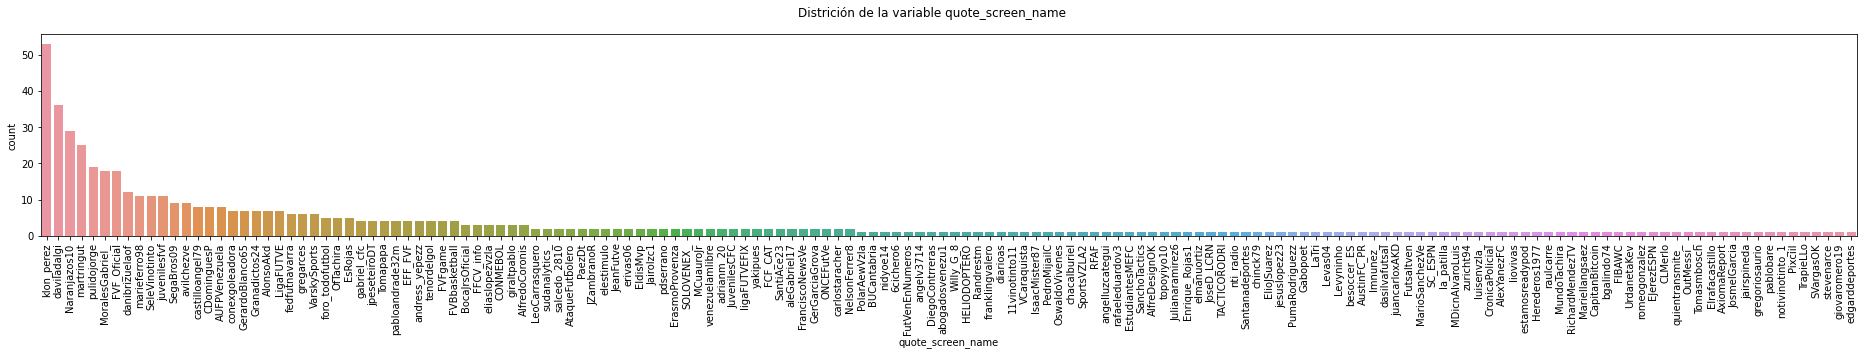

In [326]:
fig, axes = plt.subplots(figsize=(26,5))
sns.countplot(data=df1_, x='quote_screen_name', ax=axes, order = df1_['quote_screen_name'].value_counts().index)
plt.xlabel('quote_screen_name')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable quote_screen_name")
plt.tight_layout()
plt.show() 

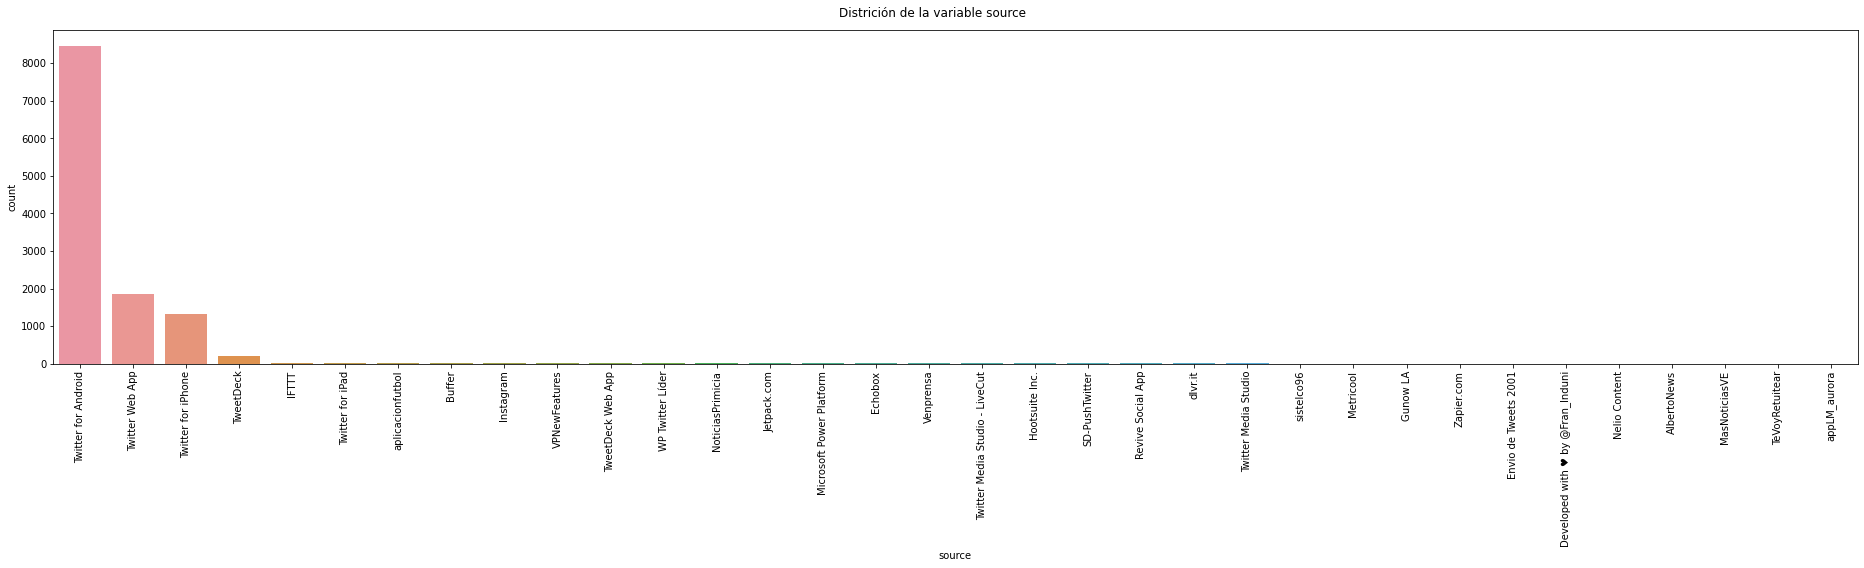

In [327]:
fig, axes = plt.subplots(figsize=(26,8))
sns.countplot(data=df1_, x='source', ax=axes, order = df1_['source'].value_counts().index)
plt.xlabel('source')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable source")
plt.tight_layout()
plt.show() 

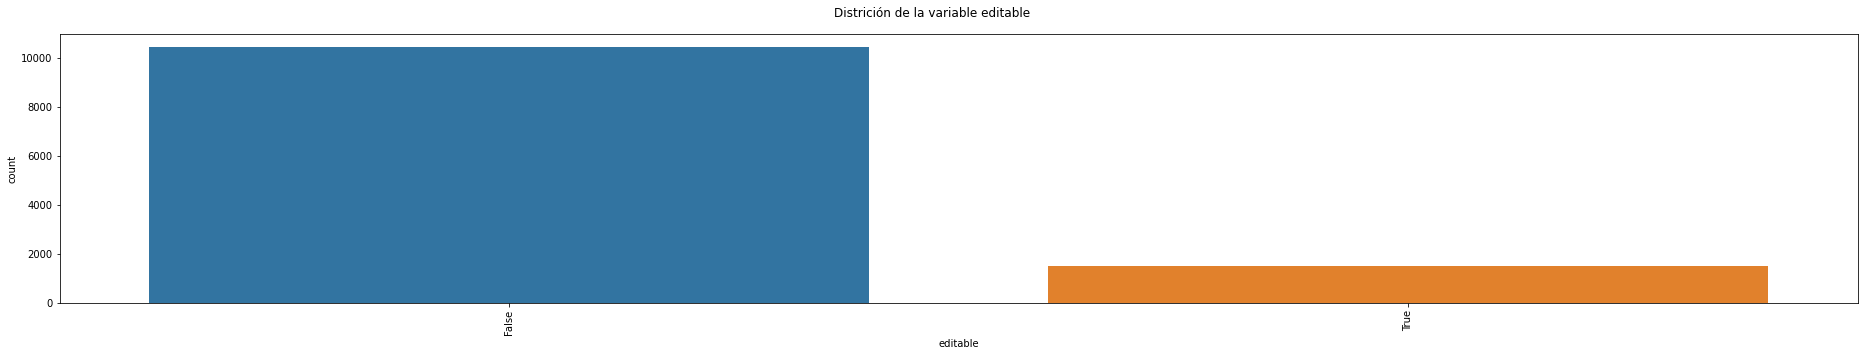

In [328]:
fig, axes = plt.subplots(figsize=(26,5))
sns.countplot(data=df1_, x='editable', ax=axes, order = df1_['editable'].value_counts().index)
plt.xlabel('editable')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable editable")
plt.tight_layout()
plt.show() 

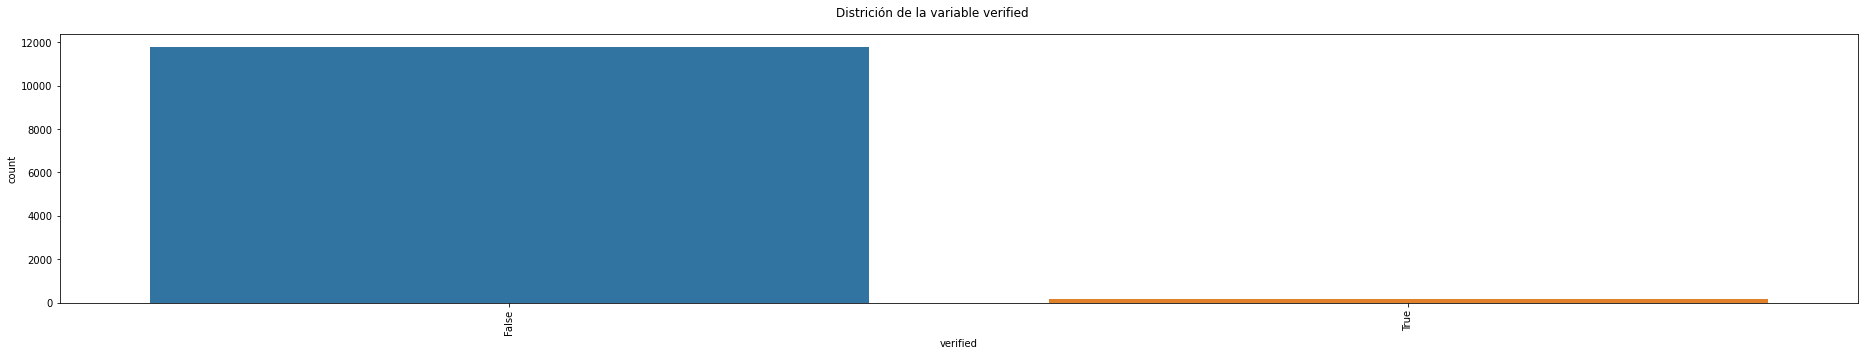

In [329]:
fig, axes = plt.subplots(figsize=(26,5))
sns.countplot(data=df1_, x='verified', ax=axes, order = df1_['verified'].value_counts().index)
plt.xlabel('verified')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable verified")
plt.tight_layout()
plt.show() 

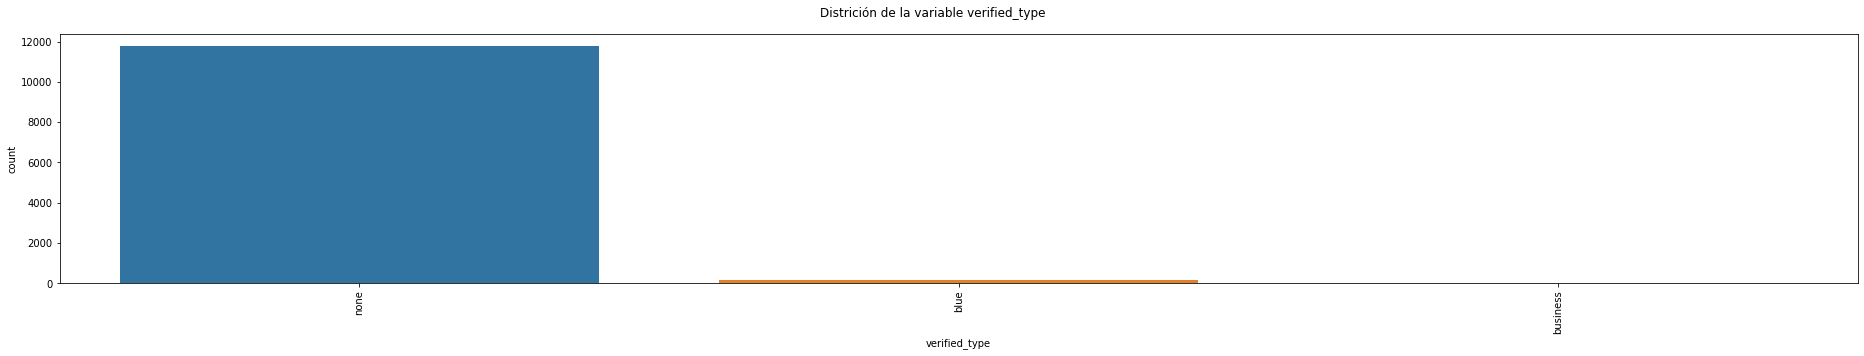

In [330]:
fig, axes = plt.subplots(figsize=(26,5))
sns.countplot(data=df1_, x='verified_type', ax=axes, order = df1_['verified_type'].value_counts().index)
plt.xlabel('verified_type')
plt.xticks(rotation=90)
plt.suptitle("Districión de la variable verified_type")
plt.tight_layout()
plt.show() 

In [331]:
print(sorted(df1_.columns))

['Fecha_completa', '_id', 'category', 'comments_count', 'contributors', 'contributors_enabled', 'coordinates', 'country', 'country_code', 'created_at', 'created_atuser', 'date', 'default_profile', 'default_profile_image', 'description', 'editable', 'entities', 'favorited', 'favourites_count', 'filter_level', 'follow_request_sent', 'followers', 'followers_count', 'following', 'followings', 'frecuencia_fuente', 'full_name', 'geo', 'geo_enabled', 'hour', 'id_place', 'id_post', 'id_str', 'id_str_user', 'id_user', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'is_translator', 'lang', 'lang_user', 'likes_count', 'link', 'link_comments', 'link_fuente', 'link_retweet', 'link_user', 'link_user_in_reply_to_screen_name', 'link_usuario_retweeted', 'listed_count', 'location', 'message', 'name', 'name_place', 'notifications', 'place', 'place_type', 'possibly_sensitive', 'profile_background_color',

### Variables Numericas

In [332]:
df1_[['favourites_count', 'followers', 'followings', 'likes_count', 'listed_count', 'quote_count', 'comments_count', 'reactions_count', 'retweet_count', 'statuses_count']]

,favourites_count,followers,followings,likes_count,listed_count,quote_count,comments_count,reactions_count,retweet_count,statuses_count
0,494,17771.0,4132,36,214,4,8,60,12,16772
1,8738,1430.0,1773,0,10,0,0,0,0,140642
2,1067,423.0,47,1,0,0,0,1,0,579
3,8266,336.0,2513,0,2,0,0,0,0,16260
4,809,867.0,765,0,38,0,0,0,0,94155
...,...,...,...,...,...,...,...,...,...,...
11943,43,NaN,50,0,0,0,0,0,0,267
11944,604,NaN,388,0,2,0,0,0,0,3873
11945,4202,NaN,798,0,5,0,0,0,0,35662
11946,258,NaN,678,0,5,0,0,0,0,26010


In [333]:
df1_[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'reactions_count', 'statuses_count']].select_dtypes(include=np.number).describe()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count
count,7.848000e+03,11948.000000,11948.000000,1.194800e+04,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,1.194800e+04
mean,1.928302e+04,1306.533981,65.744978,2.247837e+04,2.003683,0.665216,0.062688,0.283060,3.014647,6.467848e+04
std,1.936029e+05,3617.382191,572.749007,5.077176e+04,21.147946,12.065240,0.977012,4.116235,33.745998,1.980718e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,7.900000e+01,194.000000,0.000000,5.747500e+02,0.000000,0.000000,0.000000,0.000000,0.000000,5.214750e+03
50%,3.130000e+02,602.000000,1.000000,4.920000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.981300e+04
75%,1.196250e+03,1520.000000,8.000000,2.254300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,5.253125e+04
max,5.548273e+06,208248.000000,19299.000000,1.087051e+06,1133.000000,636.000000,65.000000,316.000000,1951.000000,3.089672e+06


In [334]:
def box_plot(cols, df):
    fig, axes = plt.subplots(5,2, figsize=(22,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Box plots of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

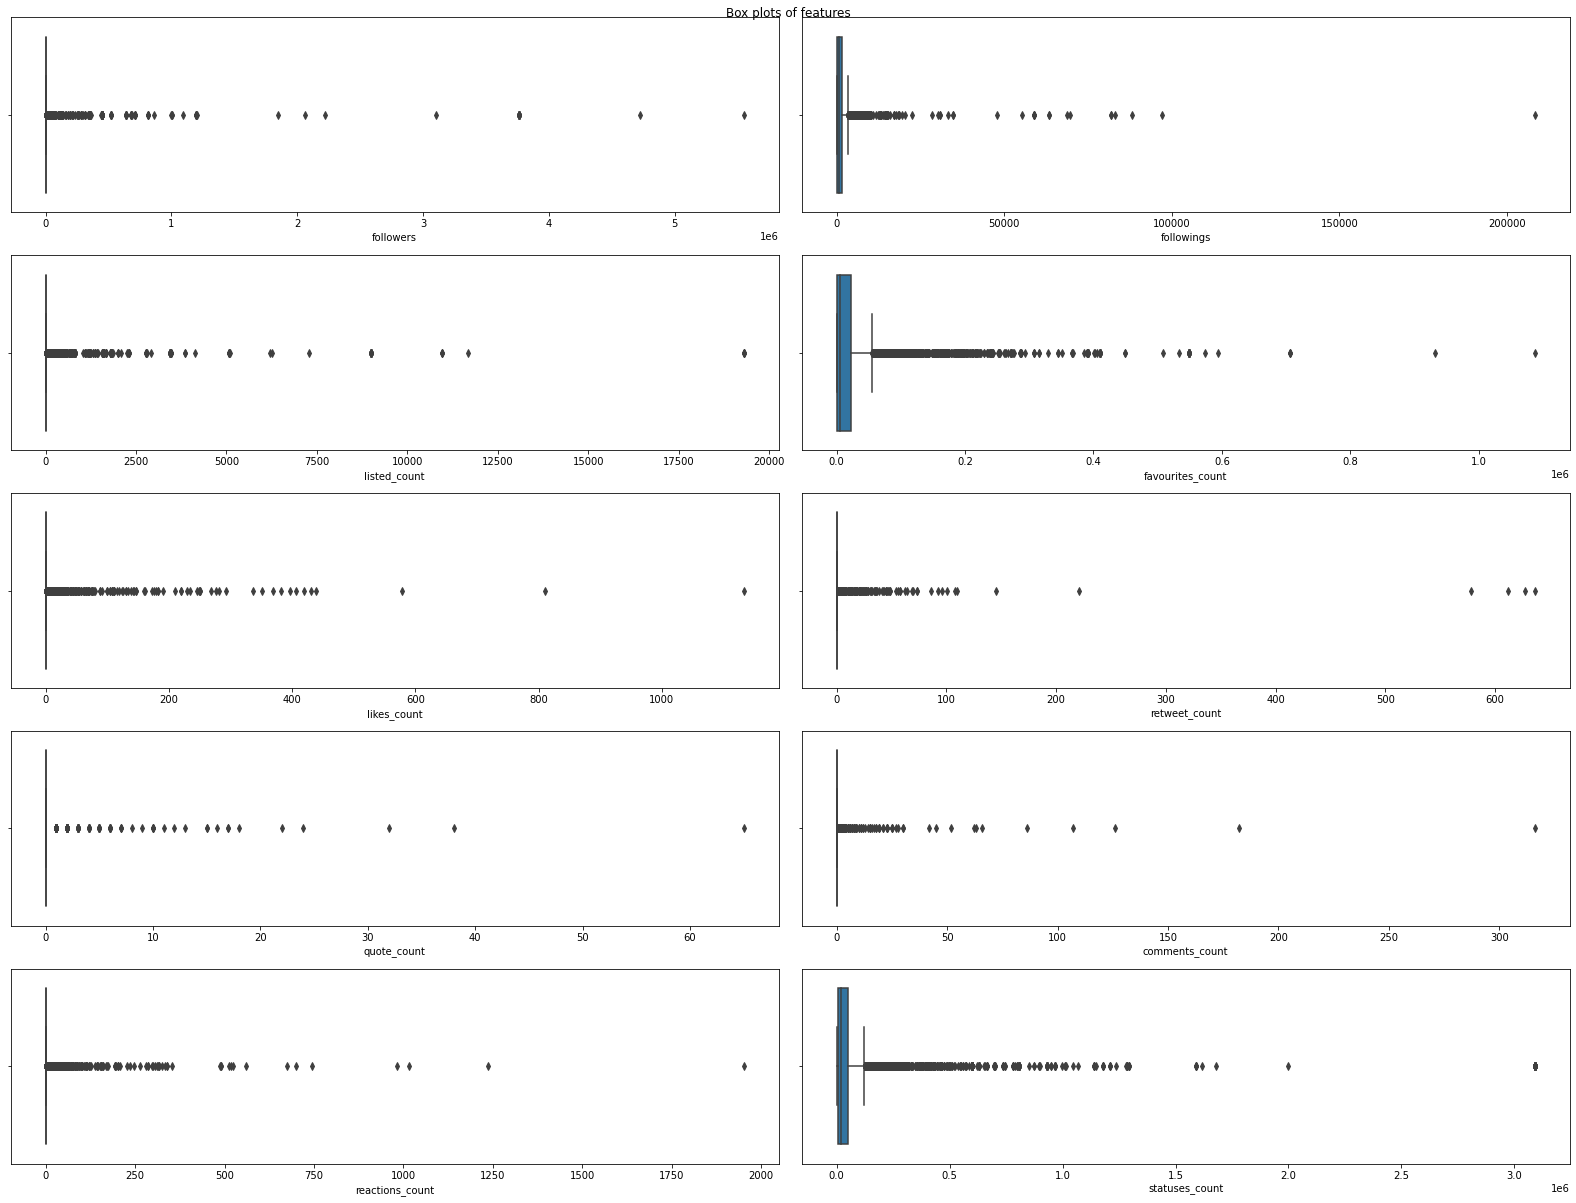

In [335]:
box_plot(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'], df1_)  

#### Nota 
- 

#### Gráficos de distribución

In [336]:
# Check the distribution of numerical features in the original dataset
def distributions(cols, df):
    fig, axes = plt.subplots(3,3, figsize=(22,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

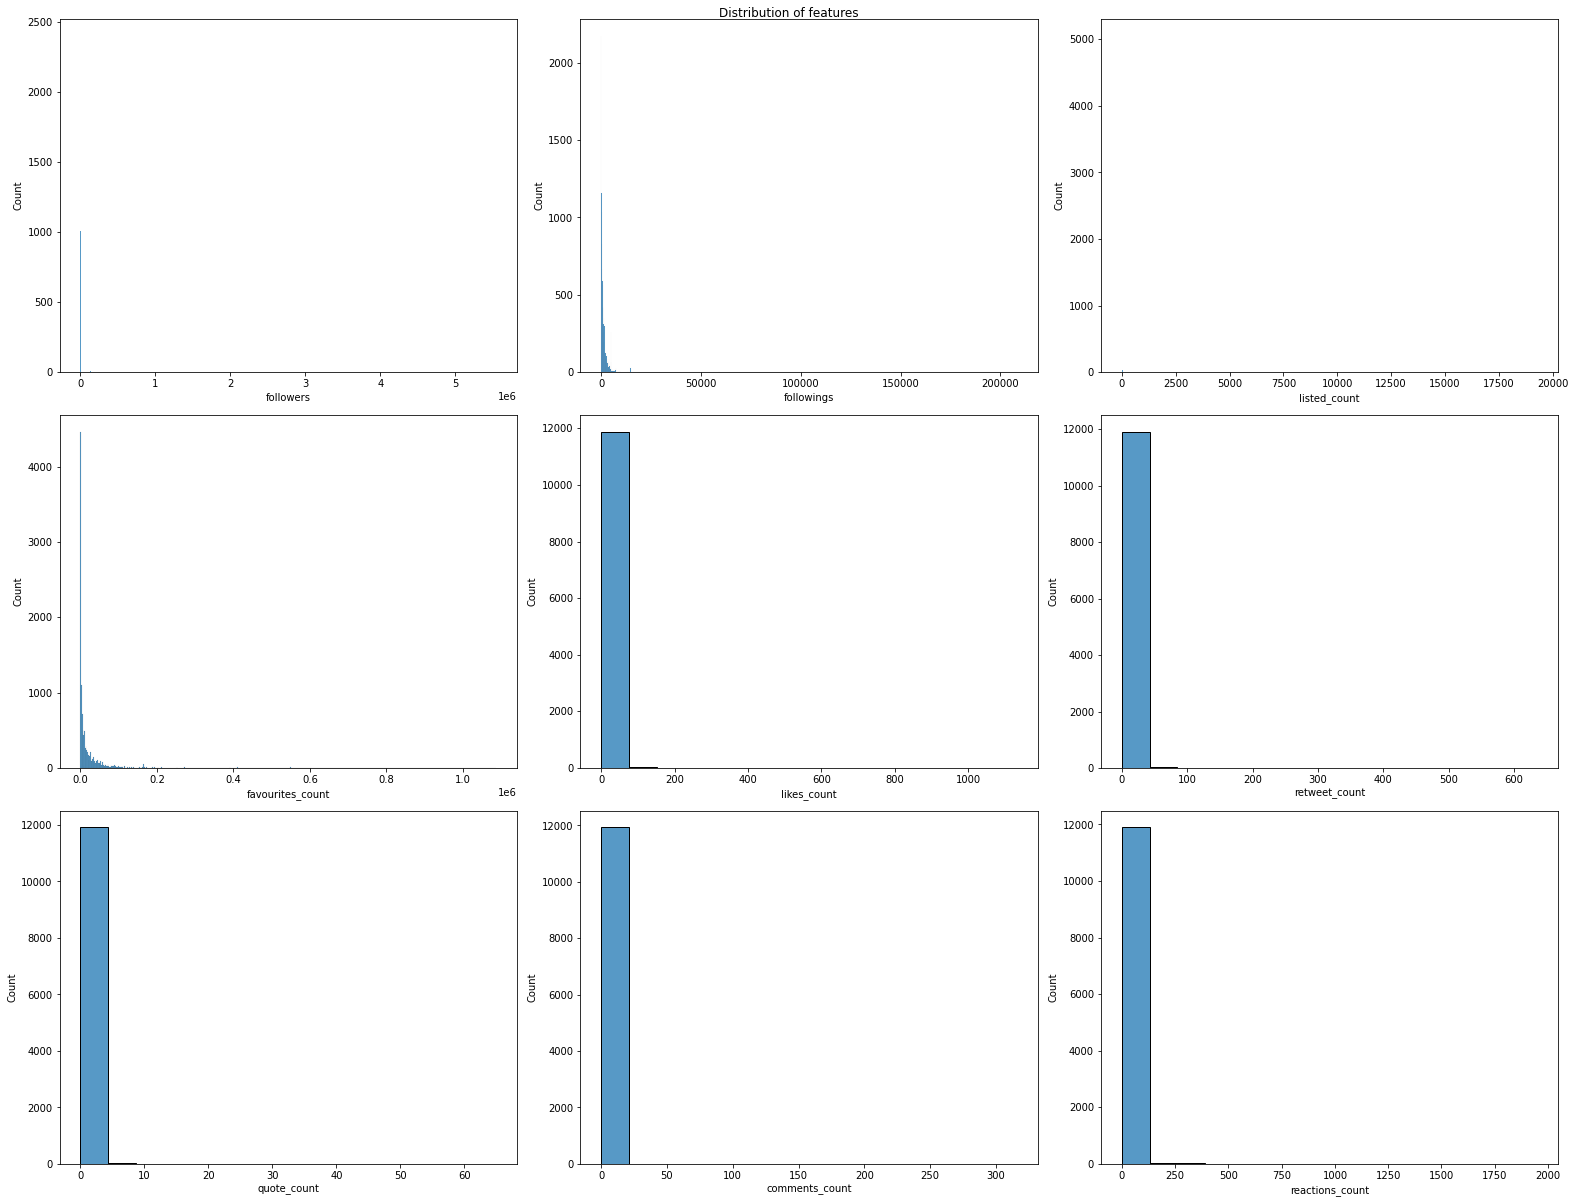

In [337]:
distributions(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'], df1_)    

##### Nota 
- L
- L

### Multi-collinearity

In [338]:
# Columnas numericas
#  retiramos reactions_count ya que es la suma de df['reactions_count'] = df['likes_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
cols_num = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'statuses_count']

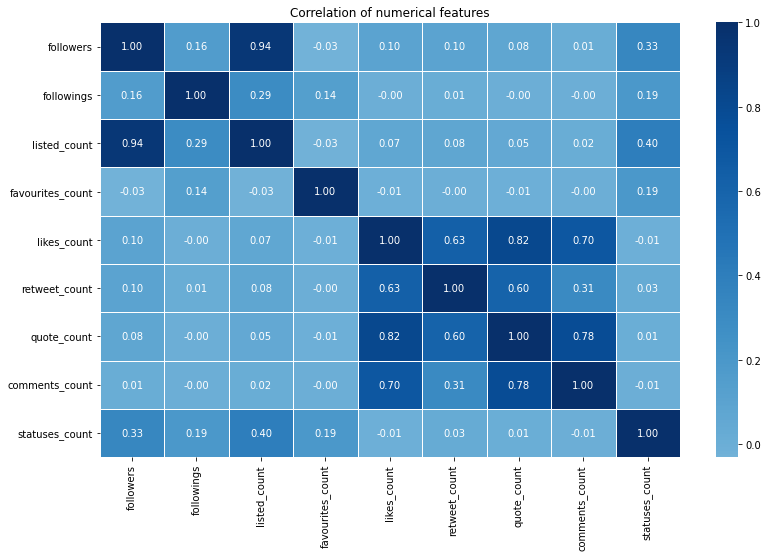

In [339]:
# Correlation of numerical features
plt.figure(figsize=(13,8))
plt.title('Correlation of numerical features')
sns.heatmap(df1_[cols_num].corr(), annot=True, fmt='.2f', cmap='Blues',  center=0, linewidths=1)
plt.show()

#### Nota 
- 

# 3. Limpieza de Datos

In [340]:
cols_nan = list()
for i, value in enumerate(df1_.isna().sum()):
    if value != 0:
        cols_nan.append(df1_.isna().sum().index[i])
        print('{} tiene {} valores faltantes y representa el {:.2f}%'.format(df1_.isna().sum().index[i], value, (value/df1_.shape[0])*100))

in_reply_to_status_id tiene 9550 valores faltantes y representa el 79.93%
in_reply_to_status_id_str tiene 9550 valores faltantes y representa el 79.93%
in_reply_to_user_id tiene 9465 valores faltantes y representa el 79.22%
in_reply_to_user_id_str tiene 9465 valores faltantes y representa el 79.22%
in_reply_to_screen_name tiene 9467 valores faltantes y representa el 79.24%
geo tiene 11948 valores faltantes y representa el 100.00%
contributors tiene 11948 valores faltantes y representa el 100.00%
possibly_sensitive tiene 9899 valores faltantes y representa el 82.85%
quoted_status_id tiene 11397 valores faltantes y representa el 95.39%
quoted_status_id_str tiene 11397 valores faltantes y representa el 95.39%
location tiene 4590 valores faltantes y representa el 38.42%
url_user tiene 9684 valores faltantes y representa el 81.05%
description tiene 2955 valores faltantes y representa el 24.73%
followers tiene 4100 valores faltantes y representa el 34.32%
utc_offset tiene 11948 valores falta

In [341]:
cols_nan_30 = [var for var in df1_.isnull().sum().index if df1_.isnull().sum()[var]/df1_.shape[0] > 0.3]
print('Lista de variables con mas de 30% de valores faltantes: \n',cols_nan_30)

Lista de variables con mas de 30% de valores faltantes: 
 ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'contributors', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'location', 'url_user', 'followers', 'utc_offset', 'time_zone', 'lang_user', 'profile_banner_url', 'following', 'follow_request_sent', 'notifications', 'retweet_userid_str', 'retweet_status_id_str', 'retweet_screen_name', 'quote_userid_str', 'quote_status_id_str', 'quote_screen_name', 'word', 'category', 'id_place', 'url_place', 'place_type', 'name_place', 'full_name', 'country_code', 'country', 'followers_count']


#### Nota
- Deberan eliminarse las variables con el 30% o mas de valores faltantes debido a la magnitud, los que poseean menos deberan ser imputados. Excepto las columnas 'in_reply_to_screen_name', 'quote_screen_name', 'retweet_screen_name', 'followers', 'followings', que son parte importnate en la construccion del grafo

## Ingenieria de los datos

In [342]:
df1_2 = df1_

### Imputacion de valores faltantes

In [343]:
# funcion para imputar los valores faltantes con 0's de las columnas de interes que se detallan a continuacion
def progephi(data_df):
    
    data_df['id_post'] = data_df['id_post'].fillna(0)
    data_df['retweet_screen_name'] = data_df['retweet_screen_name'].fillna(0)
    data_df['in_reply_to_screen_name'] = data_df['in_reply_to_screen_name'].fillna(0)
    data_df['quote_screen_name'] = data_df['quote_screen_name'].fillna(0)
#     data_df['reactions_screen_name'] = data_df['reactions_screen_name'].fillna(0)
    
    # Para df's grandes, los cuales pasan a ser grandes grafos.
    # Para limpiar el grafo, eliminalos los usuarios que unicamente tienen una unica publicacion dentro del estudio
#     data_df['count_user'] = data_df.groupby('id_post')['id_post'].transform('count')
#     data_df_filtro = data_df[data_df['count_user']>1]
#     data_df_filtro.text = data_df_filtro.apply(lambda x: x['message'].replace('\n', ''),axis=1)

    return(data_df)

In [344]:
dpg = progephi(df1_2)
dpg.shape

(11948, 99)

In [345]:
# Repetimos el proceso 
cols_nan = list()
for i, value in enumerate(dpg.isna().sum()):
    if value != 0:
        cols_nan.append(dpg.isna().sum().index[i])
        print('{} tiene {} valores faltantes y representa el {:.2f}%'.format(dpg.isna().sum().index[i], value, (value/dpg.shape[0])*100))

in_reply_to_status_id tiene 9550 valores faltantes y representa el 79.93%
in_reply_to_status_id_str tiene 9550 valores faltantes y representa el 79.93%
in_reply_to_user_id tiene 9465 valores faltantes y representa el 79.22%
in_reply_to_user_id_str tiene 9465 valores faltantes y representa el 79.22%
geo tiene 11948 valores faltantes y representa el 100.00%
contributors tiene 11948 valores faltantes y representa el 100.00%
possibly_sensitive tiene 9899 valores faltantes y representa el 82.85%
quoted_status_id tiene 11397 valores faltantes y representa el 95.39%
quoted_status_id_str tiene 11397 valores faltantes y representa el 95.39%
location tiene 4590 valores faltantes y representa el 38.42%
url_user tiene 9684 valores faltantes y representa el 81.05%
description tiene 2955 valores faltantes y representa el 24.73%
followers tiene 4100 valores faltantes y representa el 34.32%
utc_offset tiene 11948 valores faltantes y representa el 100.00%
time_zone tiene 11948 valores faltantes y repre

In [346]:
cols_nan_30 = [var for var in dpg.isnull().sum().index if dpg.isnull().sum()[var]/dpg.shape[0] > 0.3]
print('Lista de variables con mas de 30% de valores faltantes: \n',cols_nan_30)

Lista de variables con mas de 30% de valores faltantes: 
 ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo', 'contributors', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'location', 'url_user', 'followers', 'utc_offset', 'time_zone', 'lang_user', 'profile_banner_url', 'following', 'follow_request_sent', 'notifications', 'retweet_userid_str', 'retweet_status_id_str', 'quote_userid_str', 'quote_status_id_str', 'word', 'category', 'id_place', 'url_place', 'place_type', 'name_place', 'full_name', 'country_code', 'country', 'followers_count']


In [348]:
# Seleccion de las variables a eliminar
cols_nan_30_ = ['in_reply_to_status_id_str', 'in_reply_to_user_id_str',  'contributors', 'possibly_sensitive', 'quoted_status_id_str', 'url_user', 'utc_offset', 'time_zone', 'lang_user', 'profile_banner_url', 'follow_request_sent', 'notifications', 'retweet_userid_str', 'retweet_status_id_str', 'quote_userid_str', 'quote_status_id_str', 'id_place', 'url_place', 'place_type', 'name_place', 'full_name', 'followers_count']

### Eliminacion de variables con mas de 30% de valores faltantes.

In [383]:
# Eliminamos las columnas cuyas columnas tienen >30% de valores missing o nulos
# dpg.drop(cols_nan_30, axis=1, inplace = True)
dpg1 = dpg.drop(cols_nan_30_, axis=1)
dpg1.shape

(11948, 77)

In [384]:
dpg1.shape

(11948, 77)

In [385]:
# 'followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'statuses_count'

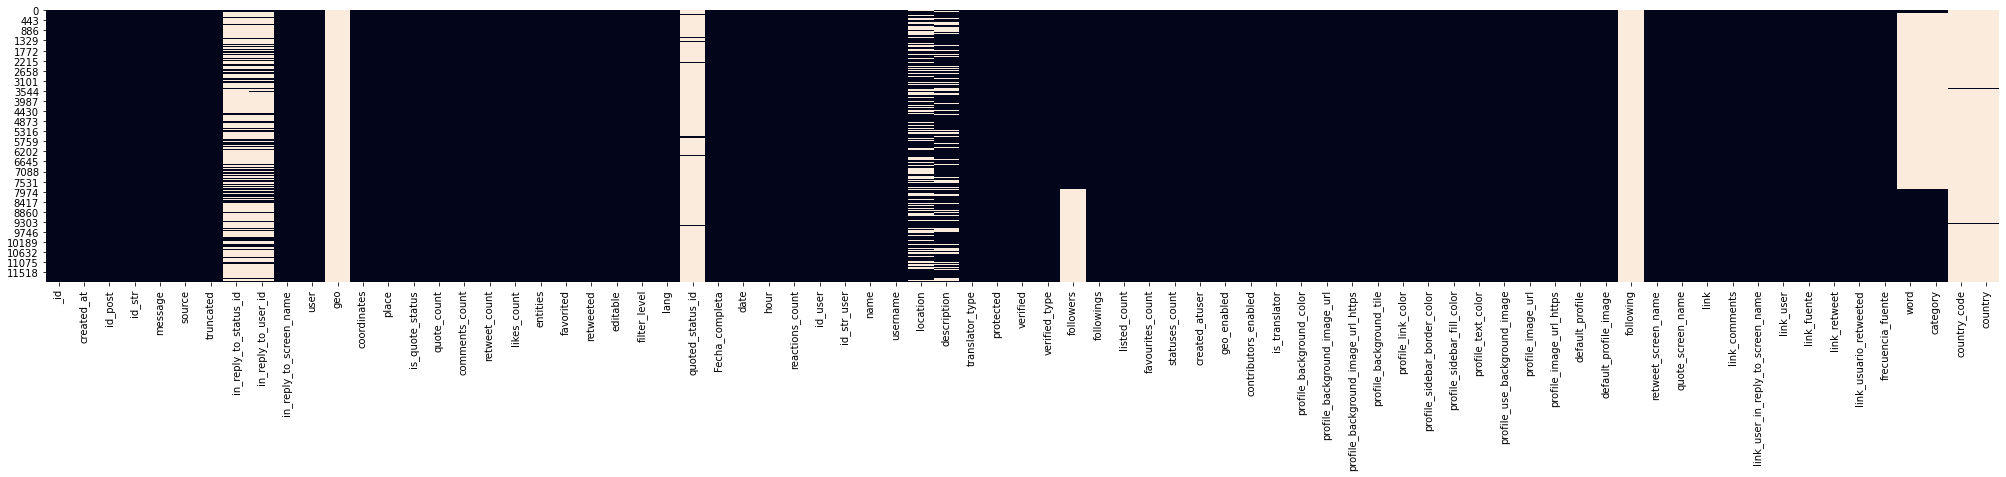

In [386]:
# Graficamos nuevamente las columnas con valores faltantes
plt.figure(figsize=(35,5))
sns.heatmap(dpg1.isnull(), cbar=False)
plt.show()

### Insercion datos limpios / procesados en MongoDB

In [387]:
# Definicion de parametros de carga
collection_name = 't_fvf_progephi1'
insert_mongo (client, database, collection_name, dpg1)

Los datos NO fueron insertados en la coleccion t_fvf_progephi1, de la base de datos GNN.


In [9]:
os.getcwd()

'/home/gabrielarcangelbol/notebooks/tfm'

In [10]:
directorio = os.getcwd()

In [389]:
print(sorted(dpg1.columns))

['Fecha_completa', '_id', 'category', 'comments_count', 'contributors_enabled', 'coordinates', 'country', 'country_code', 'created_at', 'created_atuser', 'date', 'default_profile', 'default_profile_image', 'description', 'editable', 'entities', 'favorited', 'favourites_count', 'filter_level', 'followers', 'following', 'followings', 'frecuencia_fuente', 'geo', 'geo_enabled', 'hour', 'id_post', 'id_str', 'id_str_user', 'id_user', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'is_quote_status', 'is_translator', 'lang', 'likes_count', 'link', 'link_comments', 'link_fuente', 'link_retweet', 'link_user', 'link_user_in_reply_to_screen_name', 'link_usuario_retweeted', 'listed_count', 'location', 'message', 'name', 'place', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fi

In [390]:
dpg1[['username', 'followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'statuses_count', 'retweet_screen_name', 'in_reply_to_screen_name', 'quote_screen_name']]

,username,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,statuses_count,retweet_screen_name,in_reply_to_screen_name,quote_screen_name
0,foro_todofutbol,17771.0,4132,214,494,36,12,4,8,16772,0,0,0
1,miguel28gangel,1430.0,1773,10,8738,0,0,0,0,140642,klon_perez,0,0
2,FutbolAnz,423.0,47,0,1067,1,0,0,0,579,0,FutbolAnz,0
3,edgardo0512,336.0,2513,2,8266,0,0,0,0,16260,CaracasFC1967,0,0
4,666rjrv,867.0,765,38,809,0,0,0,0,94155,luistorres167,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,xavierdorta,NaN,50,0,43,0,0,0,0,267,0,0,0
11944,johnny_ledezma,NaN,388,2,604,0,0,0,0,3873,Karlapgil,0,0
11945,Gustavo_BHR,NaN,798,5,4202,0,0,0,0,35662,Karlapgil,0,0
11946,Lord11_BHR,NaN,678,5,258,0,0,0,0,26010,0,jorgearmandogs,0


In [391]:
dpg1[['username', 'followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'statuses_count', 'retweet_screen_name', 'in_reply_to_screen_name', 'quote_screen_name']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11948 entries, 0 to 11947
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   username                 11948 non-null  object 
 1   followers                7848 non-null   float64
 2   followings               11948 non-null  int64  
 3   listed_count             11948 non-null  int64  
 4   favourites_count         11948 non-null  int64  
 5   likes_count              11948 non-null  int64  
 6   retweet_count            11948 non-null  int64  
 7   quote_count              11948 non-null  int64  
 8   comments_count           11948 non-null  int64  
 9   statuses_count           11948 non-null  int64  
 10  retweet_screen_name      11948 non-null  object 
 11  in_reply_to_screen_name  11948 non-null  object 
 12  quote_screen_name        11948 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 1.3+ MB


In [392]:
dpg1.shape

(11948, 77)

### Eliminacion de filas en las que el mensaje esta en otro idioma
#### Nota: No hay realmente mensajes en otro idioma.

In [393]:
dpg1[['lang']].value_counts()

lang
es      11864
ca         69
eu          7
it          4
in          3
fr          1
dtype: int64

In [394]:
dpg1[dpg1['lang'] != 'es'][['message']]

,message
2636,@carlostaracher @FVF_Oficial @SouthamptonFC @SOLOVENEX_ Posible mundial sub17 serí convocado
2710,@carlostaracher @FVF_Oficial Rico?
3364,La Community de la FVF leyendo mi twt https://t.co/rejAPBSG2O https://t.co/Xjfvj6SXvj
3670,@11vinotinto11 @juvenilesfvf @FVF_Oficial Non me permite abrirlo el Link...\nIndica video privado 😟
4043,@juvenilesfvf @FVF_Oficial @TournoiMRevello La revancha
...,...
11674,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11705,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11707,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11714,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb


In [395]:
dpg1[dpg1['lang'] == 'ca'][['message']]

,message
2636,@carlostaracher @FVF_Oficial @SouthamptonFC @SOLOVENEX_ Posible mundial sub17 serí convocado
4923,rt Designaciones arbitrales para la Jornada 8️⃣ de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/7JjVyWXIw1
4966,rt Designaciones arbitrales para la Jornada 8️⃣ de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/7JjVyWXIw1
5012,rt Designaciones arbitrales para la Jornada 8️⃣ de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/7JjVyWXIw1
5018,rt Designaciones arbitrales para la Jornada 8️⃣ de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/7JjVyWXIw1
...,...
11674,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11705,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11707,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb
11714,rt Designaciones arbitrales para la Jornada 1 de la @LigaFUTVE 📄\n\n#Arbitraje 🇻🇪 https://t.co/bZodHCp7Yb


In [396]:
dpg1[dpg1['lang'] == 'eu'][['message']]

,message
4342,rt 🚨𝐄𝐬𝐩𝐚𝐢𝐧𝐢𝐚𝐤𝐨 𝐒𝐞𝐥𝐞𝐤𝐳𝐢𝐨 𝐀𝐮𝐭𝐨𝐧𝐨𝐦𝐢𝐤𝐨𝐞𝐧 𝐓𝐱𝐚𝐩𝐞𝐥𝐤𝐞𝐭𝐚🚨\n\n😉¡Nos vemos pronto amigos!\n\n🏆𝐒𝐮𝐛-𝟏𝟐 (@rfef)\n🗓️ Apirilak 29-1 Abril\n🏟️Madrid\n🆚 @FFIB_oficial - @FFCM_es - @asturfutbol - @fedfutnavarra \n\n#BatzenGaituelako https://t.co/MrpNIqqiSv
5051,rt 🚨𝐄𝐬𝐩𝐚𝐢𝐧𝐢𝐚𝐤𝐨 𝐒𝐞𝐥𝐞𝐤𝐳𝐢𝐨 𝐀𝐮𝐭𝐨𝐧𝐨𝐦𝐢𝐤𝐨𝐞𝐧 𝐓𝐱𝐚𝐩𝐞𝐥𝐤𝐞𝐭𝐚🚨\n\n😉¡Nos vemos pronto amigos!\n\n🏆𝐒𝐮𝐛-𝟏𝟐 (@rfef)\n🗓️ Apirilak 29-1 Abril\n🏟️Madrid\n🆚 @FFIB_oficial - @FFCM_es - @asturfutbol - @fedfutnavarra \n\n#BatzenGaituelako https://t.co/MrpNIqqiSv
5246,rt 🚨𝐄𝐬𝐩𝐚𝐢𝐧𝐢𝐚𝐤𝐨 𝐒𝐞𝐥𝐞𝐤𝐳𝐢𝐨 𝐀𝐮𝐭𝐨𝐧𝐨𝐦𝐢𝐤𝐨𝐞𝐧 𝐓𝐱𝐚𝐩𝐞𝐥𝐤𝐞𝐭𝐚🚨\n\n😉¡Nos vemos pronto amigos!\n\n🏆𝐒𝐮𝐛-𝟏𝟐 (@rfef)\n🗓️ Apirilak 29-1 Abril\n🏟️Madrid\n🆚 @FFIB_oficial - @FFCM_es - @asturfutbol - @fedfutnavarra \n\n#BatzenGaituelako https://t.co/MrpNIqqiSv
11354,rt 📰𝗛𝗔𝗠𝗔𝗜𝗞𝗔 𝗔𝗟𝗗𝗜𝗭𝗞𝗔𝗥𝗜𝗔 - 𝗥𝗘𝗩𝗜𝗦𝗧𝗔 𝗛𝗔𝗠𝗔𝗜𝗞𝗔📰\n\n✍️18. Zenbakia: 𝐉𝐀𝐑𝐑𝐀𝐈𝐓𝐔 𝐁𝐄𝐇𝐀𝐑𝐑𝐄𝐊𝐎 𝐁𝐈𝐃𝐄𝐀\n👀https://t.co/Z3jYPXqkcG\n\n✍️Número 18: 𝐂𝐀𝐌𝐈𝐍𝐎 𝐀 𝐒𝐄𝐆𝐔𝐈𝐑\n👀https://t.co/lecnKWZedz https://t.co/6vzA6rmdgO
11412,rt 📰𝗛𝗔𝗠𝗔𝗜𝗞𝗔 𝗔𝗟𝗗𝗜𝗭𝗞𝗔𝗥𝗜𝗔 - 𝗥𝗘𝗩𝗜𝗦𝗧𝗔 𝗛𝗔𝗠𝗔𝗜𝗞𝗔📰\n\n✍️18. Zenbakia: 𝐉𝐀𝐑𝐑𝐀𝐈𝐓𝐔 𝐁𝐄𝐇𝐀𝐑𝐑𝐄𝐊𝐎 𝐁𝐈𝐃𝐄𝐀\n👀https://t.co/Z3jYPXqkcG\n\n✍️Número 18: 𝐂𝐀𝐌𝐈𝐍𝐎 𝐀 𝐒𝐄𝐆𝐔𝐈𝐑\n👀https://t.co/lecnKWZedz https://t.co/6vzA6rmdgO
11421,rt 📰𝗛𝗔𝗠𝗔𝗜𝗞𝗔 𝗔𝗟𝗗𝗜𝗭𝗞𝗔𝗥𝗜𝗔 - 𝗥𝗘𝗩𝗜𝗦𝗧𝗔 𝗛𝗔𝗠𝗔𝗜𝗞𝗔📰\n\n✍️18. Zenbakia: 𝐉𝐀𝐑𝐑𝐀𝐈𝐓𝐔 𝐁𝐄𝐇𝐀𝐑𝐑𝐄𝐊𝐎 𝐁𝐈𝐃𝐄𝐀\n👀https://t.co/Z3jYPXqkcG\n\n✍️Número 18: 𝐂𝐀𝐌𝐈𝐍𝐎 𝐀 𝐒𝐄𝐆𝐔𝐈𝐑\n👀https://t.co/lecnKWZedz https://t.co/6vzA6rmdgO
11422,rt 📰𝗛𝗔𝗠𝗔𝗜𝗞𝗔 𝗔𝗟𝗗𝗜𝗭𝗞𝗔𝗥𝗜𝗔 - 𝗥𝗘𝗩𝗜𝗦𝗧𝗔 𝗛𝗔𝗠𝗔𝗜𝗞𝗔📰\n\n✍️18. Zenbakia: 𝐉𝐀𝐑𝐑𝐀𝐈𝐓𝐔 𝐁𝐄𝐇𝐀𝐑𝐑𝐄𝐊𝐎 𝐁𝐈𝐃𝐄𝐀\n👀https://t.co/Z3jYPXqkcG\n\n✍️Número 18: 𝐂𝐀𝐌𝐈𝐍𝐎 𝐀 𝐒𝐄𝐆𝐔𝐈𝐑\n👀https://t.co/lecnKWZedz https://t.co/6vzA6rmdgO


In [397]:
dpg1[dpg1['lang'] == 'it'][['message']]

,message
2710,@carlostaracher @FVF_Oficial Rico?
3364,La Community de la FVF leyendo mi twt https://t.co/rejAPBSG2O https://t.co/Xjfvj6SXvj
3670,@11vinotinto11 @juvenilesfvf @FVF_Oficial Non me permite abrirlo el Link...\nIndica video privado 😟
10954,@DiazSport2 @DvoRayoZuliano @FVF_Oficial @la_academiapc Jajajajjajajajajjsjsjsjjsjsja


In [398]:
dpg1[dpg1['lang'] == 'in'][['message']]

,message
8095,@irma_fvf 10/10 mi apa
8347,rt Aprendan @FVF_Oficial @jandresgimenez @JAntonioQ_ https://t.co/k1TQ1zi3j4
8357,Aprendan @FVF_Oficial @jandresgimenez @JAntonioQ_ https://t.co/k1TQ1zi3j4


In [399]:
dpg1[dpg1['lang'] == 'fr'][['message']]

,message
4043,@juvenilesfvf @FVF_Oficial @TournoiMRevello La revancha


In [366]:
# Funcion para generar el grafo.
def exporToGephi(data, collection_name, directorio, database):

    import networkx as nx
    G=nx.DiGraph()
    G.clear()
    G.add_nodes_from(data['username'].tolist())

    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['followers'].tolist())), 'followers' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['followings'].tolist())), 'followings' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['listed_count'].tolist())), 'listed_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['favourites_count'].tolist())), 'favourites_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['likes_count'].tolist())), 'likes_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['retweet_count'].tolist())), 'retweet_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['quote_count'].tolist())), 'quote_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['comments_count'].tolist())), 'comments_count' 
                          )
    nx.set_node_attributes(G, 
                           dict(zip(data['username'].tolist(), data['statuses_count'].tolist())), 'statuses_count' 
                          )
    
    for index, row in data.iterrows():
        node = row['username']
        if pd.notnull(row['retweet_screen_name']) and row['retweet_screen_name']!=0: # si reply, le agregamos un loop
            G.add_edge(node, row['retweet_screen_name'], weight = 0.5)


    for index, row in data.iterrows():
        node = row['username']
        if pd.notnull(row['in_reply_to_screen_name']) and row['in_reply_to_screen_name']!=0: # si reply, le agregamos un loop
#         if row['in_reply_to_screen_name']!=0: # si es RT, le agregamos un loop
            G.add_edge(node, row['in_reply_to_screen_name'], weight = 1.0)

    for index, row in data.iterrows():
        node = row['username']
        if pd.notnull(row['quote_screen_name']) and row['quote_screen_name']!=0: # si reply, le agregamos un loop
                G.add_edge(node, row['quote_screen_name'], weight = 2.0)

    nx.write_gexf(G, directorio+"/b_"+database+"_experimental_2.gexf")
    nx.write_graphml(G, directorio+"/b_"+database+"_experimental_2.graphml")
    print("Se crearon satisfactoriamentos los archivos para usar en Gephi")
    print("Se creo el archivo b_{}.gexf en el directorio {}/".format(database, directorio))
    print("Se creo el archivo b_{}.graphml en el directorio {}/".format(database, directorio))

In [367]:
exporToGephi(dpg1, collection_name, directorio, database)

Se crearon satisfactoriamentos los archivos para usar en Gephi
Se creo el archivo b_GNN.gexf en el directorio /home/gabrielarcangelbol/notebooks/tfm/
Se creo el archivo b_GNN.graphml en el directorio /home/gabrielarcangelbol/notebooks/tfm/


In [400]:
# Check which columns have timezones datetime64[ns, UTC] 
dpg1.dtypes

_id                          object
created_at           datetime64[ns]
id_post                       int64
id_str                       object
message                      object
                          ...      
frecuencia_fuente             int64
word                         object
category                     object
country_code                 object
country                      object
Length: 77, dtype: object

In [401]:
dpg1.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

In [402]:
dpg1.Fecha_completa

0              2023-04-20 23:58:40
1              2023-04-20 23:57:49
2              2023-04-20 23:56:18
3              2023-04-20 23:55:48
4              2023-04-20 23:54:56
                   ...            
11943    2023-01-31 20:25:23-04:00
11944    2023-01-31 20:20:08-04:00
11945    2023-01-31 20:19:41-04:00
11946    2023-01-31 20:16:25-04:00
11947    2023-01-31 20:06:44-04:00
Name: Fecha_completa, Length: 11948, dtype: object

In [403]:
dpg1_2 = dpg1
dpg1_2.shape

(11948, 77)

In [407]:
# Remover timezone de la columna de fechas
dpg1_2['created_at'] = dpg1_2['created_at'].astype(str)
dpg1_2['Fecha_completa'] = dpg1_2['Fecha_completa'].astype(str)
dpg1_2['date'] = dpg1_2['date'].astype(str)

In [408]:
# dpgbb significa data procesada(o) gephi busqueda
# df.to_csv(directorio+'/dpgb'+database+'.csv', index = False, encoding='utf-8')
# exportar dpg a archivo en formato .xlsx (Excel)
dpg1_2.to_excel(directorio+'/dpgb'+database+'.xlsx', encoding='utf8', index = False) 
# # Cuando la data ya ha sido procesada sin el procesamiento para gephi
# dfgephi_filtrado.to_csv(directorio+'/dpgb'+database+'.csv', index = False, encoding='utf-8')
print("Se creo el archivo dpgb{}.xlsx dentro del directorio {}/".format(database, directorio))

Se creo el archivo dpgbGNN.xlsx dentro del directorio /home/gabrielarcangelbol/notebooks/tfm/


# 4. Analisis

In [ ]:
# Definicion de parametros de carga
collection_name = 't_fvf_progephi'
# insert_mongo (client, database, collection_name, df)
insert_mongo(client, database, collection_name, dpg)

In [4]:
# Importar datos limpios almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
dpg = extract_mongo(client, database, 't_fvf_progephi')
dpg.shape

# Importar datos limpios almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
dpg1 = extract_mongo(client, database, 't_fvf_progephi1')
dpg1.shape

Los datos de la coleccion t_fvf_progephi de la base de datos GNN fueron extraidos satisfactoriamente!
Los datos de la coleccion t_fvf_progephi1 de la base de datos GNN fueron extraidos satisfactoriamente!


(11948, 77)

In [6]:
# Exportar a .xlsx el archivo usado en la fase experimental 
# dpgbb significa data procesada(o) gephi busqueda
# df.to_csv(directorio+'/dpgb'+database+'.csv', index = False, encoding='utf-8')
# exportar dpg a archivo en formato .xlsx (Excel)
dpg.to_excel(directorio+'/dpgbv1'+database+'.xlsx', encoding='utf8', index = False) 
# # Cuando la data ya ha sido procesada sin el procesamiento para gephi
# dfgephi_filtrado.to_csv(directorio+'/dpgb'+database+'.csv', index = False, encoding='utf-8')
print("Se creo el archivo dpgbv1{}.xlsx dentro del directorio {}/".format(database, directorio))

In [7]:
dpg1.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

In [8]:
dpg1[['username', 'followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count', 'comments_count', 'statuses_count', 'retweet_screen_name', 'in_reply_to_screen_name', 'quote_screen_name']]

,username,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,statuses_count,retweet_screen_name,in_reply_to_screen_name,quote_screen_name
0,foro_todofutbol,17771.0,4132,214,494,36,12,4,8,16772,0,0,0
1,miguel28gangel,1430.0,1773,10,8738,0,0,0,0,140642,klon_perez,0,0
2,FutbolAnz,423.0,47,0,1067,1,0,0,0,579,0,FutbolAnz,0
3,edgardo0512,336.0,2513,2,8266,0,0,0,0,16260,CaracasFC1967,0,0
4,666rjrv,867.0,765,38,809,0,0,0,0,94155,luistorres167,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,xavierdorta,NaN,50,0,43,0,0,0,0,267,0,0,0
11944,johnny_ledezma,NaN,388,2,604,0,0,0,0,3873,Karlapgil,0,0
11945,Gustavo_BHR,NaN,798,5,4202,0,0,0,0,35662,Karlapgil,0,0
11946,Lord11_BHR,NaN,678,5,258,0,0,0,0,26010,0,jorgearmandogs,0


In [61]:
# Subir el archivo en excel (.xlsx) ya que al exportar de gephi el archivo de nodos 
# la columna seguidores aparece como d0, hay que colocarlo en minuscula al hacer el cambio de nombre de columna
# usuarios = pd.read_excel(directorio+'/nodos'+database+'.xlsx', index_col=None)  
# usuarios = pd.read_excel('/nodos'+database+'.xlsx', index_col=None)  
# usuarios = pd.read_csv('nodos'+database+'.csv')
usuarios = pd.read_csv(directorio+'/nodosExperimental.csv')
# usuarios = pd.read_excel(directorio+'/nodosExperimental.xlsx', index_col=None)
usuarios.shape

(6971, 28)

In [62]:
usuarios.iloc[:, :11]

,Id,Label,d8,d7,d6,d5,d4,d3,d2,d1,d0
0,foro_todofutbol,foro_todofutbol,16743.0,8.0,0.0,1.0,18.0,494.0,214.0,4114.0,17743.0
1,miguel28gangel,miguel28gangel,140642.0,0.0,0.0,0.0,0.0,8738.0,10.0,1773.0,1430.0
2,FutbolAnz,FutbolAnz,579.0,0.0,0.0,0.0,1.0,1067.0,0.0,47.0,423.0
3,edgardo0512,edgardo0512,16260.0,0.0,0.0,0.0,0.0,8266.0,2.0,2513.0,336.0
4,666rjrv,666rjrv,94155.0,0.0,0.0,0.0,0.0,809.0,38.0,765.0,867.0
...,...,...,...,...,...,...,...,...,...,...,...
6966,AUFPVenezuela,AUFPVenezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,aleGabriel17,aleGabriel17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6968,BUCantabria,BUCantabria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6969,Randrestm,Randrestm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# usuarios.rename(columns={'d0':'followers'}, inplace=True)
usuarios.rename(columns={'d8':'statuses_count', 
                         'd7':'comments_count', 
                         'd6':'quote_count', 
                         'd5':'retweet_count', 
                         'd4':'likes_count', 
                         'd3':'favourites_count',
                         'd2':'listed_count', 
                         'd1':'followings', 
                         'd0':'followers',
                        }, inplace=True)

In [64]:
usuarios.head()

,Id,Label,statuses_count,comments_count,quote_count,retweet_count,likes_count,favourites_count,listed_count,followings,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,foro_todofutbol,foro_todofutbol,16743.0,8.0,0.0,1.0,18.0,494.0,214.0,4114.0,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1,miguel28gangel,miguel28gangel,140642.0,0.0,0.0,0.0,0.0,8738.0,10.0,1773.0,...,0.000000,0.000000,0.000044,0.000000,0.031260,klon_perez,0.717404,0.699044,0.001041,#36ae00
2,FutbolAnz,FutbolAnz,579.0,0.0,0.0,0.0,1.0,1067.0,0.0,47.0,...,0.000000,0.000988,0.000044,0.000000,0.000000,0,0.778539,0.912495,0.002081,#c0c0c0
3,edgardo0512,edgardo0512,16260.0,0.0,0.0,0.0,0.0,8266.0,2.0,2513.0,...,0.000000,0.000000,0.000044,0.000000,0.000012,pulidojorge,0.155210,0.788291,0.001041,#da5ed6
4,666rjrv,666rjrv,94155.0,0.0,0.0,0.0,0.0,809.0,38.0,765.0,...,0.000000,0.000000,0.000044,0.000000,0.000000,137,0.124792,0.795771,0.001041,#c0c0c0


In [65]:
usuarios.columns

Index(['Id', 'Label', 'statuses_count', 'comments_count', 'quote_count',
       'retweet_count', 'likes_count', 'favourites_count', 'listed_count',
       'followings', 'followers', 'indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color'],
      dtype='object')

In [66]:
# Seleccionamos unicamente las columnas de interes, obviando los 'xxxxx_count' ya que los valores en el grafo habian cambiado
# usuarios_ = usuarios.iloc[:, []11:]
usuarios_ = usuarios[['Label','indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color']]
usuarios_.shape

(6971, 18)

In [67]:
usuarios_.index

RangeIndex(start=0, stop=6971, step=1)

In [70]:
# dpg.merge(usuarios_, how="inner", left_index=True, right_index=True)

In [71]:
# Merge del df procesado y el .xlsx exportado de gephi / o la base datoos usada para realizar el grafo (dpg)
dftotal = dpg.merge(usuarios_, how='left', left_on='username', right_on='Label').reset_index(drop=True)
# dftotal.head()
dftotal.shape

(11948, 85)

In [72]:
dftotal.head()

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,0,"{'id': 77606751, 'id_str': '77606751', 'name': 'Foro Todofutbol', 'screen_name': 'foro_todofutbol', 'location': 'Venezuela', 'url': 'http://todofutbolnet.mforos.com', 'description': 'Somos la comunidad más grande del País. 18 años de pasión por el Fútbol Profesional venezolano en todas sus categorías. Fundado el 27-04-2004.', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 17771, 'friends_count': 4132, 'listed_count': 214, 'favourites_count': 494, 'statuses_count': 16772, 'created_at': 'Sat Sep 26 23:50:30 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '820000', 'profile_sidebar_border_color': '660000', 'profile_sidebar_fill_color': 'F7F7F7', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/77606751/1675097627', 'default_profile': False, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,0,"{'id': 300553676, 'id_str': '300553676', 'name': 'MIGUEL ANGEL', 'screen_name': 'miguel28gangel', 'location': 'Maturin, Monagas', 'url': None, 'description': 'Vendedor de repuestos de carros al mayor.\nContador público.\nHala Madrid!!!', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 1430, 'friends_count': 1773, 'listed_count': 10, 'favourites_count': 8738, 'statuses_count': 140642, 'created_at': 'Tue May 17 23:37:50 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/300553676/1393965440', 'default_profile': True, 'default_profile_image': False, 'follo

In [73]:
dftotal.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_screen_name', 'user', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'Fecha_completa', 'date', 'hour',
       'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_

In [74]:
dpg1[:1]

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,link_user,link_fuente,link_retweet,link_usuario_retweeted,frecuencia_fuente,word,category,country_code,country,count_user
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,NaN,NaN,0,...,https://twitter.com/foro_todofutbol,http://twitter.com/download/android,https://twitter.com/nan/status/nan,https://twitter.com/nan,76,fvf lang:es,Busqueda30days_21042023,NaN,NaN,64


In [75]:
dpg1.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

#### Nota: Validacion respecto a las columnas 'statuses_count', 'comments_count', 'quote_count','retweet_count', 'likes_count', 'favourites_count', 'listed_count','followings', 'followers'. Las cuales pueden tener distintos valores en particular: 'statuses_count', 'listed_count','followings', 'followers' de acuerdo a la fecha en la que se posteo el tweet, haciendo que el conteo en estas metricas crezca o decrezca dependiento del dia en el que se conultaron los datos, por esta razon y para efectos de este estudio nos quedaremos con el valor mas reciente (Fecha mas reciente)

In [76]:
dpg1[['username']][:1]

,username
0,foro_todofutbol


####  Nota: Verificamos que ambos dfs contienen la misma estructura es decir que los valores que tenian un dia se mantienen en el tiempo

In [77]:
dpg1[dpg1.username == 'foro_todofutbol'][['username', 'date', 'retweet_screen_name', 'quote_screen_name', 'statuses_count', 'comments_count', 'quote_count',
       'retweet_count', 'likes_count', 'favourites_count', 'listed_count',
       'followings', 'followers']]

,username,date,retweet_screen_name,quote_screen_name,statuses_count,comments_count,quote_count,retweet_count,likes_count,favourites_count,listed_count,followings,followers
0,foro_todofutbol,2023-04-20,0,0,16772,8,4,12,36,494,214,4132,17771.0
1291,foro_todofutbol,2023-04-17,foro_todofutbol,0,16772,0,0,0,0,494,214,4132,17771.0
1292,foro_todofutbol,2023-04-17,foro_todofutbol,0,16772,0,0,0,0,494,214,4132,17771.0
1293,foro_todofutbol,2023-04-17,foro_todofutbol,0,16772,0,0,0,0,494,214,4132,17771.0
1302,foro_todofutbol,2023-04-17,0,0,16772,1,0,1,13,494,214,4132,17771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,foro_todofutbol,2023-03-22,0,0,16772,1,0,1,6,494,214,4132,17771.0
7742,foro_todofutbol,2023-03-22,FVF_Oficial,0,16772,0,0,0,0,494,214,4132,17771.0
7745,foro_todofutbol,2023-03-22,0,0,16772,1,0,7,33,494,214,4132,17771.0
10393,foro_todofutbol,2023-02-10,0,0,16743,1,0,0,0,494,214,4114,NaN


In [78]:
dftotal[dftotal.Label == 'foro_todofutbol'][['username', 'retweet_screen_name', 'quote_screen_name','Label', 'statuses_count', 'comments_count', 'quote_count', 'retweet_count', 'likes_count', 
                                            'favourites_count', 'listed_count','followings', 'followers', 'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality',
                                             'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',  'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color'
                                            ]]

,username,retweet_screen_name,quote_screen_name,Label,statuses_count,comments_count,quote_count,retweet_count,likes_count,favourites_count,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,foro_todofutbol,0,0,foro_todofutbol,16772,8,4,12,36,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1291,foro_todofutbol,foro_todofutbol,0,foro_todofutbol,16772,0,0,0,0,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1292,foro_todofutbol,foro_todofutbol,0,foro_todofutbol,16772,0,0,0,0,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1293,foro_todofutbol,foro_todofutbol,0,foro_todofutbol,16772,0,0,0,0,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1302,foro_todofutbol,0,0,foro_todofutbol,16772,1,0,1,13,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,foro_todofutbol,0,0,foro_todofutbol,16772,1,0,1,6,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
7742,foro_todofutbol,FVF_Oficial,0,foro_todofutbol,16772,0,0,0,0,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
7745,foro_todofutbol,0,0,foro_todofutbol,16772,1,0,7,33,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
10393,foro_todofutbol,0,0,foro_todofutbol,16743,1,0,0,0,494,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0


In [79]:
dpg1.shape

(11948, 78)

In [80]:
usuarios_.shape

(6971, 18)

In [81]:
dftotal.shape

(11948, 85)

In [82]:
dpg1[dpg1.username == 'klon_perez'][['username', 'retweet_screen_name', 'quote_screen_name', 'statuses_count', 'comments_count', 'quote_count', 'retweet_count', 'likes_count', 
                                            'favourites_count', 'listed_count','followings', 'followers'
                                            ]].shape

(47, 12)

In [83]:
dpg1[dpg1.username == 'klon_perez'][['username', 'retweet_screen_name', 'quote_screen_name', 'statuses_count', 'comments_count', 'quote_count', 'retweet_count', 'likes_count', 
                                            'favourites_count', 'listed_count','followings', 'followers'
                                            ]]

,username,retweet_screen_name,quote_screen_name,statuses_count,comments_count,quote_count,retweet_count,likes_count,favourites_count,listed_count,followings,followers
34,klon_perez,0,0,55133,1,0,0,0,25479,62,614,21151.0
37,klon_perez,0,0,55133,0,0,0,0,25479,62,614,21151.0
43,klon_perez,0,0,55133,2,0,0,3,25479,62,614,21151.0
49,klon_perez,0,0,55133,0,0,0,2,25479,62,614,21151.0
52,klon_perez,0,0,55133,0,0,0,1,25479,62,614,21151.0
74,klon_perez,0,0,55133,52,7,69,397,25479,62,614,21151.0
797,klon_perez,0,0,55133,1,0,1,0,25479,62,614,21151.0
903,klon_perez,0,0,55133,1,0,0,1,25479,62,614,21151.0
1037,klon_perez,0,0,55133,11,1,17,77,25479,62,614,21151.0
1196,klon_perez,klon_perez,0,55133,0,0,0,0,25479,62,614,21151.0


In [84]:
dftotal[dftotal.Label == 'klon_perez'][['username', 'retweet_screen_name', 'quote_screen_name','Label', 'statuses_count', 'comments_count', 'quote_count', 'retweet_count', 'likes_count', 
                                            'favourites_count', 'listed_count','followings', 'followers', 'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality',
                                             'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',  'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color'
                                            ]].shape

(47, 30)

In [85]:
dftotal[dftotal.Label == 'klon_perez'][['username', 'retweet_screen_name', 'quote_screen_name','Label', 'statuses_count', 'comments_count', 'quote_count', 'retweet_count', 'likes_count', 
                                            'favourites_count', 'listed_count','followings', 'followers', 'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality',
                                             'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',  'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color'
                                            ]]

,username,retweet_screen_name,quote_screen_name,Label,statuses_count,comments_count,quote_count,retweet_count,likes_count,favourites_count,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
34,klon_perez,0,0,klon_perez,55133,1,0,0,0,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
37,klon_perez,0,0,klon_perez,55133,0,0,0,0,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
43,klon_perez,0,0,klon_perez,55133,2,0,0,3,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
49,klon_perez,0,0,klon_perez,55133,0,0,0,2,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
52,klon_perez,0,0,klon_perez,55133,0,0,0,1,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
74,klon_perez,0,0,klon_perez,55133,52,7,69,397,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
797,klon_perez,0,0,klon_perez,55133,1,0,1,0,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
903,klon_perez,0,0,klon_perez,55133,1,0,0,1,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
1037,klon_perez,0,0,klon_perez,55133,11,1,17,77,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00
1196,klon_perez,klon_perez,0,klon_perez,55133,0,0,0,0,25479,...,363068.276269,1.0,0.03324,0.972579,0.000423,klon_perez,0.603649,0.62257,1.0,#36ae00


In [86]:
# Definicion de parametros de carga
collection_name = 't_fvf_progephi_merge1'
insert_mongo (client, database, collection_name, dftotal)

Los datos fueron insertados correctamente en la coleccion t_fvf_progephi_merge1, de la base de datos GNN.


In [5]:
# Importar datos limpios almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
dpg1 = extract_mongo(client, database, 't_fvf_progephi1')
dpg1.shape
# df_30days = extract_mongo(client, database, collection_name)
dftotal = extract_mongo(client, database, 't_fvf_progephi_merge1')
dftotal.shape

Los datos de la coleccion t_fvf_progephi1 de la base de datos GNN fueron extraidos satisfactoriamente!
Los datos de la coleccion t_fvf_progephi_merge1 de la base de datos GNN fueron extraidos satisfactoriamente!


(11948, 85)

### Nota: Sugerencia: queda pendiente hacer el calculo de estas metricas usando NetworkX directamente y luego hacer un merge con el df procesado utilizado para generar el grafo (dpg)

## Pendiente: Graficar Degree - Indegree y otras metricas obtenidas en Gephi. Ya las obtuve de Gephi sin embargo se pueden realizar aqui mismo

In [88]:
dpg1.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

---
---
# Exploracion de otras metricas y tecnicas para medir la influencia 

---
---
State of art: utilizing social network
analysis in diverse fields
Estado del arte: utilización del
análisis de redes sociales en diversos campos

1Ibo Luis Cerra Escobar, 2Jhon Edisson Villarreal Padilla
Universidad Piloto de Colombia
1Ibo-cerra@unipiloto.edu.co, orcid.org/0000-0003-2158-6621
2jhon-villareal@unipiloto.edu.co, orcid.org/0000-0003-3135-0866
Recibido: 24/08/2016 • Aprobado: 30/10/2016

Challenges faced by SNA .
There are some challenges that the SNA must overcome.
These are explained below:


• Social networks change in real time, means that whenever new nodes are made and connections appear as seen in section II and III, the techniques used can be applied to the network instantaneously or at any given moment in time, and due to the large amount of data, it is difficult to maintain the information in real time. Therefore, techniques for scalability in this analysis are being proposed, as the proposed article “Dynamic Social Network Analysis using Latent Space Model and an Integrated Clustering Algorithm” (Zu & Zheng 2009).

• It is observed that most techniques focus on the elements of a network regardless of the information distributed, but as in some cases, **false information can be spread just like in the case of the announcement of Justin Bieber having cancer and many of his fans shaving their heads to show support, turned out to be false (Crook 2012); or when famous bloggers who can influence thousands of people spreading rumors that can result in the loss of millions
of dollars as in the case of South Korean blogger Minerva (Glionna & Park 2009). Therefore, the SNA should also adopt techniques to analyze the information or add parameters to verify the accuracy of the information.**

• The SNA is applied to the personal data of people, in consequence this is an intrusive action and is often done without the consent of the user, who does not read the security policies when sharing information. **In regards to this matter, laws should be created to regulate companies where this type of information is shared, in order to maintain privacy.**

---
---
Predicción de Tendencias en Redes Sociales
basada en características sociales
y contenido 1
Autor: Matías Gastón Silva.
Director: Dr. Martín A. Domínguez.
Co-director: Lic. Pablo Gabriel Celayes.
Facultad de Matemática, Astronomía, Física y Computación
Universidad Nacional de Córdoba
24 de abril de 2018
1

**5.1.2. Por centralidad**

Una selección más inteligente de los nodos nos lleva intuitivamente a pensar en aquellos nodos con mayor grado o valencia, es decir, aquellos nodos qué tengan mayor cantidad de enlaces en un paso a otros. Esta selección puede no ser suficiente, dado qué existen casos qué un nodo interconecta cómo único camino 2 componentes conexas del grafo mediante su nodo más central. Vemos qué el nodo en principio no es influenciador porque posee escasas relaciones. Sin embargo si lo vemos desde el punto de vista de su alcance de mediante dos pasos, posiblemente tenga una influencia considerable en la población debido a qué se relaciona con los influenciadores más importantes de cada componente
conexa. Algoritmos cómo Katz o el popular PageRank de Google, explicados en la sección 2, resuelven este tipo de desajustes con un método iterativo de ponderación de relevancia. De esta manera tendremos entonces aquellos nodos qué conocen a una gran porción del grafo, o aquellos qué conozcan nodos de alta relevancia cómo nuestros influenciadores.

**5.1.3. Por actividad y centralidad**

Es vital para obtener los mejores resultados entender los detalles de cada problema. Analizando la influencia en una red social cómo Twitter, vemos qué no sólo importa la ubicación dentro del grafo, característica qué ya queda resuelta por la centralidad del nodo sino qué también es importante la actividad o aceptación qué tenga un nodo en el aprovechamiento de la red. Aquel nodo qué tenga una volumen considerable de nodos adyacentes pero nunca publique contenido o cuando lo haga no cause ningún impacto, no será indispensable para la comunicación. Por otro lado tenemos aquellos puntos de popularidad promedio pero con impacto frecuente y asegurado en sus pocos seguidores.**Por esto el ajuste del índice de actividad es importante y debe ser contemplado cómo una medida más de influencia. En nuestro caso la actividad o aceptación, será determinada por la cantidad de tweets qué generó el usuario y fue retweeteado por algún seguidor. Quedará determinada la influencia en nuestro modelo cómo una combinación de un 50% de aceptación y un 50% relacional mediante el cálculo de PageRank y la valencia del nodo, y se eligirán cómo influenciadores los qué posean mayor exponente en estos valores.**

paginas 45 y 46

pagina 61, 62

Conclusiones y Trabajo futuro
6.1. Conclusiones
Como conclusión general del trabajo y con respecto a lo planteado en el inicio del
mismo comprobamos qué la información social qué voluntariamente aportan los usuarios
de las redes populares puede ser de importancia para hacer una recomendación o incluso
anticipar eventos del futuro.
El análisis de los resultados muestra qué los modelos sociales gozan de una alta calidad,
pero sorprendentemente la temática del contenido de una publicación parece ser menos
relevante qué su origen. Aquel contenido publicado por los referentes será fácilmente
popular en la mayoría de los casos, mientras qué el mismo contenido por los usuarios
relegados, aislados de la gran masa será insignificante.
La experimentación en comunidades se vió reducida dado el tamaño del dataset insuficiente
para aplicar a estas técnicas. De igual forma los resultados arrojados sobre estos
experimentos invitan a profundizar en una futura investigación ya qué se presentaron en
algunos casos similares a los valores más altos de esta entrega. Creemos con convicción
qué mediante un análisis qué permita descubrir y corregir los detalles de este modelo, podría
superarse la performance actual y resolver las problemáticas de pequeños conjuntos
de datos.

6.2. Trabajo futuro
6.2.1. Modelo sobre dataset en vivo.
Como una tarea bien técnica, adaptar los modelos a un entrenamiento dinámico y
predicción sobre la actualidad relativa puede dar lugar a una herramienta interesante. La
predicción se debería dar sin qué exista el resultado de comparación y en una segunda
iteración, tiempo después determinar si fue correcta o no para medir la calidad del modelo.

6.2.2. Temporalidad en los tweets
El modelo actual de evaluación selecciona tweets de entrenamiento o evaluación independientes
de temporalidad. Es decir podemos predecir sobre la actualidad cómo así
también sobre el pasado teniendo un entrenamiento potencialmente mixto. Ajustar el
entrenamiento sólo referente al pasado nos dará información más realista si podemos
aprender del histórico.
6.2.3. Adicionar features al modelo.
Son infinitas las características qué se pueden adicionar en los tweets en el modelo.
Entre las qué quedaron pendientes adicionar en nuestro caso se encuentran
Afinidad del autor con cada uno de los influenciadores: incorporar más información
de la relación del autor del tweet con el influencer evaluado. Pueden ser medidas de
distancia en el grafo, pertenencia a la misma comunidad o demás medidas qué los
relacionen.
Sentimiento del tweet: Analizar si el tweet es violento de protesta o pretende contagiar
alegría puede ser fundamental a la hora de influenciar un retweet.
Entidades y hashtag: La posibilidad de incorporar mediante @ o # a otros usuarios
o temáticas en común puede aumentar el alcance o impacto de una publicación y
podría ser también determinante.
No descartamos tampoco la posibilidad de sustituir las características generadas por el
proceso LDA por la información de contenido directamente. Es decir en reemplazo de la
categoría o tópico qué resulta de una evaluación mediante un modelo LDA, incluir las
características de las palabras del contenido o utilizando un embedding tipo Doc2Vec.

---
---

Modelo de variables de desempeño e impacto en Twitter.
Un analisis comunicacional

Abertina Navas
Tesis dirigidad por el profesor Dr. Jose Luis Orihuela
Facultad de Comunicacion{Universidad de Navarra

Pamplona, septiembre de 2018


pagina 16 - 24


Twitter provee dos tipos de información: una estática, que incluye el historial de una cuenta
(fecha de registro en la plataforma y número de usuario) y ciertos datos que se actualizan con
baja periodicidad (biografía, foto de perfil, nombre y titular de la cuenta); y una segunda,
dinámica, relativa a las publicaciones y seguidores, que tendrá un ritmo de cambio proporcional
al nivel de actividad y popularidad del usuario. Sobre esta base, la literatura científica muestra
estudios de analítica de Twitter desde tres perspectivas: usuarios, contenido y red

La tipología más elemental de usuarios es la de Java, Song, Finin y Tseng (2007), que define
tres categorías relacionando audiencias e intencionalidad: quienes tienden a ser fuentes de
información (amplia base de seguidores y pocos seguidos), quienes son buscadores de datos
(pocos seguidores, muchos seguidos) y quienes buscan relacionarse (proporción similar de
seguidores y seguidos). Estudios suplementarios observan el nivel de reciprocidad y evidencian
que el 78% de los usuarios se conecta en un solo sentido, mientras que solo el 22% tiene una
relación recíproca (Anber, Salah y El-Aziz, 2016), lo que muestra que el perfil más extendido es
el de buscadores de información.

Esta visión se complementa con varios análisis que, además de considerar la proporción
seguidores/seguidos, introducen métricas combinadas de actividad y temporalidad, como la
concentración de tuits en un período. Es el caso de Bruns y Stieglitz (2013ª) y Krishnamurthy,
Gill y Arlitt (2008) cuyos planteamientos también toman en cuenta la plataforma de publicación,
sea esta Web, aplicaciones móviles o sistemas de mensajería instantánea, para una visión más
amplia del tipo de usuario, según su comportamiento en distintos canales.
Otras clasificaciones se remiten a la personalidad de una cuenta, inferida a partir de la actitud
percibida en sus publicaciones. Así, Qiu, Lin, Ramsay y Yang (2012) hablan de usuarios
extrovertidos, neuróticos, abiertos y aquellos que buscan consensos y/o conciencia respecto de
sus causas. Para otros autores, los usuarios se dividen de acuerdo con su motivación para tuitear
y con el contenido publicado. En este sentido, Zhao y Rosson (2009) consideran tres segmentos:
quienes comparten actualizaciones cortas de su vida personal, quienes informan en tiempo real
sobre un hecho noticioso en proceso y quienes reenvían información de terceras fuentes.

Estudios adicionales catalogan a los usuarios de acuerdo con una combinación entre su
número de seguidores y su nivel de influencia, entendida como la capacidad de generar
reacciones de terceros (Bastos, Travitzki y Puschmann, 2012). En este enfoque se circunscribe
la fórmula de Mathiesen, Angheluta, Ahlgren y Jensen (2013), que analiza la frecuencia de
publicación, el impacto del contenido ¾reflejado a través de retuits¾ y el tiempo de
permanencia de una temática, calculado según el ciclo de vida de un hashtag. Según estos
factores, se identifican usuarios influyentes y se hacen predicciones fuera de Twitter.

Si bien la visión desde el usuario es amplia, la investigación centrada en el contenido ha sido
abordada desde una mayor diversidad de ángulos. Una primera aproximación es la morfología de
un tuit, que incluye la consideración de sus elementos, tales como texto, enlaces, etiquetas,
menciones y/o elementos multimedia (Kumar, Morstatter y Liu, 2014). Investigaciones más
exhaustivas, entre 2007 y 2010, dividen el contenido en seis categorías recurrentes: noticioso
(información de medios de comunicación), fáctico (amplía información de un tema a través de
un enlace), tuits de spam8 , estatus personal (experiencias personales o anecdóticas),
autopromoción y conversaciones; cada una de ellas con sus respectivas subcategorías, que hacen
referencia a la especificidad del asunto de la publicación y a su formato. Por ejemplo, solicitudes,
saludos, respuestas automáticas, localizaciones, apoyo, titulares, entre otros (Honeycutt y
Herring, 2009; Jansen, Zhang, Sobel y Chowdury, 2009; Java, Song, Finin y Tseng, 2007b;
Kelly, 2009; Naaman, Boase y Lai, 2010).

Esta sucesión de artículos académicos derivó en debates sobre privacidad y seguridad. No
obstante, el trabajo de Humphreys, Gill y Krishnamurthy (2010) evidenció que menos del 1% de
los tuits contiene información personal sensible, como correos electrónicos, direcciones postales
o números telefónicos, considerada como la más riesgosa. Sin embargo, un 12% de las
publicaciones muestra la ubicación del usuario y más de un 20% se refiere a actividades y
opiniones personales de manera sistemática, por lo que los autores llaman la atención sobre la
facilidad de relacionar estos datos para colegir hábitos del titular de una cuenta.
Un área prioritaria dentro del estudio de contenido son las conversaciones. Todo tuit que
incluya el formato @usuario es entendido como una conversación, pues se asume como una
búsqueda explícita de diálogo con el usuario mencionado. En este sentido, Mischaud (2007)
distribuyó las conversaciones en cuatro opciones temáticas: charlas cortas (por lo regular sobre
comida, cultura popular o clima), actividades personales, tuits de trabajo y misceláneos (que
cubren datos no clasificables como enlaces sin texto introductorio, publicaciones en idiomas no
identificables y ortografía no estándar, como símbolos, emoticonos y abreviaciones). Honeycutt
y Herring (2009) amplían dicha segmentación considerando el contenido respecto de la
intencionalidad del usuario: los que transmiten experiencias, los que buscan conversación
directa, aquellos que simplemente informan y los que tienden a alentar a otros.

Una fórmula también considerada como búsqueda de interacción es el retuit. Esta
intencionalidad de compartir las publicaciones de terceros ha sido categorizada en cuatro
ocpiones: transmitir contenido valioso, avalar a un usuario o apoyar un tema en particular, crear
una conversación sobre un tuit existente y corresponder relaciones de amistad o lealtad. Estos
retuits, en su mayoría (62%), contienen enlaces y etiquetas, que dan pie a las acciones de terceros
(Boyd, Golder y Lotan, 2010).

En ese punto, cabe señalar que el ciclo de vida de los enlaces depende mucho de su origen.
Por ejemplo, los enlaces de medios de comunicación tienden a ser de corta duración, mientras
que los de bloggers propenden a ser más largos y reaparecen persistentemente, pues el público
los reconoce favorablemente (LaMarre y Suzuki-Lambrecht, 2013). Otra puntualización
importante es que si bien pareciera que los retuits son acciones positivas, estudios posteriores
empiezan a considerar a los retuits como formas sutiles de crítica e ironía y no necesariamente de
adhesión. Esto se deriva de la sofisticación en el lenguaje o de la búsqueda de un método de
evadir la detección automática de publicaciones que incumplan las normas de la comunidad
(Guerra, Souza y Assunção, 2017).

También los hashtags muestran apertura a la conversación, ya que permiten el seguimiento de
un tema por parte de un grupo de usuarios. En este marco, el enfoque de Twitter como escenario
de fenómenos virales es uno de los tipos de estudio más extendidos. La mayoría busca
determinar el ciclo de vida de una temática identificando el número de tuits que incluyen una

misma etiqueta, en un tiempo. Estas medidas sencillas de intensidad se combinan con otras
formas de identificación de patrones, basadas en minería de datos, que sirven de base predictiva
de comportamientos dentro y fuera de Twitter (Anber, Salah y El-Aziz, 2016; Bredl, Hünniger y
Jensen, 2012; Peters, Chen, Kaplan, Ognibeni y Pauwels, 2013).
Complementariamente, varios estudios han relacionado los retuits con los temas compartidos
dentro de una comunidad. Así, los análisis de Bastos et al. (2012) muestran que, en una
secuencia de tuits que incluye un mismo hashtag, en promedio, un 10% de los retuits y un 5% de
las menciones directas se envía y recibe entre usuarios intercontectados. Estas cifras varían
considerablemente de un tema a otro y la interacción tiende a subir a rangos de entre 15% y 19%,
cuando se comparten actividades u opiniones relacionadas con ámbitos tales como tecnología,
eventos especiales y política.

El estudio del contenido abarca también el análisis de sentimiento. Este implica la actitud de
los miembros de una comunidad frente al tuit de un tercero en un espectro de lo positivo a lo
negativo, pasando por un punto de neutralidad, determinado a través de algoritmos que
identifican la polaridad de las palabras (Anber et al., 2016; Kumar et al., 2014). Este abordaje se
ha vuelto esencial para las empresas que anhelan determinar si los usuarios que están hablando
de sus marcas generan o no un entorno favorable. Cabe señalar que buena parte de las
herramientas que miden el sentimiento de las publicaciones han sido originalmente desarrolladas
por investigadores angloparlantes o para la medición de publicaciones en inglés, por lo que la

clasificación de la polaridad de las palabras en castellano, en varias ocasiones, se aplica con
cierto margen de error, tal como se constató en la presente investigación.

El análisis de redes es el tercer posible enfoque para el análisis de la información obtenida de
Twitter. Por un lado, se puede investigar el tipo de vínculo que tienen los miembros de una red,
denominados nodos, sus interacciones y los flujos de información que comparten. Por otra parte,
puede estudiarse la intensidad de los lazos, los patrones de interacción, la influencia entre
miembros y la estructura misma de la red, que puede responder a comportamientos de homofilia,
que es la interacción entre perfiles similares, o reciprocidad, que es el seguimiento en dos vías
(Anber et al., 2016; Baym, 2000; Freeman, 1980; Hummon y Carley, 1993; Kavanaugh, Carroll,
Rosson, Zin y Reese, 2005).

Una aproximación adicional es el análisis de los miembros de una red en relación con el
titular de la cuenta. Marwick y Boyd (2011) señalan que las comunidades de Twitter se forman,
en una primera etapa, entre amigos, familiares y colegas de trabajo y, luego, se extienden a
nuevos contactos según la actividad y la relevancia del contenido publicado. Sin embargo, los
autores observan que, cuando las audiencias exceden los 100.000 seguidores, estos se convierten
en fanáticos y el titular de la cuenta empieza a actuar como una celebridad mostrando una
estrategia planificada con ciertos tintes histriónicos.

Las conexiones internas dentro de una red y la fortaleza de esos vínculos también han sido
objeto de varios estudios. Dubois y Gaffney (2014) calcularon un coeficiente de cohesión entre

los nodos de una red. Sus resultados muestran que las cuentas Twitter de usuarios promedio
tienden a tener coeficientes de uno, debido a que sus comunidades son pequeñas y,
prácticamente, todos sus miembros cuentan con, al menos, un lazo en común. Por lo contrario,
los usuarios influyentes registran coeficientes inferiores a 0,6, lo cual se explica porque al tener
una amplia base de seguidores es menos probable que todos tengan un vínculo. Además, se
concluyó que mientras más cohesionada sea una comunidad virtual, mayor facilidad tendrá para
el flujo de la información. De ahí que el poder de los usuarios de audiencias amplias radica más
en el alcance que en la fluidez de los mensajes dentro de la red.
Cabe señalar que estas comunidades virtuales no necesariamente son espontáneas, sino
creadas con propósitos específicos. Uno de los más examinados es la búsqueda de reciprocidad
en procesos de enseñanza-aprendizaje . En estos casos, los miembros actúan como si de un foro
se tratase al expresar libremente sus opiniones y plantear preguntas a otros miembros para
requerir su consejo. Este entorno determina que el valor de la red sea directamente proporcional
al nivel de participación de los usuarios, por lo que su desafío primordial es hallar el motivador
adecuado de acuerdo con los intereses del grupo (Phang, 2009).
Más allá de la variedad de aproximaciones a Twitter, basadas en sus métricas de usuario,
contenido o red, resulta fundamental explicar las formas de acceder a la información generada.
La más sencilla e inmediata para un usuario final, no especialista, son las herramientas de
analítica disponibles en el mercado. Si bien estas cubren una amplia gama de datos, cada una
cumple con una función específica, que puede ser el análisis del comportamiento de ciertos
usuarios, identificación de seguidores falsos, seguimiento de etiquetas y palabras clave,
optimización de pauta, gestión de perfiles, entre otras9 . Por ello, debe determinarse qué
información se busca, con qué fin y sobre la base de qué presupuesto. Si bien algunos
instrumentos ofrecen funciones mixtas, la evidencia muestra que lo habitual será definir una
combinación de opciones, entre gratuitas y de pago, que permitan el acceso a un conjunto de
datos suficiente para el procesamiento y la obtención de conclusiones válidas.


Paginas 25

La única infraestructura que Twitter provee para recolectar el 100% de tuits que cumple con
un criterio de búsqueda se llama firehose. En el mundo, menos de cinco firmas tienen acceso
(Kumar et al., 2014), por el alto costo que implica12 . Se puede hacer contacto directo con una de
estas compañías y solicitar reportes por demanda, que son entregados en una hoja de cálculo
como datos no estructurados y se cobra por tuit. Esta información requiere un proceso de minería
de datos, apoyado en programas estadísticos profesionales o en métodos de inteligencia artificial.


En este contexto, es fundamental que todo investigador sea consciente de que, si los datos que
utiliza no provienen del firehose, han sido previamente filtrados por las distintas estructuras de
Twitter. Entonces, aunque sean estadísticamente válidos para la inferencia de conclusiones, de
ninguna manera pueden tratarse como universo.


Pagina 26

1.3 Objetivos de la investigación
El objetivo general de la presente investigación es proponer un modelo de análisis de cuentas
Twitter, que combine variables de desempeño e impacto desde una perspectiva de
Comunicación. El modelo aborda las cinco preguntas básicas de todo estudio comunicacional:
quién, dice qué, a quién, por qué canal y con qué efectos. Estas áreas se cubren a través de las
siguientes categorías de análisis: Actividad, Contenido, Conversación, Popularidad e Influencia.
Las tres primeras se consideran dimensiones de desempeño, es decir, aquello que una cuenta
hace; mientras que las dos últimas se refieren al impacto, pues muestran respuestas de terceros.


Pagina 30:

El tercer capítulo corresponde a la Metodología, que comienza por identificar el corpus de la
investigación, el período de estudio, sus objetivos e hipótesis. Se detalla el proceso de evaluación
de las herramientas de analítica, que permitió desarrollar una clasificación de las mismas,
aportando con criterios generales de selección y presenta la combinación escogida para esta
investigación. A continuación, se explica cómo se identificaron los indicadores y su reagrupación
en cinco categorías análisis: Actividad, Contenido, Conversación, Popularidad e Influencia.
Después, se explica qué significa cada una, qué indicadores incluye y la fuente de obtención de
datos o su método de cálculo. Luego, se establecen estándares encontrados en la literatura
científica y divulgativa, que sean reconocidos en la industria para aportar una interpretación
desde la Comunicación y se presenta el modelo de análisis en su conjunto.

Pagina 120:

Sobre esta base, se establecieron las siguientes hipótesis para guiar el análisis de resultados:
H1: El incremento en la frecuencia de publicación de una cuenta conduce al aumento de
interacciones y seguidores.
H2: Twitter se ha convertido en una herramienta de desintermediación que facilita el contacto
directo entre usuarios promedio con otros más influyentes y populares.
H3: El diseño de una estrategia de redes sociales se basa fundamentalmente en el contenido.

Pagina 132

Complementariamente, existen opciones que muestran estadísticas de perfiles de redes
sociales en términos de número y tipo de publicaciones en un período, además de un registro
histórico de seguidores a partir del día en que la cuenta fue dada de alta en la plataforma de
medición. Estos datos de la actividad propia pueden constrastarse con el impacto en las
audiencias, que se miden a través del sentimiento, entendido como la actitud de los usuarios
frente a los tuits nativos (Bae y Hongchul, 2012), y la influencia, medida según las acciones
generadas por terceros respecto de las publicaciones nativas (Anber et al., 2016).
Respecto de las menciones, la función prioritaria es conocida como escucha social o social
listening, que identifica todo lo que se dice respecto de una empresa, marca, institución, producto
o temática, en una combinación de plataformas digitales. Para ello, se usan motores de búsqueda
de medios sociales que, mediante palabras clave y etiquetas, monitorean la conversación pública,
muestran sus actores y hallan tendencias.


Pagina 136

3.4 Identificación de categorías de análisis e indicadores
Una vez comprendido cuáles ámbitos se pueden medir y con qué herramientas, fue necesario
organizar la información bajo una lógica de análisis. Para ello, se partió de la referencia del
modelo clásico de Lasswell (1948), que propone el estudio de la comunicación desde cinco
posibles ángulos: quién, dice qué, a quién, a través de qué canal y con qué efectos. A decir de
Wu, Hofman, Mason y Watts (2011), “Twitter representa el espectro completo de las
comunicaciones, desde lo personal a lo masivo y, en consecuencia, proporciona un contexto
interesante para abordar la máxima de Lasswell, pues permite observar fácilmente los flujos de
información entre los miembros de su ecosistema
137
En la presente investigación, el ‘quién’ hace referencia a las cuentas oficiales de Twitter de
los líderes políticos seleccionados. Es importante señalar que no siempre tuitean personalmente
los titulares de la cuentas, sino que, en muchos casos, delegan esta labor a sus equipos asesores.
Por ello, en este proceso de comunicación, sistemáticamente se hará referencia a las cuentas de
estudio, no necesariamente a sus titulares, por lo que se preferirá la fórmula “La cuenta @usuario
publicó”, en lugar de: “El presidente (o ex presidente) dijo”. Sobre esta base, el perfil del ‘quién’
quedará descrito bajo la categoría Actividad, que se refiere a la morfología de uso de la cuenta de
estudio en tres áreas: Tipo de tuits nativos, Intensidad y Frecuencia53 .
La composición de las publicaciones se desarrolla en el indicador Tipo de tuits nativos, cuyos
subindicadores son: Nuevos nativos, Respuestas nativas y Retuits nativos, que definen cuánto
una cuenta se expresa, responde y comparte. Adicionalmente, el indicador Intensidad identifica
la concentración de publicaciones en relación con un elemento de referencia y se subdivide en
tres: Tuits por día, Tuits por día de la semana y Tuits por rango horario. Para completar el
análisis, el indicador Frecuencia describe el número de ocurrencias en un período. Se calcula
mediante cinco subindicadores: Días tuiteados54 , Tuits por día tuiteado, Rango de tuits por día,
Fechas más tuiteadas y Tuits por fechas más tuiteadas.

PAgina 142
La siguiente perspectiva de estudio es ‘en qué canal’ que, en este caso, es Twitter57 .
Finalmente, el ámbito de ‘con qué efecto’ se resuelve en la categoría Influencia, definida como la
capacidad de una cuenta de redes sociales de conseguir que los usuarios que siguen su perfil se
muestren activos y se involucren con la difusión del mensaje (Marhuenda y Nicolás, 2012). Esta
categoría analiza qué tan compartido, valorado y reconocido es un usuario en función de las
acciones que generan terceros respecto de su cuenta, sean estos retuits, favoritos o integración en
listas de seguimiento. Por ello, los tres ámbitos de estudio son: Amplificación, Valoración y
Reconocimiento, con sus respectivos subindicadores.

Pagina 143

143
El indicador Amplificación muestra cuántas veces los seguidores de una cuenta han
compartido un mensaje publicado por la cuenta de estudio y se calcula a través de los retuits por
tipo de tuit. Su principal subindicador es la Tasa de amplificación, que indica el promedio de
retuits que recibe cada publicación nativa de la cuenta de estudio. Para complementar las
métricas de amplificación, también se considera el Porcentaje de tuits nativos retuiteados, que es
la proporción de tuits que recibieron, al menos un retuit, respecto del total de tuits58 .
A la categoría Influencia, también se agregó el indicador Valoración, que muestra cuánto un
mensaje originado en la cuenta de estudio es apreciado por su red de seguidores (Kaushik, 2011).
Se calcula en función de los favoritos recibidos de terceros a las publicaciones nativas. Su
principal subindicador es la Tasa de aplauso, que indica el promedio de favoritos que reciben las
publicaciones nativas de la cuenta de estudio. Este se combina con el Porcentaje de tuits nativos
que fueron valorados, que indica la proporción de tuits que recibió, al menos, un favorito. Para
cerrar esta categoría, se añadió el indicador Reconocimiento, que refiere cuándo una cuenta es
considerada por otros usuarios al ser incluida en listas de Twitter. Incluye dos subindicadores:
Listas a las que pertenece la cuenta y Listas por cada 1.000 seguidores.

Pagina 147
En la categoría Popularidad, se manifiesta el número de seguidores de la cuenta de estudio al
inicio y al final del período y se calculan las tasas de variación mensual. Mientras más
seguidores tiene una cuenta, más popular es. Para definir una referencia del tamaño ideal de una
audiencia, se sugiere obtener el promedio de otras cinco cuentas de perfiles similares y comparar
los seguidores con ese promedio. Si una cuenta busca ser líder en su área, debería superar ese
promedio y, si está por debajo, podría plantearse, al menos, alcanzar el promedio.
La variación mensual muestra el ritmo de crecimiento de la audiencia de una cuenta. Por lo
regular, durante los primeros meses, después del registro en Twitter, esas tasas de crecimiento
superan el 10% y, luego, se estabilizan en valores inferiores. Además, el número de Seguidores
puede contrastar con el de Seguidos, por ello también se tomó en cuenta la Relación entre
seguidores y seguidos. En casos de cuentas de audiencias amplias, esta relación tiende ser
superior a uno y este escenario se considera un signo de relevancia59 . Asimismo, siguiendo la
tipología de Java, Song, Finin y Tseng (2007), la relación entre audiencias e intencionalidad
también muestra quienes tienden a ser fuentes de información (amplia base de seguidores y
pocos seguidos), quienes son buscadores de datos (pocos seguidores, muchos seguidos) y
quienes buscan relacionarse (proporción similar de seguidores y seguidos).


Pagina 148
En la categoría Conversación, los indicadores Cuentas más mencionadas, Cuentas más
respondidas y Cuentas más retuiteadas muestran las prioridades de interacción de la cuenta de
estudio. Mientras mayor sea la diversidad de perfiles con los cuales interactúa la cuenta de
estudio, menos polarizada será su conversación pública (Parmelee y Bichard, 2013; Smith,
Rainie, Himelboim y Shneiderman, 2014).
Esta categoría de análisis también muestra el grado de Sociabilidad de una cuenta, expresada
a través de tres subindicadores: Menciones, Enlaces y Etiquetas. Mientras mayor sea el número
de menciones hechas por la cuenta de estudio, se evidencia mayor disposición a iniciar una
conversación; mientras más alto es el número de enlaces publicados, mayor interés en
convertirse en fuente de información y, a más etiquetas o hashtags, mayor disposición al diálogo,
pues se facilita el rastreo en búsquedas temáticas 60 . Cabe puntualizar que las herramientas
ofrecen números globales de las menciones, enlaces y etiquetas usados por la cuenta de estudio,
pero no se puede determinar cuántos fueron utilizados por publicación ni tampoco si hay tuits
que no contengan ninguno de los tres elementos.
De otro lado, la categoría Influencia indica qué tan compartida, valorada y reconocida es una
cuenta por parte de terceros. Para determinarlo, se calculan varias tasas. La Tasa de
amplificación, basada en el promedio de retuits recibidos por tuit nativo, muestra qué tan

Pagina 149
compartidas son las publicaciones de una cuenta. Mientras mayor sea la tasa, significa que los
tuits nativos han sido compartidos más veces. Esta cifra se complementa con el Porcentaje de
tuits nativos compartidos, que hace alusión a la proporción de tuits nativos que ha recibido, al
menos, un retuit. Mientras mayor sea el porcentaje, una mayor proporción de tuits ha sido
compartido, por lo menos, una vez.
En un inicio, este subindicador, dentro de Amplificación, había recibido el nombre de Tasa de
viralidad, pues es una adaptación del algoritmo de Facebook, conocido como Edge Rank, que se
mide por el porcentaje de entradas que recibieron, al menos, una acción de compartir (Wittman,
2012). Sin embargo, el trabajo de (Goel, Anderson, Hofman y Watts, 2015) confirma que solo
una publicación entre un millón tiene el potencial de convertirse en viral, es decir, de compartirse
de manera exponencial. En consecuencia, en este trabajo se aplicará el término viral solamente a
aquellas publicaciones que logran superar el rango promedio de respuesta de una comunidad
virtual, según las teorías de la Desigualdad Participativa61 .
La Tasa de aplauso registra el promedio de favoritos recibidos por tuit. Mientras mayor sea la
tasa, los tuits nativos de la cuenta han sido más valorados. Esta cifra se integra con el Porcentaje
de tuits nativos valorados, que se refiere a la proporción de tuits nativos que ha recibido, al
menos, un favorito. Mientras mayor sea el porcentaje, una mayor proporción de tuits ha recibido
un favorito, por lo menos, una vez.
61 El detalle de estas teorías se aborda en el punto 2.2.3 Desigualdad participativa: Las redes conectan a más
personas, pero no todas son igualmente activas.


Pagina 150:

El estándar aplicado para inferir si las tasas están en rangos aceptables para la cuenta es el de
la Teorías de las Desigualidad Participativa62 . Así, una respuesta aceptable de interacciones
dentro de una comunidad digital está entre un 1% y un 10% del universo de miembros (Carron-
Arthur et al., 2014; Nielsen, 2006; Schneider, 2011).
Por último, se consideró el indicador Reconocimiento, que incluye los subindicadores Listas a
las que pertenece la cuenta63 y Listas por cada 1.000 seguidores. Mientras más alto es el número,
combinado con una amplia base de seguidores, muestra que la cuenta es percibida como
referencial por terceros64 .
Cabe resaltar que la categoría Influencia se refiere a la capacidad de una cuenta de generar
acciones de terceros, sin embargo las definiciones académicas referidas en este estudio no hacen
una argumentación de si esas acciones debieran ser positivas o negativas. Solo en el caso de
favoritos, la connotación es claramente positiva. No obstante, la inclusión de cuentas dentro de
listas puede ser positivo o negativo, ya que hay listas para un seguimiento crítico. Sin embargo,
se las incluyó dentro de Reconocimiento, pues independientemente de su valoración, el incluir un
perfil en una lista implica que un tercero admite la existencia de una cuenta en un contexto.
62 Id.
63 Una lista es un grupo de cuentas de Twitter seleccionadas bajo una categoría. Cada usuario puede crear sus
propias listas o suscribirse a listas creadas por otros usuarios. Este indicador fue incluido en la categoría de
Influencia, pues hace referencia a una acción iniciada por otro usuario.
64 La interpretación de los subindicadores Listas a las que pertecene la cuenta y Listas por cada 1.000 seguidores
es sugerida por Twitonomy, una de las herramientas elegidas para la captura de tuits nativos para el presente estudio.

Pagina 151:

En ultimo lugar, respecto de los retuits, cabe relevar que si bien esta accion implicaba adhesion al contenido en fases tempranas de Twitter, ha cambiado, ya que se observa un fenomeno en que los retuits pueden usarse para causar antagonismo en las conversaciones publicas al ser usados con la intencion de ironizar su contenido y polarizar posiciones (Guerra, Souza, Assuncao, 2017)

PAgina 152:

152
El modelo consta de 20 indicadores y 82 subindicadores distribuidos en cinco categorías de
análisis: Actividad, Contenido, Popularidad, Conversación e Influencia, correspondientes a las
dimesiones clásicas de estudio de la Comunicación: quién (Actividad), dice qué (Contenido), a
quién (Popularidad y Conversación), en qué canal (Twitter) y con qué efectos (Influencia).
Cuatro de las categorías, Actividad, Popularidad, Conversación e Influencia, son de orden
cuantitativo, y solo Contenido se aborda a través de un método cualitativo, tal como se muestra
en la siguiente tabla-resumen:
Tabla 5 Resumen del modelo
CATEGORÍA ÁMBITOS DE ESTUDIO OBJETIVO INDICADORES SUBINDICADORES
Actividad
(Quién)
Tipo de tuits nativos,
Frecuencia e Intensidad
Determinar el enfoque de
de una cuenta: cuánto se
expresa en una vía,
cuánto responde y cuánto
comparte
3 12
Contenido
(Dice qué)
Tema, tono, enfoque,
sentimiento y estilo
Definir de qué habla la
cuenta y la manera en que
expresa esos temas
5 20
Popularidad
(A quién)
Seguidores, Tasa de
variación, Seguidos,
Relación seguidores y
seguidos
Identificar el tamaño de la
audiencia y su ritmo de
crecimiento
3 5
Conversación
(A quién)
Cuentas más mencionadas,
más retuiteadas y más
respondidas, Sociabilidad y
conexiones mutuas
Mostrar la disposición de
una cuenta para conversar
y sus prioridades de
interacción
5 12
Influencia
(Con qué
efectos)
Amplificación, Aplauso y
Reconocimiento
Establecer la capacidad
de un perfil de generar
acciones de terceros
4 33
20 82

PAgina 178

En contraste, las dos
categorías restantes, Popularidad e Influencia, miden el efecto producido por las anteriores en las
audiencias, por lo que se nombrarán como categorías de impac


PAgina 179
Para este análisis, cabe retomar los resultados de los estudios de Jones y Rafaeli (1999), que
muestran que elevar la frecuencia de publicación por usuario, dentro de una comunicad virtual,
no necesariamente deriva en una mayor respuesta de sus miembros. Por lo contrario, si los
rangos de flexibilidad de dicha comunidad se exceden, el efecto es la disminución gradual de las
interacciones y, si el fenómeno persiste por períodos prolongados, se puede llegar al abandono de
los miembros por percepción de sobrecarga informativa.
Estos rangos de tolerancia de las comunidades virtuales varían según la plataforma. Así, por
ejemplo, en Facebook, el rango está entre una y dos publicaciones por día; a la tercera, las
respuestas en términos de me gusta, comentarios y compartir comienzan a descender. En Twitter,
por su parte, la frecuencia aceptable es de cinco tuits por día, ya que, desde el sexto, la reacción
en respuestas, retuits y favoritos inicia la tendencia a la baja (Lee, 2014).
El elemento que define esta diferencia de frecuencias es el ciclo de vida de las publicaciones,
que es el tiempo promedio que le requiere a una entrada llegar al nivel más alto de interacciones
antes del descenso. A su vez, este período responde a la naturaleza del canal. En el caso de
Facebook, que es un medio social que busca la construcción de comunidad y permite formatos de
mayor extensión, el ciclo de vida promedio por publicación es de 90 minutos (Lee, 2014). Al
contrario, en Twitter, que es considerada una red global de información colaborativa en tiempo
real, de formatos más cortos y efímeros, el ciclo de vida de un tuit oscila entre 15 y 30 minuto


PAgina 180
180
(Bruns, 2012b). De ahí que a mayor ciclo de vida por entrada, menor frecuencia de publicación
para evitar saturación en la audiencia.
Relacionado con este punto, la presente investigación ha insistido en la relevancia del
contraste entre los indicadores de Frecuencia e Intensidad, de la categoría Actividad, debido a
que la primera se calcula como un promedio en un período, mientras que la segunda corrige
anomalías por dispersión. En la práctica, esta diferencia muestra que puede haber cuentas que
evidencian concentración de tuits en pocos días y aún así alcanzar las frecuencias recomendadas
al calcular el promedio. No obstante, el resultado en términos de impacto en interacciones no
sería necesariamente positiva, ya que, en ciertos días, se estaría saturando a la comunidad y hasta
perdiendo miembros, mientras que, en otros, el contacto sería mínimo o nulo.
Respecto de la Popularidad, cabe considerar que, además de la Actividad, existen factores
externos al entorno digital que también pueden incidir en el tamaño de las audiencias. Uno de
ellos es qué tan reconocido es el titular de una cuenta, sea este una persona, producto, marca,
institución o empresa, en el mundo fuera de línea. Como dicen Boyd y Ellison (2008), las redes
sociales permiten la extensión al mundo online de lazos latentes del mundo offline. Un caso
memorable es el del actor estadounidense Charlie Sheen, quien, en las primeras 24 horas de
creación de su cuenta Twitter y sin haber publicado nada, ya contaba con un millón de

Pagina 181
181
seguidores 96 . Este fenómeno no es exclusivo de esta cuenta, pero es didáctico para evidenciar
que el nivel de Actividad no tiene una relación causal necesaria con el crecimiento de seguidores.
Además, al analizar las cuentas de estudio, se mostró que los puntos más altos en la línea de
crecimiento de Popularidad responden a factores externos de coyuntura y oportunidad
relacionados con la publicación, por lo regular, cuando una nueva audiencia se motiva a seguir
una temática pública a través de un hashtag. De otro lado, también se observó que cuando los
lapsos de inactividad superan el 30% del período, empiezan a registrarse descenso de seguidores.
De ahí que si bien la alta Actividad no incide positivamente en la Popularidad, la escasa
Actividad sí incide negativamente en la Popularidad.
Retomando la primera parte planteada por la hipótesis, si bien se constata una correlación
entre Actividad e Influencia, esta no implica causalidad, es decir, a mayor Actividad, no
necesariamente se da mayor Influencia. Lo mismo ocurre con la segunda parte del enunciado que
sugiere la correlación entre Actividad y Popularidad: mayor Actividad, no es condición de mayor
Popularidad. De hecho, exceder los rangos de tolerancia de una comunidad, no solamente deriva
en la disminución de interacciones, sino que puede incidir en la pérdida de miembros. En
consecuencia, en ciertos casos, se pudiera dar que: a mayor Actividad, menor Popularidad. Por
ello, la hipótesis planteada no es válida.
96 La cuenta fue creada el 1 de marzo, para el 8 de marzo contaba con 2.150.000 seguidores en Twitter. Charlie
Sheen: Twitter mania grows, The Telegraph, https://www.telegraph.co.uk/culture/tvandradio/8367980/Charlie-
Sheen-Twitter-mania-grows.html.

Pagina 189
Cabe recordar que la categoría Influencia está relacionada con favoritos y retuits, en otras
palabras, se mide por la valoración y amplificación que genera una publicación. En este sentido,
un contenido debe apuntar a generar más retuits que favoritos, pues las implicaciones varían:
cuando una publicación recibe un favorito, la acción no habilita la visualización del tuit valorado

Pagina 190
en la red de quien lo valoró; en contraste, un retuit muestra la publicación original en la red de
quien lo compartió incluso para no seguidores del titular de la cuenta del tuit original. En
resumen, mientras que un retuit amplía el alcance, un favorito no pasa de ser una medida
referencial de afinidad.


GLOSARIO

Amplificación: uno de los indicadores de la categoría Influencia que observa qué tan
compartidos son los tuits de la cuenta de estudio, por parte de sus seguidores.

Aplauso: uno de los indicadores de la categoría Influencia, que identifica qué tan valorados son
los tuits de la cuenta de estudio, por parte de sus seguidores.


Influencia: una de las dos categorías de impacto, que estudia la capacidad que tiene la cuenta de
estudio de generar acciones de terceros.

Nuevo nativo: tuit emitido por la cuenta de estudio, por primera vez dentro de una conversación
o único si no hay interacciones, generado con el botón Redactar, desde Twitter o sus
aplicaciones.

Reconocimiento: uno de los indicadores de la categoría Influencia, que señala en cuántas listas
de Twitter está incluida la cuenta de estudio de manera nominal y la relación de ese total por
cada 1.000 seguidores


Viralidad: la capacidad que tiene una publicación de ser compartida en rangos superiores a la
respuesta natural de las comunidades virtuales, es decir, si genera retuits de terceros equivalentes
a más del 10% de los seguidores de una cuenta.


219
Función: Monitoreo de menciones y de palabras clave

Tracx (https://www.tracx.com)
Análisis: captura limitada de menciones complementada con localización de audiencias e
identificación de influenciadores en diversas plataformas.

Viral Media (https://www.facebook.com/viralmediagt/)
Análisis: captura menciones, identifica influenciadores, hace análisis de sentimiento y nubes de
palabras y conceptos clave en 13 plataformas digitales. No hay versión gratuita, debe solicitarse
demostración. Los paquetes dependen del número de menciones capturadas.

227
Función: Identificación de bots 108
Estas herramientas intentan detectar usuarios no reales, sino automatizados a través de
robots, que hacen publicaciones basura o generan interacciones en alto volumen.
Twitter Bots (https://botsdetwitter.wordpress.com/)
Análisis: denuncia cualquier red de spam político, sea del partido que sea. Sus principios son:
tolerancia cero hacia estas redes, visibilización y señalamiento dejando en evidencia a sus
creadores, exigencia a Twitter para que establezca un canal efectivo de denuncia y suspenda las
cuentas falsas. Focalizado en política española.



Función: Medición de influencia
Las herramientas de esta clasificación miden principalmente la capacidad de una cuenta de
generar acciones de terceros, sean estas positivas o negativas.
Klout (https://klout.com/)

Análisis: otorga una puntuación de influencia entre 1 y 100, siendo 1 el menos influyente y 100
el más influyente. Es un algoritmo que relaciona todas las interacciones generadas en las diversasredes sociales. No diferencia entre acciones positivas y negativas y entrega un puntaje único por
la combinación de las redes sociales. Pen 2018 salió del mercado.

Traackr (http://traackr.com/)
Análisis: facilita la identificación de influenciadores con perfiles afines al usuario que busca con
el fin de establecer contacto con ellos para generar estrategias de marketing.

Tweet Level (http://tweetlevel.edelman.com)
Análisis: mide la influencia en Twitter con un puntaje entre 0 y 100. Para el año 2015 se
encuentra fuera de mercado.
Tweet Rank (http://tweetrank.me)
Análisis: mide influencia en Twitter, basado en el número de retuits generados por una cuenta.
Para el año 2015 se encuentra fuera de mercado
Twitalyzer (http://www.twitalyzer.com/)
Análisis: combina las medidas básicas de Twitter con datos demográficos y el índice de
influencia Klout para generar una puntuación propia. En 2015, se encuentra fuera de mercado.


Función: Optimización de perfiles
Estas herramientas proporcionan información sobre los perfiles, diferentes tipos de seguidos
y seguidores, así como las interacciones que establecen. Recomiendan qué perfiles seguir o dejar
de seguir. Ofrecen opciones de mensajes automáticos y crearción de listas. Algunas tienen la
posibilidad de acortar enlaces, seguir estadísticas, identificar hashtags y usuarios.
Commun.it (https://commun.it/)
Análisis: identifica a los influenciadores (seguidores más populares), partidarios (quienes
interactúan con frecuencia, pero que tienen menos seguidores) y a los usuarios comprometidos
(quienes generan más acciones respecto de la cuenta). Sugiere contenidos según tendencias; a
cuáles usuarios seguir y con cuáles interactuar.


Función: Seguimiento de etiquetas
Las herramientas de esta categoría se orientan a la búsqueda y captura de hashtags, así como
a la identificación de interacciones a partir de ellos. Entregan informes gratuitos o de pago.
Hashtagifyme (http://hashtagify.me/#hashtags)
Análisis: es un buscador avanzado de hashtags. Sigue los términos relacionados, sus
influenciadores y patrones de uso. Permite consultar entre los 56 millones de etiquetas
recolectadas en su base de datos.


Pagina 248
Categoría Popularidad
Fuente: Wildfire
INDICADORES SUBINDICADORES OBTENCIÓN INTERPRETACIÓN
Seguidores
Seguidores al inicio del
período
Búsqueda con filtro fecha. Mientras mayor es el
número de seguidores,
más popular es la cuenta.Seguidores al final del
período
Búsqueda con filtro fecha.
Tasa de variación anual División entre Seguidores a final
del período y Seguidores a inicio
del período, menos 1 multiplicado
por 100
Mientras más alto sea el
número, más alto el
incremento de seguidores
en el período de estudio.
Seguidores por mes Búsqueda con filtro fecha al 1 de
cada mes.
Muestra los meses en que
se registraron mayores
incrementos en el número
de seguidores de la cuenta
de estudio.
Tasa de variación mensual Seguidores a inicio del segundo
mes de referencia dividido para los
seguidores en el día 1 del mes
precedente, el resultado menos 1,y
la diferencia se multiplica por 100
Si algún mes presenta una
tasa de variación mensual
muy dispar a la del mes
precedente, hay que hacer
un cruce con las fechas
más tuiteadas e identificar
si hay alguna condición
externa específica que
incidió en ese
comportamiento
Seguidos
Búsqueda en menú “Following”. Mientras mayor sea este
número, más disposición
de la cuenta a escuchar o
seguir lo que otros
publican.
Relación entre seguidores y seguidos
Dividir seguidores para seguidos. Si el resultado es mayor
que 1, en cuentas de
amplia base de
seguidores, e un signo de
relevancia.


Pagina 249
Categoría Influencia
INDICADORES SUBINDICADORES OBTENCIÓN INTERPRETACIÓN
Amplificación
RT por nuevo nativo Filtro “New native” en la base
de datos y cuenta de RT
recibidos
Mientras mayor sea el número,
los nuevos nativos son más
compartidos.
RT por respuesta nativa Filtro “Reply native” en la
base de datos y cuenta de RT
recibidos
Mientras mayor sea el número, las
respuestas son más compartidas.
RT por tuits nativos Suma de RT recibidos Mientras mayor sea el número,
los tuits nativos son más
compartidos.
Tasa de amplificación
de los nuevos nativos
RT de terceros divididos para
nuevos nativos
Promedio de RT por nuevo
nativo.
Tasa de amplificación
de respuestas nativas
RT de terceros divididos para
respuestas nativas
Promedio de RT por respuesta
nativa.
Tasa de amplificación
total de los tuits nativos
Total de RT recibidos dividido
entre el total de tuits nativos
Promedio de RT por tuit nativo.
Nuevos nativos
retuiteados
Filtro “New native” en la base
de datos y aplicar la fórmula
“Contar mayor a cero”
Mientras mayor sea el número,
más nuevos nativos fueron
compartidos.
Respuestas nativas
retuiteadas
Filtro “Reply native” en la
base de datos y se ejecuta la
fórmula “Contar mayor a
cero”
Mientras mayor sea el número,
más respuestas nativas fueron
compartidas.
Total de tuits nativos
retuiteados
Total de tuits nativos
retuiteados
Mientras mayor sea el número,
una mayor proporción del total de
tuits publicados fue compartido.
Aplauso
Favoritos por nuevo
nativo
Filtro “New native” en la base
de datos y se ejecuta la
fórmula Cuenta de FV.
Mientras mayor sea el número,
más valorado es lo que la cuenta
habla.
Favoritos por respuesta
nativa
Filtro “Reply native” en la
base de datos y se ejecuta la
fórmula Cuenta
Mientras mayor sea el número,
más valorado es el mensaje de lo
que la cuenta responde.
Tasa de aplauso de los
nuevos nativos
FV de terceros divididos para
nuevos nativos
Promedio de FV por nuevo
nativo.
Tasa de aplauso de las
respuestas nativas
FV de terceros divididos para
respuestas nativas
Promedio de FV por respuesta
nativa.
Tasa de aplauso de los
RT nativos
FV de terceros divididos para
RT nativos
Promedio de FV por RT nativo.
Tasa de aplauso de los
tuits nativos
FV recibidos dividido entre
total de tuits nativos
Promedio de FV por tuits nativo.
Reconocimiento
Listas a las que
pertenece la cuenta
Búsqueda con la opción
“Profile”
Promedio de RT por respuesta
nativa.
Listas por cada 1.000
seguidores
Búsqueda con la opción
“Profile”
Promedio de R

In [14]:
len(dpg1.username.unique())

6627

### Source

In [130]:
# Verificar si hay alguna fuente reconocida y automatizada de generacion de contenido 
dpg1[['source']].value_counts()

source                          
Twitter for Android                 8462
Twitter Web App                     1861
Twitter for iPhone                  1318
TweetDeck                            211
Twitter for iPad                      14
IFTTT                                 14
aplicacionfutbol                       9
Buffer                                 6
Instagram                              5
VPNewFeatures                          5
WP Twitter Líder                       4
TweetDeck Web App                      4
Jetpack.com                            3
NoticiasPrimicia                       3
Twitter Media Studio - LiveCut         2
Twitter Media Studio                   2
Venprensa                              2
SD-PushTwitter                         2
Revive Social App                      2
Microsoft Power Platform               2
Hootsuite Inc.                         2
Echobox                                2
dlvr.it                                2
Zapier.com              

### Hashtags

In [6]:
# Funcion que agregauna columna con las etiquetas mas usadas
import re
import pandas as pd
# Crear copia del df utilizado
df_tmp_1 = dpg1.copy()
# Define una función para extraer las etiquetas utilizadas
def extraer_etiquetas_1(texto):
    menciones = re.findall(r'#\w+', texto)  # Busca todas las etiquetas que comienzan con "#" y contienen al menos un carácter alfanumérico
    menciones = ' '.join(menciones)
    return menciones

In [7]:
# Agregar columna 'hashtags' con las etiquetas existentes en cada mensaje
dftotal['hashtags'] = dftotal['message'].apply(extraer_etiquetas_1)

In [8]:
# Verificamos los etiquetas mas usadas
dftotal['hashtags'].value_counts()

                                                       8381
#Portuguesa                                             557
#EnVideo #ManoDeHierro                                  539
#Extraoficial #Maturin #Monagas #LogrosEnRevolución     116
#Arbitraje                                               89
                                                       ... 
#FutbolSala #AretoFutbola                                 1
#Vinotinto #FVF #selevinotinto                            1
#Brasil                                                   1
#pekerman #Lezcano                                        1
#Almeria2023 #SomValenciana                               1
Name: hashtags, Length: 510, dtype: int64

In [9]:
# Llenamos los valores nulos con '0's'
dftotal.hashtags.fillna(0, inplace = True)

In [10]:
# Buscamos una etiqueta
dftotal[dftotal['hashtags'].str.contains('#fvf')].sort_values(['date'], ascending=False).iloc[[0,-1],:]

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color,hashtags
239,6442aeb53c00c6c014a47adc,2023-04-20 21:06:06,1649157515043561473,1649157515043561473,⚽️-Histórico para la #VinotintoSub17 al calificarse por segunda vez en el Mundial de la categoría.\n\n-¡Felicidades muchachos! ¡Vamos Venezuelaaa!\n\n#SudamericanoSub17 #MundialSub17 #CONMEBOL #Venezuela #fvf #VinotintoSub17 👏🇻🇪👏 https://t.co/ojyKm2VWQm,Twitter for iPhone,True,0,"{'id': 1585281915455787009, 'id_str': '1585281915455787009', 'name': 'Emily Ybarra', 'screen_name': 'Emysports26', 'location': 'New York, NY', 'url': 'https://youtube.com/channel/UCl04gnno22fhc2dyWuYa_rg', 'description': 'Sport Journalist 📰 Caracas FC⚽️Leones del Caracas⚾️Cocodrilos de Caracas🏀. Citadina Hasta La Muerte y Madridista. 🇻🇪', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 56, 'friends_count': 182, 'listed_count': 0, 'favourites_count': 1331, 'statuses_count': 779, 'created_at': 'Wed Oct 26 14:47:42 +0000 2022', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': '', 'profile_background_image_url_https': '', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1585282313344225280/KluS1LJy_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1585282313344225280/KluS1LJy_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1585281915455787009/1668011995', 'default_profile': True, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,0.0,0.000044,0.0,0.000000,17,0.263322,0.928836,0.000000,#c0c0c0,#VinotintoSub17 #SudamericanoSub17 #MundialSub17 #CONMEBOL #Venezuela #fvf #VinotintoSub17
11551,6441a3413c00c6c014a477f4,2023-02-02 17:54:09,1621205346025881601,1621205346025881601,“El último Mohicano” @eveliodjesus THE LAST DANCE ? @dvolaguaira @ligafutve #fvf @selevinotinto https://t.co/T2H6gLaHJf,Instagram,False,0,"{'id': 71027186, 'id_str': '71027186', 'name': 'Planeta Vinotinto', 'screen_name': 'planetavto', 'location': 'Venezuela', 'url': 'https://linktr.ee/planetavto', 'description': 'Desde el 2003 SOLO FÚTBOL VENEZOLANO', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 23719, 'friends_count': 320, 'listed_count': 234, 'favourites_count': 394, 'statuses_count': 37724, 'created_at': 'Wed Sep 02 17:50:52 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': True, 'profile_link_color': '1B95E0', 'profile_sidebar_border_color': 'FFFFFF', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1645556392969814016/EHIAwRrO_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1645556392969814016/EHIAwRrO_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/71027186/1681166897', 'default_profile': False, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,0.0,0.000044,0.0,0.002317,pulidojorge,0.319929,0.808

In [11]:
### Validemos las etiquetas mas usadas

In [13]:
# Funcion que agregauna columna con las etiquetas mas usadas
import re
import pandas as pd
# Crear copia del df utilizado
df_tmp_1 = dpg1.copy()
# Define una función para extraer las etiquetas utilizadas
def extraer_etiquetas(texto):
    menciones = re.findall(r'#\w+', texto)  # Busca todas las etiquetas que comienzan con "#" y contienen al menos un carácter alfanumérico
    return menciones

# Aplica la función de extracción de menciones a la columna "mensaje" del DataFrame
df_tmp_1['menciones'] = df_tmp_1['message'].apply(extraer_etiquetas)

# Cuenta el número de etiquetas del df evaluado
conteo_menciones = {}
for menciones in df_tmp_1['menciones']:
    for mencion in menciones:
        if mencion in conteo_menciones:
            conteo_menciones[mencion] += 1
        else:
            conteo_menciones[mencion] = 1

# Ordena los usuarios por número de menciones en orden descendente
usuarios_mencionados = sorted(conteo_menciones.items(), key=lambda x: x[1], reverse=True)
usuarios_mencionados = pd.DataFrame(usuarios_mencionados, columns=['Word', 'Frequency'] )

# Muestra los 10 usuarios más mencionados
print(usuarios_mencionados[:10])

            Word  Frequency
0    #Portuguesa        562
1       #EnVideo        539
2  #ManoDeHierro        539
3           #FVF        440
4     #Venezuela        152
5     #LigaFUTVE        152
6       #Maturin        119
7       #Monagas        117
8     #Arbitraje        117
9  #Extraoficial        116


In [14]:
# Verificamos si la variale entities trae los hashtags correspondientes por 'message'
df_tmp_1.entities

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 {'hashtags': [], 'urls': [{'url': 'https://t.co/HPvhz3PzVP', 'expanded_url': 'https://twitter.com/i/web/status/1649200946419826688', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}], 'user_mentions': [], 'symbols': []}
1                                                                                                                                     

---
---

## Ingenieria de los datos - v2

### Imputacion de valores faltantes

In [15]:
# funcion para imputar los valores faltantes con 0's de las columnas de interes que se detallan a continuacion, filtrando a los usuarios que tienen menos de una publicacion en el df
def progephi_2(data_df):
    
    data_df['id_post'] = data_df['id_post'].fillna(0)
    data_df['retweet_screen_name'] = data_df['retweet_screen_name'].fillna(0)
    data_df['in_reply_to_screen_name'] = data_df['in_reply_to_screen_name'].fillna(0)
    data_df['quote_screen_name'] = data_df['quote_screen_name'].fillna(0)
#     data_df['reactions_screen_name'] = data_df['reactions_screen_name'].fillna(0)
    # Crear columna con los valores asociados al numero de publicaciones por usuarios en el df (lo que se traduce en el numero de publicaciones realizadas en el periodo de estudio)
    data_df['count_user'] = data_df.groupby('username')['username'].transform('count')
    
    

    data_df_filtro = data_df[data_df['count_user']>1]
#     data_df_filtro = data_df_filtro.dropna(subset=['message'])
    data_df_filtro.text = data_df_filtro.apply(lambda x: x['message'].replace('\n', ''),axis=1)

    return(data_df_filtro)

In [16]:
dpg2 = progephi_2(dpg1)
dpg2.shape

(7085, 78)

In [17]:
# Contar
dpg2[['count_user']].value_counts()

count_user
2             1836
3              915
4              724
5              430
6              396
7              343
8              280
9              189
11             187
12             144
15             120
10             110
103            103
16              96
27              81
19              76
25              75
14              70
13              65
64              64
21              63
20              60
58              58
56              56
18              54
54              54
26              52
47              47
22              44
39              39
38              38
37              37
17              34
34              34
33              33
31              31
24              24
23              23
dtype: int64

In [20]:
# Repetimos el proceso 
cols_nan = list()
for i, value in enumerate(dpg2.isna().sum()):
    if value != 0:
        cols_nan.append(dpg2.isna().sum().index[i])
        print('{} tiene {} valores faltantes y representa el {:.2f}%'.format(dpg2.isna().sum().index[i], value, (value/dpg2.shape[0])*100))

in_reply_to_status_id tiene 5474 valores faltantes y representa el 77.26%
in_reply_to_user_id tiene 5426 valores faltantes y representa el 76.58%
geo tiene 7085 valores faltantes y representa el 100.00%
quoted_status_id tiene 6725 valores faltantes y representa el 94.92%
location tiene 2349 valores faltantes y representa el 33.15%
description tiene 1416 valores faltantes y representa el 19.99%
followers tiene 2694 valores faltantes y representa el 38.02%
following tiene 7085 valores faltantes y representa el 100.00%
word tiene 4332 valores faltantes y representa el 61.14%
category tiene 4332 valores faltantes y representa el 61.14%
country_code tiene 7023 valores faltantes y representa el 99.12%
country tiene 7023 valores faltantes y representa el 99.12%


In [22]:
cols_nan_30_2 = [var for var in dpg2.isnull().sum().index if dpg2.isnull().sum()[var]/dpg2.shape[0] > 0.3]
print('Lista de variables con mas de 30% de valores faltantes: \n',cols_nan_30_2)

Lista de variables con mas de 30% de valores faltantes: 
 ['in_reply_to_status_id', 'in_reply_to_user_id', 'geo', 'quoted_status_id', 'location', 'followers', 'following', 'word', 'category', 'country_code', 'country']


### Eliminacion de variables con mas de 30% de valores faltantes.
#### Nota: en este caso no se elimina otra columna por que no hay variables con mas de 30% de valores faltantes

In [23]:
dpg2.shape

(7085, 78)

# Seguir con Exploracion de otras metricas para medir la influencia
---
---

In [456]:
dpg2.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

#### Revision de Fechas

In [94]:
dpg2['date'].min()

Timestamp('2023-01-31 00:00:00')

In [95]:
dpg2['date'].max()

Timestamp('2023-04-20 00:00:00')

In [96]:
dpg2.groupby(['date']).size().reset_index().sort_values(by=[0],ascending=False)

,date,0
36,2023-03-28,305
59,2023-04-20,256
1,2023-02-01,218
34,2023-03-26,217
42,2023-04-03,213
53,2023-04-14,212
19,2023-02-19,187
58,2023-04-19,180
35,2023-03-27,174
32,2023-03-24,173


In [28]:
# df1 = pd.DataFrame()
# df1 = df.groupby(['date']).size().reset_index()
# df1 = df1.rename(columns = {0:"quantity"})

# fig = go.Figure(data=[
#     go.Scatter(x=df1['date'].astype(str), y=df1['quantity'],text=df1['quantity'], 
#                marker_color=color_line,mode='lines')])

# fig.update_layout(
#     xaxis = dict(
#         title = "<i>Fecha</i>",
#         tickangle = -90,
#         titlefont = dict(
#             family = 'Raleway, monospace',
#             size = 22,
#             color = color_font),
#         tickfont = dict(
#             family = 'Arial',
#             size = 15,
#             color = color_font),
#         type='category',
#         gridcolor = gridcolor),
#     yaxis= dict(
#         title = "<i>Frecuencia</i>",
#         titlefont = dict(
#             family = 'Raleway, monospace',
#             size = 22,
#             color = color_font),
#         tickfont = dict(
#             family = 'Arial',
#             size = 15,
#             color = color_font),
#         gridcolor = gridcolor),
#     legend=dict(
#         font=dict(
#             family = 'Raleway, monospace',
#             size = 16,
#             color = color_font)),
#         barmode='stack',
#      width=width,
#      height=height)
# fig.update_xaxes(zeroline=True, zerolinewidth=1.5, zerolinecolor=zerolinecolor)
# fig.update_yaxes(zeroline=True, zerolinewidth=1.5, zerolinecolor=zerolinecolor)

# fig.update_traces(textfont_color=color_font)

# fig.layout.plot_bgcolor = 'rgba(0,0,0,0)'
# fig.layout.paper_bgcolor = 'rgba(0,0,0,0)'

In [97]:
def total_publicaciones_por_dia(df,  width=800, height=500, 
                                color_line='#eba710' ,color_font="#000e28", gridcolor='#000e28', zerolinecolor="#000e28",
                                save=False, name='Linea_Tiempo_Publicacion_dia'):
        '''
        Esta función generá un gráfico de línea donde se podrá observar una serie de tiempo con
        la cantidad de publicaciones realizadas durante el periodo de estudio.
        
        ###**Parameters:**
        ----------
        * **df (dataframe):**
            dataframe con el conjunto de mensajes a graficar
        * **width (int):**
            se especifica el ancho de la grafica 
        * **height (int):**
            se especifica el alto de la grafica 
        * **color_line (hex|string):**
            se especifica el color de la linea del gráfico
        * **color_font (hex|string):**
            se especifica el color del texto
        * **gridcolor (hex|string):**
            se especifica el color de la grilla
        * **zerolinecolor (hex|string):**
            se especifica el color de los ejes
        * **save (boolean):**
            se especifica si la imagen se guardara automaticamente
        * **name (string):**
            nombre que se le establecera a la imagen guardada

    
        ###**Returns:**
        ----------
        * **fig:**
            gráfico de línea con las publicaciones por día

        ###**Example:**
        -----------
        ```python
        >>> import NucleoAnalitico.visualization as nav
        >>> nav.total_publicaciones_por_dia(df,  width=800, height=500, 
                                            color_line='#eba710' ,color_font="#000e28", gridcolor='#000e28', zerolinecolor="#000e28",
                                            save=False, name='Linea_Tiempo_Publicacion_dia')
        ```  
        '''
#         options =  {"_data": True,
#                     "empty": True,
#                     "variables":['date']}

#         Utilities._check(df, **options)

        df1 = pd.DataFrame()
        df1 = df.groupby(['date']).size().reset_index()
        df1 = df1.rename(columns = {0:"quantity"})
        
        fig = go.Figure(data=[
            go.Scatter(x=df1['date'].astype(str), y=df1['quantity'],text=df1['quantity'], 
                       marker_color=color_line,mode='lines')])
    
        fig.update_layout(
            title={
                'text': "<b>Publicaciones durante el período de estudio</b>",
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
            xaxis = dict(
                title = "<i>Fecha</i>",
                tickangle = -45,
                titlefont = dict(
                    family = 'Raleway, monospace',
                    size = 22,
                    color = color_font),
                tickfont = dict(
                    family = 'Arial',
                    size = 15,
                    color = color_font),
                type='category',
                gridcolor = gridcolor),
            yaxis= dict(
                title = "<i>Frecuencia</i>",
                titlefont = dict(
                    family = 'Raleway, monospace',
                    size = 22,
                    color = color_font),
                tickfont = dict(
                    family = 'Arial',
                    size = 15,
                    color = color_font),
                gridcolor = gridcolor),
            legend=dict(
                font=dict(
                    family = 'Raleway, monospace',
                    size = 16,
                    color = color_font)),
                barmode='stack',
             width=width,
             height=height)
        fig.update_xaxes(zeroline=True, zerolinewidth=1.5, zerolinecolor=zerolinecolor)
        fig.update_yaxes(zeroline=True, zerolinewidth=1.5, zerolinecolor=zerolinecolor)
    
        fig.update_traces(textfont_color=color_font)
    
        fig.layout.plot_bgcolor = 'rgba(0,0,0,0)'
        fig.layout.paper_bgcolor = 'rgba(0,0,0,0)'

#         fig.write_image(os.path.join(directorio, name+'.png'), engine="orca")

        return fig.show()

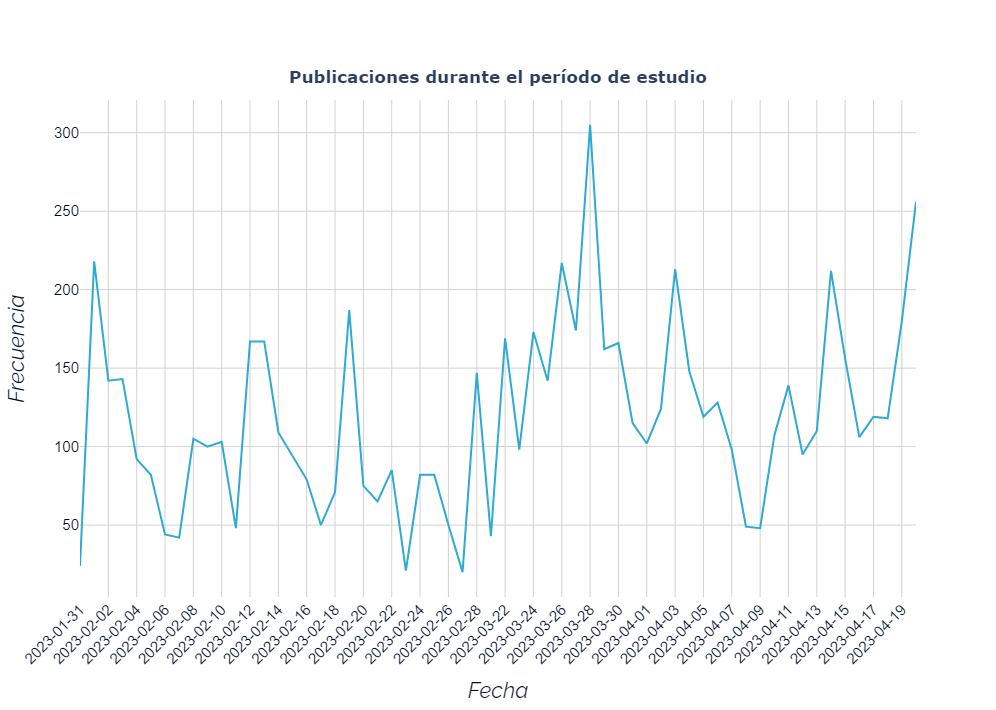

In [98]:
total_publicaciones_por_dia(dpg2,  width=1530, height=710, 
                                color_line='#2dabd2' ,color_font="#000e28", gridcolor='#D3D3D3', zerolinecolor="#D3D3D3",
                                save=False, name='Linea_Tiempo_Publicacion_dia')

### Hashtags v2

In [24]:
import re
import pandas as pd
# Crear copia del df utilizado
df_tmp = dpg2.copy()

In [25]:
# Define una función para extraer las etiquetas utilizadas
def extraer_etiquetas(texto):
    menciones = re.findall(r'#\w+', texto)  # Busca todas las etiquetas que comienzan con "#" y contienen al menos un carácter alfanumérico
    return menciones

# Aplica la función de extracción de menciones a la columna "mensaje" del DataFrame
df_tmp['menciones'] = df_tmp['message'].apply(extraer_etiquetas)

# Cuenta el número de etiquetas del df evaluado
conteo_menciones = {}
for menciones in df_tmp['menciones']:
    for mencion in menciones:
        if mencion in conteo_menciones:
            conteo_menciones[mencion] += 1
        else:
            conteo_menciones[mencion] = 1

# Ordena los usuarios por número de menciones en orden descendente
usuarios_mencionados = sorted(conteo_menciones.items(), key=lambda x: x[1], reverse=True)
usuarios_mencionados = pd.DataFrame(usuarios_mencionados, columns=['Word', 'Frequency'] )

# Muestra los 10 usuarios más mencionados
print(usuarios_mencionados[:10])

                Word  Frequency
0               #FVF        317
1        #Portuguesa        145
2         #LigaFUTVE        123
3         #Venezuela         99
4          #Deportes         99
5         #Arbitraje         86
6  #SiempreVinotinto         77
7          #DaleRayo         76
8  #Venezuelaesfutve         75
9     #Temporada2023         75


In [26]:
import re
import pandas as pd

# Define una función para extraer las menciones de usuario
def extraer_menciones(texto):
    #menciones = re.findall(r'@\w+', texto)  # Busca todas las menciones que comienzan con "@" y contienen al menos un carácter alfanumérico
    menciones = re.findall(r'@[\w.]+', texto) 

    menciones_output = []
    for mencion in menciones:
        if mencion[-1] == '.':
            menciones_output.append(mencion[:-1])
        else:
            menciones_output.append(mencion)
    return menciones_output

# Aplica la función de extracción de menciones a la columna "mensaje" del DataFrame
df_tmp['menciones'] = df_tmp['message'].apply(extraer_menciones)

# Cuenta el número de menciones para cada usuario
conteo_menciones = {}
for menciones in df_tmp['menciones']:
    for mencion in menciones:
        if mencion in conteo_menciones:
            conteo_menciones[mencion] += 1
        else:
            conteo_menciones[mencion] = 1

# Ordena los usuarios por número de menciones en orden descendente
usuarios_mencionados = sorted(conteo_menciones.items(), key=lambda x: x[1], reverse=True)
usuarios_mencionados = pd.DataFrame(usuarios_mencionados, columns=['Word', 'Frequency'] )

# Muestra los 10 usuarios más mencionados
print(usuarios_mencionados[:10])

              Word  Frequency
0     @FVF_Oficial       2897
1  @jandresgimenez        642
2   @SeleVinotinto        524
3       @LigaFUTVE        472
4           @agdws        317
5    @juvenilesfvf        313
6     @pulidojorge        241
7         @EFF_FVF        202
8   @DeportivoLara        189
9   @NicolasMaduro        174


### Usuarios a quienes mas le responden (o mas comentarios poseen)

In [27]:
# Usuarios con mas comentarios
dpg2.in_reply_to_screen_name.value_counts()[:10]

0                  5428
pulidojorge         163
klon_perez          103
FVF_Oficial          87
Naranjazos10         64
carlostaracher       41
FFCV_info            28
foro_todofutbol      24
gregarces            16
CDominguesP          16
Name: in_reply_to_screen_name, dtype: int64

In [28]:
# validamos a los usuarios con mas comentarios
dpg2.in_reply_to_user_id.value_counts()

6.328484e+07    163
2.218299e+08    103
3.606713e+08     87
1.475198e+18     64
4.096021e+08     41
               ... 
1.551917e+08      1
1.125483e+08      1
1.455221e+18      1
7.058826e+17      1
4.590792e+07      1
Name: in_reply_to_user_id, Length: 586, dtype: int64

In [29]:
# Numero de comentarios totales
dpg2.comments_count.value_counts()[:10]

0     6243
1      579
2      117
3       42
4       28
8        9
6        9
9        9
5        8
23       4
Name: comments_count, dtype: int64

### Usuarios que recibieron mas retweets a sus mensajes

In [30]:
# Usuarios con mas retweet
dpg2.retweet_screen_name.value_counts()[:10]

0                  2833
klon_perez          517
FVF_Oficial         330
delcyrodriguezv     315
Naranjazos10        232
zuricht94           146
MariaGArocha        141
foro_todofutbol     119
SOLOVENEX_          115
amarcanopsuv         96
Name: retweet_screen_name, dtype: int64

### Usuarios mas citados (quotes)

In [31]:
# Usuarios mas citados
dpg2.quote_screen_name.value_counts()[:10]

0                  6726
klon_perez           40
Naranjazos10         23
martringut           19
MoralesGabriel_      12
daviladalgi          12
pulidojorge          11
FVF_Oficial          10
danibrizuelaof       10
SeleVinotinto         9
Name: quote_screen_name, dtype: int64

### Usuarios que recibieron mas likes (favoritos)

In [32]:
# Usuarios que recibieron mas likes (favoritos)
dpg2_lc = dpg2.groupby('username')['likes_count'].sum().reset_index().sort_values(['likes_count'], ascending=False)
dpg2_lc[:10]

,username,likes_count
1412,klon_perez,4521
687,Naranjazos10,1688
826,SOLOVENEX_,1360
1219,foro_todofutbol,822
1079,carlostaracher,609
1290,idiomafutve,608
339,FVF_Oficial,558
606,Luis_MontillaG,558
1592,pulidojorge,544
642,MarioSanchezVe,531


In [33]:
dpg2.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'quoted_status_id', 'Fecha_completa', 'date',
       'hour', 'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'location', 'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_side

In [34]:
dftotal.groupby(['id_post', 'username', 'message'])['retweet_count'].sum().reset_index().sort_values(['retweet_count'], ascending=False)[:10]

,id_post,username,message,retweet_count
7414,1642691764489187328,MariaGArocha,"Hablando de bienes ROBADOS......\n Qué será de la sede ""EXPROPIADA"" a Multinacional de Seguros en la AV 30 de Acarigua y adjudicada a panas de @hugbelpsuv de la FVF en #Portuguesa?. Curiosamente se trata de los mismos que ""pasaron raqueta"" en Anzoátegui, Guayana y Trujillo. https://t.co/DX2qqWMypX",636
2669,1627339576472702978,klon_perez,"El expresidente del Deportivo Lara, Khalil Yusef, se fue del país dejando un montón de deudas, habiendo estafado jugadores del FUTVE y de paso dejando tirados sin poder volver a su país a varios importados que pretendía fichar para este año... \n\nTodo esto es PERMITIDO por la FVF. https://t.co/Z04J0vBRcA",627
11165,1649077390394400768,VTVcanal8,"#EnVideo📹| Pdte. de la @FVF_Oficial Jorge Jiménez subrayó que el Estadio de Fútbol de Camurí Chico, en el mcpio. Vargas del edo. La Guaira, es el primero en inaugurarse del proyecto en marcha de todas las entidades del país, para el impulso del deporte nacional.\n\n#ManoDeHierro https://t.co/N4dBJqAMkl",612
5165,1640017979495645184,zuricht94,"Laydeker Navas operador Número uno de Hugbel Roa y Tareck El Aissami en el Fútbol, actualmente Gerente General del equipo Academia Anzoategui y también directivo de la FVF y Diputado por el Estado Portuguesa. \n\nFue Gerente también de los equipos Mineros de Guayana y Trujillanos… https://t.co/YLASI03JTU",578
7126,1642293509947367425,MervinMaldonad0,"¡La GUAIRA tendrá su nuevo estadio de FÚTBOL profesional! ⚽️🥇\n\nSe estrenará en los V Juegos Deportivos del ALBA, y está quedando bello 😍\n\nGracias Presidente @NicolasMaduro\nGobernador @Jateranoficial @FVF_Oficial 💪\n\n¡El deporte en Venezuela brillando! 👏 https://t.co/Nh8zl6l0Kn",221
5687,1640338386589212674,SOLOVENEX_,🇻🇪🥲 • El 𝒆𝒎𝒐𝒕𝒊𝒗𝒐 𝒎𝒆𝒏𝒔𝒂𝒋𝒆 de Fernando Batista a los venezolanos en el exterior… \n\n. @bochabatista trabaja junto a la @selevinotinto en suelo árabe por la Fecha FIFA del mes de marzo.\n\n♥️ ¡𝗟𝗶𝗸𝗲 si te sentiste identificado/a! \n\n🎥 | Comunicaciones @FVF_Oficial | https://t.co/HgVG2cGPe1,145
665,1621690321426849795,ManoloDavilatv,Señores de la liga Futve y @FVF_Oficial recuerden que no se puede trasmitir nuestro Fútbol por canales internacionales por suscripción solamente. Es una obligación que se vea en Venezuela en señal abierta…es una de las normas que tiene que cumplir la Federación de Fútbol..,110
8993,1645392663728848896,EnsedeCiencia,Se replican por métodos que sólo habían sido observados a nivel molecular 🤯\n\nhttps://t.co/anMMFC7pEF,108
11774,1649167446887002116,SOLOVENEX_,__ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,101
10840,1648529733385351168,amarcanopsuv,Dios bendice nuestro estado Bolívar!!! Vamos por más en el Cachamay @FVF_Oficial @NicolasMaduro @delcyrodriguezv @pinfantea @MervinMaldonad0 https://t.co/yx6WfvF3SF,96


In [35]:
dpg1.groupby(['id_post', 'username', 'message'])['retweet_count'].sum().reset_index().sort_values(['retweet_count'], ascending=False)[:10]

,id_post,username,message,retweet_count
7414,1642691764489187328,MariaGArocha,"Hablando de bienes ROBADOS......\n Qué será de la sede ""EXPROPIADA"" a Multinacional de Seguros en la AV 30 de Acarigua y adjudicada a panas de @hugbelpsuv de la FVF en #Portuguesa?. Curiosamente se trata de los mismos que ""pasaron raqueta"" en Anzoátegui, Guayana y Trujillo. https://t.co/DX2qqWMypX",636
2669,1627339576472702978,klon_perez,"El expresidente del Deportivo Lara, Khalil Yusef, se fue del país dejando un montón de deudas, habiendo estafado jugadores del FUTVE y de paso dejando tirados sin poder volver a su país a varios importados que pretendía fichar para este año... \n\nTodo esto es PERMITIDO por la FVF. https://t.co/Z04J0vBRcA",627
11165,1649077390394400768,VTVcanal8,"#EnVideo📹| Pdte. de la @FVF_Oficial Jorge Jiménez subrayó que el Estadio de Fútbol de Camurí Chico, en el mcpio. Vargas del edo. La Guaira, es el primero en inaugurarse del proyecto en marcha de todas las entidades del país, para el impulso del deporte nacional.\n\n#ManoDeHierro https://t.co/N4dBJqAMkl",612
5165,1640017979495645184,zuricht94,"Laydeker Navas operador Número uno de Hugbel Roa y Tareck El Aissami en el Fútbol, actualmente Gerente General del equipo Academia Anzoategui y también directivo de la FVF y Diputado por el Estado Portuguesa. \n\nFue Gerente también de los equipos Mineros de Guayana y Trujillanos… https://t.co/YLASI03JTU",578
7126,1642293509947367425,MervinMaldonad0,"¡La GUAIRA tendrá su nuevo estadio de FÚTBOL profesional! ⚽️🥇\n\nSe estrenará en los V Juegos Deportivos del ALBA, y está quedando bello 😍\n\nGracias Presidente @NicolasMaduro\nGobernador @Jateranoficial @FVF_Oficial 💪\n\n¡El deporte en Venezuela brillando! 👏 https://t.co/Nh8zl6l0Kn",221
5687,1640338386589212674,SOLOVENEX_,🇻🇪🥲 • El 𝒆𝒎𝒐𝒕𝒊𝒗𝒐 𝒎𝒆𝒏𝒔𝒂𝒋𝒆 de Fernando Batista a los venezolanos en el exterior… \n\n. @bochabatista trabaja junto a la @selevinotinto en suelo árabe por la Fecha FIFA del mes de marzo.\n\n♥️ ¡𝗟𝗶𝗸𝗲 si te sentiste identificado/a! \n\n🎥 | Comunicaciones @FVF_Oficial | https://t.co/HgVG2cGPe1,145
665,1621690321426849795,ManoloDavilatv,Señores de la liga Futve y @FVF_Oficial recuerden que no se puede trasmitir nuestro Fútbol por canales internacionales por suscripción solamente. Es una obligación que se vea en Venezuela en señal abierta…es una de las normas que tiene que cumplir la Federación de Fútbol..,110
8993,1645392663728848896,EnsedeCiencia,Se replican por métodos que sólo habían sido observados a nivel molecular 🤯\n\nhttps://t.co/anMMFC7pEF,108
11774,1649167446887002116,SOLOVENEX_,__ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,101
10840,1648529733385351168,amarcanopsuv,Dios bendice nuestro estado Bolívar!!! Vamos por más en el Cachamay @FVF_Oficial @NicolasMaduro @delcyrodriguezv @pinfantea @MervinMaldonad0 https://t.co/yx6WfvF3SF,96


In [36]:
dpg2.groupby(['id_post', 'username', 'message'])['retweet_count'].sum().reset_index().sort_values(['retweet_count'], ascending=False)[:10]

,id_post,username,message,retweet_count
1893,1627339576472702978,klon_perez,"El expresidente del Deportivo Lara, Khalil Yusef, se fue del país dejando un montón de deudas, habiendo estafado jugadores del FUTVE y de paso dejando tirados sin poder volver a su país a varios importados que pretendía fichar para este año... \n\nTodo esto es PERMITIDO por la FVF. https://t.co/Z04J0vBRcA",627
3343,1640017979495645184,zuricht94,"Laydeker Navas operador Número uno de Hugbel Roa y Tareck El Aissami en el Fútbol, actualmente Gerente General del equipo Academia Anzoategui y también directivo de la FVF y Diputado por el Estado Portuguesa. \n\nFue Gerente también de los equipos Mineros de Guayana y Trujillanos… https://t.co/YLASI03JTU",578
3548,1640338386589212674,SOLOVENEX_,🇻🇪🥲 • El 𝒆𝒎𝒐𝒕𝒊𝒗𝒐 𝒎𝒆𝒏𝒔𝒂𝒋𝒆 de Fernando Batista a los venezolanos en el exterior… \n\n. @bochabatista trabaja junto a la @selevinotinto en suelo árabe por la Fecha FIFA del mes de marzo.\n\n♥️ ¡𝗟𝗶𝗸𝗲 si te sentiste identificado/a! \n\n🎥 | Comunicaciones @FVF_Oficial | https://t.co/HgVG2cGPe1,145
499,1621690321426849795,ManoloDavilatv,Señores de la liga Futve y @FVF_Oficial recuerden que no se puede trasmitir nuestro Fútbol por canales internacionales por suscripción solamente. Es una obligación que se vea en Venezuela en señal abierta…es una de las normas que tiene que cumplir la Federación de Fútbol..,110
5489,1645392663728848896,EnsedeCiencia,Se replican por métodos que sólo habían sido observados a nivel molecular 🤯\n\nhttps://t.co/anMMFC7pEF,108
6993,1649167446887002116,SOLOVENEX_,__ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,101
6645,1648529733385351168,amarcanopsuv,Dios bendice nuestro estado Bolívar!!! Vamos por más en el Cachamay @FVF_Oficial @NicolasMaduro @delcyrodriguezv @pinfantea @MervinMaldonad0 https://t.co/yx6WfvF3SF,96
2154,1628153472720818178,klon_perez,"La Directiva del equipo Héroes de Falcón le debe dinero a un grupo de personas a las que contrató para un proyecto de E Sports.\n\nLos directivos bloquearon del WhatsApp a quienes les están cobrando.\n\nBienvenidos al FUTVE...donde estafas, robas... y ni la FVF ni la Liga hacen nada. https://t.co/ckHl9VwBbx",92
6635,1648508968812298242,amarcanopsuv,Todo nuestro apoyo !!! Gracias hermanos de la @FVF_Oficial por volver a casa !!! El CTE Cachamay está RENACIENDO @NicolasMaduro @MervinMaldonad0 https://t.co/kkzZ7a1lix,86
6035,1647003014421512193,klon_perez,¿Qué opinan de la decisión de la Federación Venezolana de Fútbol (FVF) de que La Vinotinto juegue su primer partido por eliminatorias mundialistas en Maturín? https://t.co/alJMRDWWgd,73


In [37]:
dpg2[dpg2['id_post'] == 1627339576472702978]['retweet_count']

9278    627
Name: retweet_count, dtype: int64

In [38]:
dpg1[dpg1['id_post'] == 1642691764489187328]['retweet_count']

4533    636
Name: retweet_count, dtype: int64

In [39]:
dftotal[dftotal['id_post'] == 1642691764489187328]['retweet_count']

4533    636
Name: retweet_count, dtype: int64

In [40]:
dftotal.iloc[4533]

_id                                                                                                                                                                                                                                                                                              6442afc53c00c6c014a48ba2
created_at                                                                                                                                                                                                                                                                                            2023-04-03 00:53:31
id_post                                                                                                                                                                                                                                                                                               1642691764489187328
id_str                                                    

In [41]:
# Filtrando el df en funcion de los usuarios que aparecen mas de una vez en el df
dpg2.groupby(['id_post', 'username', 'message'])['retweet_count'].sum().reset_index().sort_values(['retweet_count'], ascending=False)[:10]

,id_post,username,message,retweet_count
1893,1627339576472702978,klon_perez,"El expresidente del Deportivo Lara, Khalil Yusef, se fue del país dejando un montón de deudas, habiendo estafado jugadores del FUTVE y de paso dejando tirados sin poder volver a su país a varios importados que pretendía fichar para este año... \n\nTodo esto es PERMITIDO por la FVF. https://t.co/Z04J0vBRcA",627
3343,1640017979495645184,zuricht94,"Laydeker Navas operador Número uno de Hugbel Roa y Tareck El Aissami en el Fútbol, actualmente Gerente General del equipo Academia Anzoategui y también directivo de la FVF y Diputado por el Estado Portuguesa. \n\nFue Gerente también de los equipos Mineros de Guayana y Trujillanos… https://t.co/YLASI03JTU",578
3548,1640338386589212674,SOLOVENEX_,🇻🇪🥲 • El 𝒆𝒎𝒐𝒕𝒊𝒗𝒐 𝒎𝒆𝒏𝒔𝒂𝒋𝒆 de Fernando Batista a los venezolanos en el exterior… \n\n. @bochabatista trabaja junto a la @selevinotinto en suelo árabe por la Fecha FIFA del mes de marzo.\n\n♥️ ¡𝗟𝗶𝗸𝗲 si te sentiste identificado/a! \n\n🎥 | Comunicaciones @FVF_Oficial | https://t.co/HgVG2cGPe1,145
499,1621690321426849795,ManoloDavilatv,Señores de la liga Futve y @FVF_Oficial recuerden que no se puede trasmitir nuestro Fútbol por canales internacionales por suscripción solamente. Es una obligación que se vea en Venezuela en señal abierta…es una de las normas que tiene que cumplir la Federación de Fútbol..,110
5489,1645392663728848896,EnsedeCiencia,Se replican por métodos que sólo habían sido observados a nivel molecular 🤯\n\nhttps://t.co/anMMFC7pEF,108
6993,1649167446887002116,SOLOVENEX_,__ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,101
6645,1648529733385351168,amarcanopsuv,Dios bendice nuestro estado Bolívar!!! Vamos por más en el Cachamay @FVF_Oficial @NicolasMaduro @delcyrodriguezv @pinfantea @MervinMaldonad0 https://t.co/yx6WfvF3SF,96
2154,1628153472720818178,klon_perez,"La Directiva del equipo Héroes de Falcón le debe dinero a un grupo de personas a las que contrató para un proyecto de E Sports.\n\nLos directivos bloquearon del WhatsApp a quienes les están cobrando.\n\nBienvenidos al FUTVE...donde estafas, robas... y ni la FVF ni la Liga hacen nada. https://t.co/ckHl9VwBbx",92
6635,1648508968812298242,amarcanopsuv,Todo nuestro apoyo !!! Gracias hermanos de la @FVF_Oficial por volver a casa !!! El CTE Cachamay está RENACIENDO @NicolasMaduro @MervinMaldonad0 https://t.co/kkzZ7a1lix,86
6035,1647003014421512193,klon_perez,¿Qué opinan de la decisión de la Federación Venezolana de Fútbol (FVF) de que La Vinotinto juegue su primer partido por eliminatorias mundialistas en Maturín? https://t.co/alJMRDWWgd,73


In [42]:
dftotal.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_screen_name', 'user', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'Fecha_completa', 'date', 'hour',
       'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_

In [43]:
# Ver metricas de conteo de retweets y pagerank por usuario y/u observacion
dftotal[['username', 'retweet_count', 'Degree', 'indegree', 'outdegree', 'pageranks']].sort_values(['pageranks'], ascending=False)

,username,retweet_count,Degree,indegree,outdegree,pageranks
3045,klon_perez,0,961.0,938.0,23.0,0.03324
5765,klon_perez,0,961.0,938.0,23.0,0.03324
11310,klon_perez,0,961.0,938.0,23.0,0.03324
9430,klon_perez,11,961.0,938.0,23.0,0.03324
1267,klon_perez,0,961.0,938.0,23.0,0.03324
...,...,...,...,...,...,...
8617,FVF_Oficial,3,NaN,NaN,NaN,NaN
10359,FVF_Oficial,2,NaN,NaN,NaN,NaN
10496,FVF_Oficial,7,NaN,NaN,NaN,NaN
10759,FVF_Oficial,17,NaN,NaN,NaN,NaN


In [44]:
dftotal['count_user'] = dftotal.groupby('username')['username'].transform('count')
# Filtrar usuarios con una o menos publicaciones en el df en el periodo de estudio
# data_df_filtro = data_df[data_df['count_user']>1]

In [45]:
# dftotal['count_user'].value_counts().sort_values()

In [52]:
dftotal.groupby(['username'])['_id'].count().reset_index().sort_values(['_id'], ascending=False)[:10]

,username,_id
5993,pulidojorge,103
4551,foro_todofutbol,64
966,DvoRayoZuliano,58
5804,nuevodiaenlinea,56
6046,raykar57,54
5242,klon_perez,47
2501,MundoVenex,39
2183,LuisMed86143055,38
2163,LuisAle26902437,37
1198,FFCV_info,34


In [53]:
dftotal[dftotal['username']=='pulidojorge'].shape

(103, 87)

In [193]:
# Check the distribution of numerical features in the original dataset
def distributions(cols, df):
    fig, axes = plt.subplots(1,2, figsize=(13,8))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

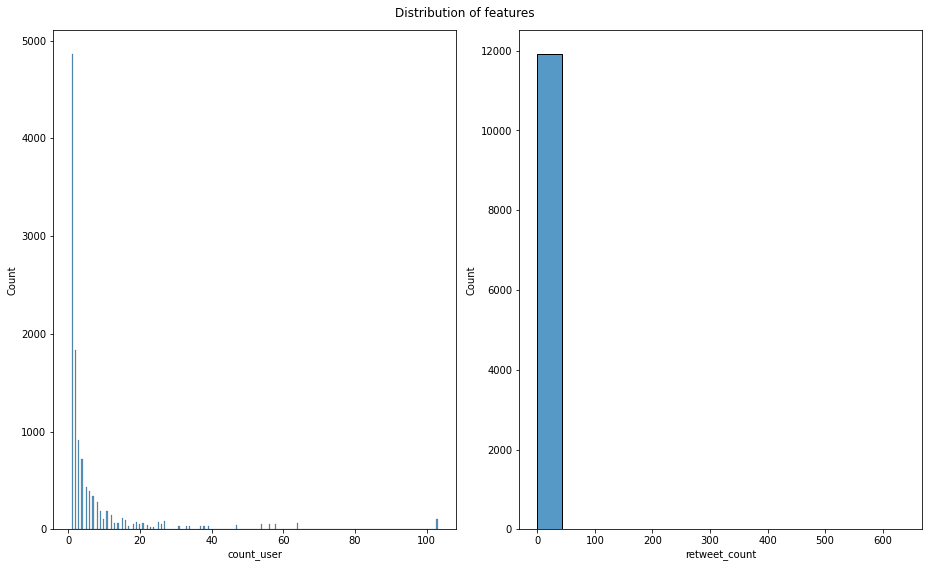

In [194]:
# Dataset unificado (merge)
distributions(['count_user', 'retweet_count'], dftotal) 

In [198]:
# Numero de filas totales
dftotal.shape[0]

11948

In [202]:
# Filtrar tweets que tienen mas de 0 rts
dftotal[dftotal['retweet_count']>0].shape[0]

840

In [201]:
# Filtrar tweets que tienen mas de 1 rts
dftotal[dftotal['retweet_count']>1].shape[0]

466

In [200]:
# Filtrar tweets que tienen mas de 2 rts
dftotal[dftotal['retweet_count']>2].shape[0]

332

In [199]:
# Filtrar tweets que tienen mas de 3 rts
dftotal[dftotal['retweet_count']>3].shape[0]

263

### Nota: al ser menos del 10% la cantidad de publicacionbes con mas de 1 rt, nos quedamos con el df original, sin embargo para la fase de evaluacion sera necesario, filtrar la data quedandonos con la de mayor interes
En particular dado qué muchos de nuestros usuarios son inactivos se ha decidido
exceptuarlos eliminando también su contenido relativo. La cota mínima de RT’s para qué
un usuario no sea descartado fue fijada en 10 unidades. Como resultado de esta operacion,
se ve en la Figura 4.2 cómo se elevó el percentil 70 tanto en los TW cómo en los RT de
cada usuario.
Dado qué la definición de las clases de relevancia explicadas en detalle en la siguiente
sección, están relacionadas con la distribución de la aceptación qué tienen los tweets,
analizamos su histograma y percentiles.
Como es de esperarse, mucho del contenido sólo pertenece al timeline de su autor, esto
hace qué la distribución sea muy abundante cercana a 1. Cómo podemos ver en la Figura
4.3 el percentíl 90 no escapa a lo previsible y nos obliga a realizar un descarte de aquellos
tweets insignificantes antes de cualquier análisis. Descartando aquellos con menos de 3
retweets, aumenta dicho percentil, llegando ahora hasta los 13 RT’s, determinando así
una potencial cota de división entre las clases de relevancia.

CAPÍTULO 4. CONJUNTO DE DATOS

paginas 38 a 42 de:

Predicción de Tendencias en Redes Sociales
basada en características sociales
y contenido 1


5.2.2. Heuristica de relevancia de un tweet
El objetivo de clasificación en dos clases relevante o insignificante para un tweet hace
qué debamos determinar una cota en la cantidad de retweets para considerarlo relevante si
la superara o insignificante en caso contrario. La cota se obtuvo mediante un muestreo de
los tweets agrupados en cantidad de retweets. Tomando el percentíl 90 %, sobre el dataset
normalizado(Figura 4.3), cómo la cota de división de clases se iniciaron los experimentos
donde la relevancia se determinará superando los 13 retweets.

pag. 47

In [54]:
dftotal['retweet_count'].mean()

0.6652159357214597

In [212]:
dftotal[['username', 'count_user', 'retweet_count', 'Degree', 'pageranks']].sort_values(['pageranks'], ascending=False)[20:50]

,username,count_user,retweet_count,Degree,pageranks
903,klon_perez,47,0,961.0,0.033240
1374,klon_perez,47,0,961.0,0.033240
9278,klon_perez,47,627,961.0,0.033240
9269,klon_perez,47,5,961.0,0.033240
1337,klon_perez,47,0,961.0,0.033240
9237,klon_perez,47,3,961.0,0.033240
1404,klon_perez,47,35,961.0,0.033240
11328,klon_perez,47,0,961.0,0.033240
11402,klon_perez,47,73,961.0,0.033240
6247,klon_perez,47,17,961.0,0.033240


## Nota: La aceptacion del usuario seria el promedio de este calculo Aceptacion (Rts/Numero de Tweets) +  Relacion (pageRanks * valencia)

In [213]:
# from sklearn import preprocessing

In [55]:
# Copiamos la data en otro df
dftotal2 = dftotal.copy()

# Aplicar la normalizacion a las siguientes columnas
# Lista de columnas
column = ['count_user', 'retweet_count', 'Degree']
for col in column:
    dftotal2[col+str('_norm')] = (dftotal2[col] - dftotal2[col].min()) / (dftotal2[col].max() - dftotal2[col].min())

In [56]:
dftotal2[['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks']].sort_values(['pageranks'], ascending=False)[:10]

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks
3045,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
5765,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
11310,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
9430,klon_perez,47,0.45098,11,0.017296,961.0,1.0,0.03324
1267,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
1265,klon_perez,47,0.45098,6,0.009434,961.0,1.0,0.03324
9438,klon_perez,47,0.45098,19,0.029874,961.0,1.0,0.03324
1254,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
49,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324
10128,klon_perez,47,0.45098,0,0.000000,961.0,1.0,0.03324


In [57]:
# valores faltantes
print(dftotal2.count_user_norm.isna().sum())
print(dftotal2.retweet_count_norm.isna().sum())
print(dftotal2.Degree_norm.isna().sum())
print(dftotal2.pageranks.isna().sum())

0
0
12
12


In [58]:
dftotal3 = dftotal2.dropna(subset=['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']).reset_index(drop=True)
dftotal3.shape

(11936, 90)

In [59]:
(dftotal3['retweet_count_norm'] / dftotal3['count_user_norm'])

0        0.030548
1        0.000000
2             NaN
3             NaN
4             NaN
           ...   
11931         NaN
11932         NaN
11933    0.000000
11934    0.000000
11935         NaN
Length: 11936, dtype: float64

In [60]:
(dftotal3['Degree_norm'] * dftotal3['pageranks'])

0        5.472716e-04
1        4.578564e-08
2        9.157128e-08
3        4.578564e-08
4        4.578564e-08
             ...     
11931    0.000000e+00
11932    4.578564e-08
11933    9.157128e-08
11934    3.152341e-05
11935    4.578564e-08
Length: 11936, dtype: float64

In [61]:
# Como vemos hay varias filas cuyo calculo seria igual a 0, por lo que
dftotal2[['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks']][:10]

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks
0,foro_todofutbol,64,0.617647,12,0.018868,104.0,0.108221,0.005057
1,miguel28gangel,3,0.019608,0,0.000000,1.0,0.001041,0.000044
2,FutbolAnz,1,0.000000,0,0.000000,2.0,0.002081,0.000044
3,edgardo0512,1,0.000000,0,0.000000,1.0,0.001041,0.000044
4,666rjrv,1,0.000000,0,0.000000,1.0,0.001041,0.000044
5,RichardZapata8,3,0.019608,0,0.000000,2.0,0.002081,0.000044
6,correajorge,6,0.049020,0,0.000000,2.0,0.002081,0.000044
7,luiyi70400222,1,0.000000,0,0.000000,1.0,0.001041,0.000044
8,LeafarPetit,4,0.029412,0,0.000000,3.0,0.003122,0.000049
9,LaDivinaDiva,4,0.029412,0,0.000000,15.0,0.015609,0.001025


In [62]:
((dftotal3['retweet_count_norm'] / dftotal3['count_user_norm']) * 0.50) + ((dftotal3['Degree_norm'] * dftotal3['pageranks']) * 0.50)

0        1.554767e-02
1        2.289282e-08
2                 NaN
3                 NaN
4                 NaN
             ...     
11931             NaN
11932             NaN
11933    4.578564e-08
11934    1.576171e-05
11935             NaN
Length: 11936, dtype: float64

In [63]:
dftotal3['indice_influencia'] = ((dftotal3['retweet_count_norm'] / dftotal3['count_user_norm']) * 0.50) + ((dftotal3['Degree_norm'] * dftotal3['pageranks']) * 0.50)
dftotal3.shape

(11936, 91)

In [64]:
dftotal3['indice_influencia'].fillna(0, inplace=True)

In [65]:
dftotal3[['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks', 'indice_influencia']][:10]

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks,indice_influencia
0,foro_todofutbol,64,0.617647,12,0.018868,104.0,0.108221,0.005057,1.554767e-02
1,miguel28gangel,3,0.019608,0,0.000000,1.0,0.001041,0.000044,2.289282e-08
2,FutbolAnz,1,0.000000,0,0.000000,2.0,0.002081,0.000044,0.000000e+00
3,edgardo0512,1,0.000000,0,0.000000,1.0,0.001041,0.000044,0.000000e+00
4,666rjrv,1,0.000000,0,0.000000,1.0,0.001041,0.000044,0.000000e+00
5,RichardZapata8,3,0.019608,0,0.000000,2.0,0.002081,0.000044,4.578564e-08
6,correajorge,6,0.049020,0,0.000000,2.0,0.002081,0.000044,4.578564e-08
7,luiyi70400222,1,0.000000,0,0.000000,1.0,0.001041,0.000044,0.000000e+00
8,LeafarPetit,4,0.029412,0,0.000000,3.0,0.003122,0.000049,7.648283e-08
9,LaDivinaDiva,4,0.029412,0,0.000000,15.0,0.015609,0.001025,7.999480e-06


In [66]:
dftotal3[['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks', 'indice_influencia']].sort_values(['indice_influencia'], ascending=False)

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks,indice_influencia
8263,eriduard16,1,0.0,1,0.001572,2.0,0.002081,0.000057,inf
11778,Anair16,1,0.0,3,0.004717,3.0,0.003122,0.000551,inf
10098,RequenaCFC,1,0.0,1,0.001572,1.0,0.001041,0.000044,inf
10027,edom2010,1,0.0,1,0.001572,2.0,0.002081,0.000279,inf
7211,fiesta106,1,0.0,1,0.001572,1.0,0.001041,0.000081,inf
...,...,...,...,...,...,...,...,...,...
5420,DJGS11,1,0.0,0,0.000000,1.0,0.001041,0.000044,0.0
5415,enriquefebres,1,0.0,0,0.000000,1.0,0.001041,0.000044,0.0
5408,HIPICATOTAL_USA,1,0.0,0,0.000000,1.0,0.001041,0.000044,0.0
5401,vagranadillof,1,0.0,0,0.000000,1.0,0.001041,0.000044,0.0


### Nota: Esto pasa por dejar los usuarios con una unica aparicion en el df. Por lo que a continuacion los filtramos

In [67]:
# Filtramos los usuarios con menos de una publicacion
dftotal3[dftotal3['count_user'] > 1][['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks', 'indice_influencia']].sort_values(['indice_influencia'], ascending=False)[:20]

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks,indice_influencia
6776,zuricht94,2,0.009804,578,0.908805,489.0,0.508845,0.015735,46.353060
1105,amarcanopsuv,2,0.009804,96,0.150943,128.0,0.133195,0.004329,7.698402
1124,amarcanopsuv,2,0.009804,86,0.135220,128.0,0.133195,0.004329,6.896515
11270,ManoloDavilatv,3,0.019608,110,0.172956,156.0,0.162331,0.004657,4.410755
10729,marieferro98,2,0.009804,47,0.073899,59.0,0.061394,0.002145,3.768934
11045,DeporLara,2,0.009804,41,0.064465,41.0,0.042664,0.002214,3.287783
222,MoralesGabriel_,2,0.009804,31,0.048742,20.0,0.020812,0.000617,2.485855
6254,SOLOVENEX_,6,0.049020,145,0.227987,191.0,0.198751,0.005918,2.326060
5154,MarioSanchezVe,3,0.019608,58,0.091195,82.0,0.085328,0.002120,2.325562
2049,OswaldoVivenes,3,0.019608,58,0.091195,51.0,0.053070,0.001195,2.325503


In [68]:
# Filtramos los usuarios con menos de una publicacion
dftotal3[dftotal3['count_user'] > 1][['username', 'count_user', 'count_user_norm', 'retweet_count', 'retweet_count_norm', 'Degree', 'Degree_norm', 'pageranks', 'indice_influencia']].sort_values(['pageranks', 'indice_influencia'], ascending=False)

,username,count_user,count_user_norm,retweet_count,retweet_count_norm,Degree,Degree_norm,pageranks,indice_influencia
9270,klon_perez,47,0.450980,627,0.985849,961.0,1.0,0.033240,1.109627
8604,klon_perez,47,0.450980,92,0.144654,961.0,1.0,0.033240,0.176997
2065,klon_perez,47,0.450980,73,0.114780,961.0,1.0,0.033240,0.143876
11390,klon_perez,47,0.450980,73,0.114780,961.0,1.0,0.033240,0.143876
74,klon_perez,47,0.450980,69,0.108491,961.0,1.0,0.033240,0.136903
...,...,...,...,...,...,...,...,...,...
11693,romaincaraballo,2,0.009804,0,0.000000,0.0,0.0,0.000044,0.000000
11740,freddyvira,4,0.029412,0,0.000000,0.0,0.0,0.000044,0.000000
11752,mscnoticias,3,0.019608,0,0.000000,0.0,0.0,0.000044,0.000000
11898,refnextEN,3,0.019608,0,0.000000,0.0,0.0,0.000044,0.000000


In [69]:
dftotal3.shape

(11936, 91)

In [70]:
dftotal4 = dftotal3[dftotal3['count_user'] > 1]
dftotal4.shape

(7074, 91)

In [71]:
# Definicion de parametros de carga
collection_name = 't_fvf_indice_influencia_v0_1'
insert_mongo (client, database, collection_name, dftotal4)

Los datos fueron insertados correctamente en la coleccion t_fvf_indice_influencia_v0_1, de la base de datos GNN.


## Evaluar estas metricas

Predicción de Tendencias en Redes Sociales
basada en características sociales
y contenido 1

Centralidad (PageRank - Degree -> 50%) + Aceptacion (Tweets / RTs -> 50%)


5.1. Selección de influenciadores
La estructura de datos de tipo grafo, busca abstraer una red de relaciones compleja con
el objetivo de poder ser interpretada para extraer la mayor información posible de ella.
Junto con la información relacional surgen ideas de optimizar la propagación de mensajes

con fenómenos tipo epidemia. Este tipo de análisis busca determinar la menor cantidad
de pasos necesarios para lograr la cobertura del grafo. Para la propagación óptima es
vital comprender qué nodos son determinantes para el resto de la población. Estos nodos
influenciadores tienen características qué hacen qué su actividad dentro del grafo tenga
repercusión en gran porción del total de los nodos. Será entonces fundamental contar con
su colaboración en el caso de querer llevar un mensaje a la totalidad de la población.
Como se puede ver en la Figura 5.2 la tarea de detección de influenciadores puede ser
compleja y dependiente del problema en particular. Por este motivo aquí se detallan los
métodos utilizados en este trabajo.
5.1.1. Aleatoria
Como mencionamos antes, la aleatoriedad es una técnica utilizada para determinar
la cota menor de rendimiento y así poder comparar nuestro modelo objetivo esperando
obtener resultados superiores. La detección aleatoria de influenciadores no es más qué
elegir al azar si un nodo será o no tenido en cuenta cómo influenciador. Este tipo de
selección devendrá en un modelo aleatorio qué ocasionalmente puede tener una performance
aceptable aunque en la mayoría de los casos se espera bastante baja o inclusive

nula. Por este motivo, para considerar las métricas de este modelo se promediará entre
las métricas de 10 selecciones de usuarios al azar por cada experimento qué se realice. De
esta manera se obtiene un modelo aleatorio más realista.

5.1.2. Por centralidad
Una selección más inteligente de los nodos nos lleva intuitivamente a pensar en aquellos
nodos con mayor grado o valencia, es decir, aquellos nodos qué tengan mayor cantidad
de enlaces en un paso a otros. Esta selección puede no ser suficiente, dado qué existen
casos qué un nodo interconecta cómo único camino 2 componentes conexas del grafo
mediante su nodo más central. Vemos qué el nodo en principio no es influenciador porque
posee escasas relaciones. Sin embargo si lo vemos desde el punto de vista de su alcance
de mediante dos pasos, posiblemente tenga una influencia considerable en la población
debido a qué se relaciona con los influenciadores más importantes de cada componente
conexa. Algoritmos cómo Katz o el popular PageRank de Google, explicados en la sección
2, resuelven este tipo de desajustes con un método iterativo de ponderación de relevancia.
De esta manera tendremos entonces aquellos nodos qué conocen a una gran porción del
grafo, o aquellos qué conozcan nodos de alta relevancia cómo nuestros influenciadores.

5.1.3. Por actividad y centralidad
Es vital para obtener los mejores resultados entender los detalles de cada problema.
Analizando la influencia en una red social cómo Twitter,**vemos qué no sólo importa la
ubicación dentro del grafo, característica qué ya queda resuelta por la centralidad del
nodo sino qué también es importante la actividad o aceptación qué tenga un nodo en
el aprovechamiento de la red. Aquel nodo qué tenga una volumen considerable de nodos
adyacentes pero nunca publique contenido o cuando lo haga no cause ningún impacto,
no será indispensable para la comunicación. Por otro lado tenemos aquellos puntos de
popularidad promedio pero con impacto frecuente y asegurado en sus pocos seguidores.
Por esto el ajuste del índice de actividad es importante y debe ser contemplado cómo una
medida más de influencia. En nuestro caso la actividad o aceptación, será determinada
por la cantidad de tweets qué generó el usuario y fue retweeteado por algún seguidor.
Quedará determinada la influencia en nuestro modelo cómo una combinación de un 50%
de aceptación y un 50% relacional mediante el cálculo de PageRank y la valencia del
nodo, y se eligirán cómo influenciadores los qué posean mayor exponente en estos valores.**
5.2. Predicción social pura
Solo con información social mediante el análisis de grafos, el modelo social puro fué el
primer experimento. Aquí se aplicaron los ajustes en reducción de dataset, mencionados
en el capítulo 4, y determinadas heuristicas para la definición de las clases de relevancia de
un tweet. Estos procesos cómo la extracción de características o detección de comunidades
serán explicados en esta sección. Finalmente veremos los clasificadores utilizados y sus
rendimientos respectivos.


### Influencia en funcion de la dara recolectada, validar numero de likes (favoritos), RTs, etiquetas, duracion de etiquetas, comentarios, citas. Entre otros.

Como saber si un usuario es influyente, en funcion de una busqueda, en funcion de su timeline , en funcion de ambas cosas, dependera de la cantidad de data. 

---
---

## Revisar lo expuesto anteriormente en funcion de la tesis doctoral: Modelo de variables de desempeño e impacto en Twitter.Un análisis comunicacional (abrir en firefox)

## Twitter provee dos tipos de informacion:
+ Estatica: que incluye el historial de una cuenta (fecha de registro en la plataforma y número de usuario) y ciertos datos que se actualizan con baja periodicidad (biografía, foto de perfil, nombre y titular de la cuenta).
+ Dinamica: relativa a las publicaciones y seguidores, que tendrá un ritmo de cambio proporcional al nivel de actividad y popularidad del usuario.

**Sobre esta base, la literatura científica muestra estudios de analítica de Twitter desde tres perspectivas: usuarios, contenido y red (Modelo de variables de desempeño e impacto en Twitter.
Un análisis comunicacional)**

# Perspectivas del analisis de influencia:
   + 1. Usuarios
   + 2. Contenido
   + 3. Grafo

## 1. Usuarios
### La tipología más elemental de usuarios es la de Java, Song, Finin y Tseng (2007), que define tres categorías relacionando audiencias e intencionalidad: 

1. fuentes de información (amplia base de seguidores y pocos seguidos)
2. buscadores de datos (pocos seguidores, muchos seguidos)
3. buscan relacionarse (proporción similar de seguidores y seguidos).

**Estudios suplementarios observan el nivel de reciprocidad y evidencian que el 78% de los usuarios se conecta en un solo sentido, mientras que solo el 22% tiene una relación recíproca (Anber, Salah y El-Aziz, 2016), lo que muestra que el perfil más extendido es el de buscadores de información.**

### Tipos de usuarios

In [521]:
# Umbral de proporción del calculo
umbral = 0.81 # valores entre 0 y 1, mientras mayor el numero, la proporcion tiene que ser mas similar

In [525]:
# Calcular la proporción entre followers y followings
proporcion = dftotal4[['username', 'followers', 'followings', 'tipo_usuario']]['followers'] / dftotal4[['username', 'followers', 'followings', 'tipo_usuario']]['followings']

# Definir las condiciones para asignar las clases
condiciones = [
    (proporcion > umbral),
    (proporcion < umbral),
    (proporcion == umbral)
]

# Definir las etiquetas de las clases correspondientes a las condiciones
# 0 -> Fuentes de informacion (amplia base de seguidores y pocos seguidos)
# 1 -> Buscadores de datos (pocos seguidores, muchos seguidos)
# 2 -> Buscadores de relaciones (proporción similar de seguidores y seguidos)
etiquetas = [0, 1, 2] 

# Asignar la clase correspondiente a cada usuario según las condiciones
dftotal4[['username', 'followers', 'followings', 'tipo_usuario']]['tipo_usuario'] = np.select(condiciones, etiquetas, default=-1)

In [526]:
# Mostrar el DataFrame con las clases asignadas
dftotal4[['username', 'followers', 'followings', 'tipo_usuario']]

,username,followers,followings,tipo_usuario
0,foro_todofutbol,17771,4132,0
1,miguel28gangel,1430,1773,1
5,RichardZapata8,2236,2418,0
6,correajorge,130,100,0
8,LeafarPetit,2750,4957,1
...,...,...,...,...
11927,javisu2272,1,51,1
11928,carlospa200,436,2063,1
11930,wagg321,255,1586,1
11933,Gustavo_BHR,756,798,0


In [528]:
dftotal4.reset_index(drop=True, inplace=True)

In [529]:
dftotal4[['username', 'followers', 'followings', 'tipo_usuario']]

,username,followers,followings,tipo_usuario
0,foro_todofutbol,17771,4132,0
1,miguel28gangel,1430,1773,1
2,RichardZapata8,2236,2418,0
3,correajorge,130,100,0
4,LeafarPetit,2750,4957,1
...,...,...,...,...
7069,javisu2272,1,51,1
7070,carlospa200,436,2063,1
7071,wagg321,255,1586,1
7072,Gustavo_BHR,756,798,0


In [530]:
# Definicion de parametros de carga
collection_name = 't_fvf_indice_influencia_tipo_usuario'
insert_mongo (client, database, collection_name, dftotal4)

Los datos fueron insertados correctamente en la coleccion t_fvf_indice_influencia_tipo_usuario, de la base de datos GNN.


### Actividad y temporalidad
Esta visión se complementa con varios análisis que, además de considerar la proporción seguidores/seguidos, introducen métricas combinadas de actividad y temporalidad, como la concentración de tuits en un período. Es el caso de Bruns y Stieglitz (2013ª) y Krishnamurthy, Gill y Arlitt (2008) cuyos planteamientos también toman en cuenta la plataforma de publicación, sea esta Web, aplicaciones móviles o sistemas de mensajería instantánea, para una visión más amplia del tipo de usuario, según su comportamiento en distintos canales. 

**Como puedo medirlo, hacerlo?**

### Personalidad de una cuenta
Otras clasificaciones se remiten a la personalidad de una cuenta, inferida a partir de la actitud percibida en sus publicaciones. Así, Qiu, Lin, Ramsay y Yang (2012) hablan de usuarios extrovertidos, neuróticos, abiertos y aquellos que buscan consensos y/o conciencia respecto de sus causas.

**Como puedo medirlo, hacerlo?**

## Motivacion para Tuitear y Contenido Publicado
Para otros autores, los usuarios se dividen de acuerdo con su motivación para tuitear y con el contenido publicado. En este sentido, Zhao y Rosson (2009) consideran tres segmentos: quienes comparten actualizaciones cortas de su vida personal, quienes informan en tiempo real sobre un hecho noticioso en proceso y quienes reenvían información de terceras fuentes.

1. Quienes comparten actualizaciones cortas de su vida personal.
2. Quienes informan en tiempo real sobre un hecho noticioso en proceso.
3. Quienes reenvian informacion de terceras fuentes.

**Como puedo medirlo, hacerlo?**

### Número de seguidores y su nivel de influencia

Estudios adicionales catalogan a los usuarios de acuerdo con una combinación entre su número de seguidores y su nivel de influencia, entendida como la capacidad de generar reacciones de terceros (Bastos, Travitzki y Puschmann, 2012). En este enfoque se circunscribe la fórmula de Mathiesen, Angheluta, Ahlgren y Jensen (2013), que analiza la frecuencia de publicación, el impacto del contenido ¾reflejado a través de retuits¾ y el tiempo de permanencia de una temática, calculado según el ciclo de vida de un hashtag. Según estos factores, se identifican usuarios influyentes y se hacen predicciones fuera de Twitter.

**Como puedo medirlo, hacerlo?**

---

## 2. Contenido
Si bien la visión desde el usuario es amplia, la investigación centrada en el contenido ha sido abordada desde una mayor diversidad de ángulos. Una primera aproximación es la morfología de un tuit, que incluye la consideración de sus elementos, tales como texto, enlaces, etiquetas, menciones y/o elementos multimedia (Kumar, Morstatter y Liu, 2014). Investigaciones más exhaustivas, entre 2007 y 2010, dividen el contenido en seis categorías recurrentes: noticioso (información de medios de comunicación), fáctico (amplía información de un tema a través de un enlace), tuits de spam8 , estatus personal (experiencias personales o anecdóticas), autopromoción y conversaciones; cada una de ellas con sus respectivas subcategorías, que hacen referencia a la especificidad del asunto de la publicación y a su formato. Por ejemplo, solicitudes, saludos, respuestas automáticas, localizaciones, apoyo, titulares, entre otros (Honeycutt y Herring, 2009; Jansen, Zhang, Sobel y Chowdury, 2009; Java, Song, Finin y Tseng, 2007b; Kelly, 2009; Naaman, Boase y Lai, 2010).

#### Division del contenido en seis categorias:
1. noticioso (información de medios de comunicación)
2. fáctico (amplía información de un tema a través de un enlace)
3. tuits de spam
4. estatus personal (experiencias personales o anecdóticas)
5. autopromoción
6. conversaciones

**cada una de ellas con sus respectivas subcategorías, que hacen referencia a la especificidad del asunto de la publicación y a su formato. Por ejemplo, solicitudes, saludos, respuestas automáticas, localizaciones, apoyo, titulares, entre otros (Honeycutt y Herring, 2009; Jansen, Zhang, Sobel y Chowdury, 2009; Java, Song, Finin y Tseng, 2007b; Kelly, 2009; Naaman, Boase y Lai, 2010).**

### Privacidad y Seguridad
Esta sucesión de artículos académicos derivó en debates sobre privacidad y seguridad. No obstante, el trabajo de Humphreys, Gill y Krishnamurthy (2010) evidenció que **menos del 1% de los tuits contiene información personal sensible, como correos electrónicos, direcciones postales o números telefónicos, considerada como la más riesgosa. Sin embargo, un 12% de las publicaciones muestra la ubicación del usuario y más de un 20% se refiere a actividades y opiniones personales de manera sistemática, por lo que los autores llaman la atención sobre la facilidad de relacionar estos datos para colegir hábitos del titular de una cuenta.**


**Como puedo medirlo, hacerlo?**

## Menciones (Conversaciones)
Un área prioritaria dentro del estudio de contenido son las conversaciones. **Todo tuit que incluya el formato @usuario es entendido como una conversación, pues se asume como una búsqueda explícita de diálogo con el usuario mencionado.** En este sentido, Mischaud (2007) distribuyó las conversaciones en cuatro opciones temáticas: charlas cortas (por lo regular sobre comida, cultura popular o clima), actividades personales, tuits de trabajo y misceláneos (que cubren datos no clasificables como enlaces sin texto introductorio, publicaciones en idiomas no identificables y ortografía no estándar, como símbolos, emoticonos y abreviaciones). Honeycutt y Herring (2009) amplían dicha segmentación considerando el contenido respecto de la intencionalidad del usuario: los que transmiten experiencias, los que buscan conversación directa, aquellos que simplemente informan y los que tienden a alentar a otros.

#### Distribución de las conversaciones en cuatro opciones temáticas (Mischaud (2007)):

1. charlas cortas (por lo regular sobre comida, cultura popular o clima).
2. actividades personales.
3. tuits de trabajo.
4. misceláneos (que cubren datos no clasificables como enlaces sin texto introductorio, publicaciones en idiomas no identificables y ortografía no estándar, como símbolos, emoticonos y abreviaciones).

Honeycutt y Herring (2009) amplían dicha segmentación considerando el contenido respecto de la intencionalidad del usuario: los que transmiten experiencias, los que buscan conversación directa, aquellos que simplemente informan y los que tienden a alentar a otros.

#### Segmentación considerando el contenido respecto de la intencionalidad del usuario (Honeycutt y Herring (2009)):

1. los que transmiten experiencias.
2. los que buscan conversación directa.
3. aquellos que simplemente informan.
4. los que tienden a alentar a otros.

## Busqueda de interacción a traves del Retweet (RT)

Una fórmula también considerada como búsqueda de interacción es el retuit. Esta intencionalidad de compartir las publicaciones de terceros ha sido categorizada en cuatro ocpiones: transmitir contenido valioso, avalar a un usuario o apoyar un tema en particular, crear una conversación sobre un tuit existente y corresponder relaciones de amistad o lealtad. Estos retuits, en su mayoría (62%), contienen enlaces y etiquetas, que dan pie a las acciones de terceros (Boyd, Golder y Lotan, 2010).


#### Ha sido categorizada en cuatro opciones: 

1. transmitir contenido valioso. 
2. avalar a un usuario o apoyar un tema en particular.
3. crear una conversación sobre un tuit existente.
4. corresponder relaciones de amistad o lealtad. 


En ese punto, cabe señalar que el ciclo de vida de los enlaces depende mucho de su origen. Por ejemplo, **los enlaces de medios de comunicación tienden a ser de corta duración, mientras que los de bloggers propenden a ser más largos y reaparecen persistentemente, pues el público los reconoce favorablemente (LaMarre y Suzuki-Lambrecht, 2013)**. **Otra puntualización importante es que si bien pareciera que los retuits son acciones positivas, estudios posteriores empiezan a considerar a los retuits como formas sutiles de crítica e ironía y no necesariamente de adhesión. Esto se deriva de la sofisticación en el lenguaje o de la búsqueda de un método de evadir la detección automática de publicaciones que incumplan las normas de la comunidad (Guerra, Souza y Assunção, 2017).**

## Hashtags (etiquetas)

También los **hashtags muestran apertura a la conversación, ya que permiten el seguimiento de un tema por parte de un grupo de usuarios**. En este marco, el enfoque de Twitter como escenario de fenómenos virales es uno de los tipos de estudio más extendidos. **La mayoría busca determinar el ciclo de vida de una temática identificando el número de tuits que incluyen una
misma etiqueta, en un tiempo.**

Estas medidas sencillas de intensidad se combinan con otras formas de identificación de patrones, basadas en minería de datos, que sirven de base predictiva de comportamientos dentro y fuera de Twitter (Anber, Salah y El-Aziz, 2016; Bredl, Hünniger y Jensen, 2012; Peters, Chen, Kaplan, Ognibeni y Pauwels, 2013).

Complementariamente, varios estudios han relacionado los retuits con los temas compartidos dentro de una comunidad. Así, **los análisis de Bastos et al. (2012) muestran que, en una secuencia de tuits que incluye un mismo hashtag, en promedio, un 10% de los retuits y un 5% de las menciones directas se envía y recibe entre usuarios intercontectados. Estas cifras varían considerablemente de un tema a otro y la interacción tiende a subir a rangos de entre 15% y 19%, cuando se comparten actividades u opiniones relacionadas con ámbitos tales como tecnología, eventos especiales y política.**


**Como puedo medirlo, hacerlo?**

### Analisis de sentimiento
El estudio del contenido abarca también el análisis de sentimiento. Este implica la actitud de los miembros de una comunidad frente al tuit de un tercero en un espectro de lo positivo a lo negativo, pasando por un punto de neutralidad, determinado a través de algoritmos que identifican la polaridad de las palabras (Anber et al., 2016; Kumar et al., 2014). Este abordaje se ha vuelto esencial para las empresas que anhelan determinar si los usuarios que están hablando de sus marcas generan o no un entorno favorable. Cabe señalar que buena parte de las herramientas que miden el sentimiento de las publicaciones han sido originalmente desarrolladas por investigadores angloparlantes o para la medición de publicaciones en inglés, por lo que la clasificación de la polaridad de las palabras en castellano, en varias ocasiones, se aplica con cierto margen de error, tal como se constató en la presente investigación.

**Clasificacion de tweets:**
1. Positivo.
2. Negativo.
3. Neutro

## 3. Redes (Grafos)

El análisis de redes es el tercer posible enfoque para el análisis de la información obtenida de Twitter. Por un lado, se puede investigar el tipo de vínculo que tienen los miembros de una red, denominados nodos, sus interacciones y los flujos de información que comparten. Por otra parte, puede estudiarse la intensidad de los lazos, los patrones de interacción, la influencia entre miembros y la estructura misma de la red, que puede responder a **comportamientos de homofilia, que es la interacción entre perfiles similares, o reciprocidad, que es el seguimiento en dos vías** (Anber et al., 2016; Baym, 2000; Freeman, 1980; Hummon y Carley, 1993; Kavanaugh, Carroll, Rosson, Zin y Reese, 2005).

Una aproximación adicional es el **análisis de los miembros de una red en relación con el titular de la cuenta.** Marwick y Boyd (2011) señalan que las comunidades de Twitter se forman, en una primera etapa, entre amigos, familiares y colegas de trabajo y, luego, se extienden a nuevos contactos según la actividad y la relevancia del contenido publicado. Sin embargo, los autores observan que, cuando las audiencias exceden los 100.000 seguidores, estos se convierten en fanáticos y el titular de la cuenta empieza a actuar como una celebridad mostrando una estrategia planificada con ciertos tintes histriónicos.

Las conexiones internas dentro de una red y la fortaleza de esos vínculos también han sido objeto de varios estudios. Dubois y Gaffney (2014) calcularon un coeficiente de cohesión entre
los nodos de una red. **Sus resultados muestran que las cuentas Twitter de usuarios promedio tienden a tener coeficientes de uno, debido a que sus comunidades son pequeñas y, prácticamente, todos sus miembros cuentan con, al menos, un lazo en común. Por lo contrario, los usuarios influyentes registran coeficientes inferiores a 0,6, lo cual se explica porque al tener una amplia base de seguidores es menos probable que todos tengan un vínculo. Además, se concluyó que mientras más cohesionada sea una comunidad virtual, mayor facilidad tendrá para el flujo de la información.**

De ahí que **el poder de los usuarios de audiencias amplias radica más en el alcance que en la fluidez de los mensajes dentro de la red.** Cabe señalar que estas comunidades virtuales no necesariamente son espontáneas, sino creadas con propósitos específicos. Uno de los más examinados es la búsqueda de reciprocidad en procesos de enseñanza-aprendizaje . En estos casos, los miembros actúan como si de un foro se tratase al expresar libremente sus opiniones y plantear preguntas a otros miembros para requerir su consejo. **Este entorno determina que el valor de la red sea directamente proporcional al nivel de participación de los usuarios, por lo que su desafío primordial es hallar el motivador adecuado de acuerdo con los intereses del grupo (Phang, 2009).** 


Más allá de la variedad de aproximaciones a Twitter, basadas en sus métricas de usuario, contenido o red, **resulta fundamental explicar las formas de acceder a la información generada.** La más sencilla e inmediata para un usuario final, no especialista, son las herramientas de analítica disponibles en el mercado. Si bien estas cubren una amplia gama de datos, **cada una cumple con una función específica, que puede ser el análisis del comportamiento de ciertos usuarios, identificación de seguidores falsos, seguimiento de etiquetas y palabras clave, optimización de pauta, gestión de perfiles, entre otras.** Por ello, debe determinarse qué información se busca, con qué fin y sobre la base de qué presupuesto. Si bien algunos instrumentos ofrecen funciones mixtas, la evidencia muestra que lo habitual será definir una combinación de opciones, entre gratuitas y de pago, que permitan el acceso a un conjunto de datos suficiente para el procesamiento y la obtención de conclusiones válidas.

**Nota: La única infraestructura que Twitter provee para recolectar el 100% de tuits que cumple con un criterio de búsqueda se llama firehose. En el mundo, menos de cinco firmas tienen acceso (Kumar et al., 2014), por el alto costo que implica12 . Se puede hacer contacto directo con una de estas compañías y solicitar reportes por demanda, que son entregados en una hoja de cálculo como datos no estructurados y se cobra por tuit. Esta información requiere un proceso de minería de datos, apoyado en programas estadísticos profesionales o en métodos de inteligencia artificial.
En este contexto, es fundamental que todo investigador sea consciente de que, si los datos que utiliza no provienen del firehose, han sido previamente filtrados por las distintas estructuras de Twitter. Entonces, aunque sean estadísticamente válidos para la inferencia de conclusiones, de ninguna manera pueden tratarse como universo.**


**Pagina 142
La siguiente perspectiva de estudio es ‘en qué canal’ que, en este caso, es Twitter57 . Finalmente, el ámbito de ‘con qué efecto’ se resuelve en la categoría Influencia, definida como la capacidad de una cuenta de redes sociales de conseguir que los usuarios que siguen su perfil se muestren activos y se involucren con la difusión del mensaje (Marhuenda y Nicolás, 2012). Esta categoría analiza qué tan compartido, valorado y reconocido es un usuario en función de las acciones que generan terceros respecto de su cuenta, sean estos retuits, favoritos o integración en listas de seguimiento. Por ello, los tres ámbitos de estudio son: Amplificación, Valoración y Reconocimiento, con sus respectivos subindicadores.**

**Pagina 143
143 El indicador Amplificación muestra cuántas veces los seguidores de una cuenta han compartido un mensaje publicado por la cuenta de estudio y se calcula a través de los retuits por tipo de tuit. Su principal subindicador es la Tasa de amplificación, que indica el promedio de retuits que recibe cada publicación nativa de la cuenta de estudio. Para complementar las métricas de amplificación, también se considera el Porcentaje de tuits nativos retuiteados, que es la proporción de tuits que recibieron, al menos un retuit, respecto del total de tuits58 . A la categoría Influencia, también se agregó el indicador Valoración, que muestra cuánto un mensaje originado en la cuenta de estudio es apreciado por su red de seguidores (Kaushik, 2011). Se calcula en función de los favoritos recibidos de terceros a las publicaciones nativas. Su principal subindicador es la Tasa de aplauso, que indica el promedio de favoritos que reciben las publicaciones nativas de la cuenta de estudio. Este se combina con el Porcentaje de tuits nativos que fueron valorados, que indica la proporción de tuits que recibió, al menos, un favorito. Para cerrar esta categoría, se añadió el indicador Reconocimiento, que refiere cuándo una cuenta es considerada por otros usuarios al ser incluida en listas de Twitter. Incluye dos subindicadores: Listas a las que pertenece la cuenta y Listas por cada 1.000 seguidores.**

**Pagina 150:
El estándar aplicado para inferir si las tasas están en rangos aceptables para la cuenta es el de la Teorías de las Desigualidad Participativa62 . Así, una respuesta aceptable de interacciones dentro de una comunidad digital está entre un 1% y un 10% del universo de miembros (Carron- Arthur et al., 2014; Nielsen, 2006; Schneider, 2011).**

**Cabe resaltar que la categoría Influencia se refiere a la capacidad de una cuenta de generar acciones de terceros, sin embargo las definiciones académicas referidas en este estudio no hacen una argumentación de si esas acciones debieran ser positivas o negativas. Solo en el caso de favoritos, la connotación es claramente positiva. No obstante, la inclusión de cuentas dentro de listas puede ser positivo o negativo, ya que hay listas para un seguimiento crítico. Sin embargo, se las incluyó dentro de Reconocimiento, pues independientemente de su valoración, el incluir un perfil en una lista implica que un tercero admite la existencia de una cuenta en un contexto. 62 Id. 63 Una lista es un grupo de cuentas de Twitter seleccionadas bajo una categoría. Cada usuario puede crear sus propias listas o suscribirse a listas creadas por otros usuarios. Este indicador fue incluido en la categoría de Influencia, pues hace referencia a una acción iniciada por otro usuario. 64 La interpretación de los subindicadores Listas a las que pertecene la cuenta y Listas por cada 1.000 seguidores es sugerida por Twitonomy, una de las herramientas elegidas para la captura de tuits nativos para el presente estudio.**

**Pagina 151:
En ultimo lugar, respecto de los retuits, cabe relevar que si bien esta accion implicaba adhesion al contenido en fases tempranas de Twitter, ha cambiado, ya que se observa un fenomeno en que los retuits pueden usarse para causar antagonismo en las conversaciones publicas al ser usados con la intencion de ironizar su contenido y polarizar posiciones (Guerra, Souza, Assuncao, 2017)
PAgina 152:
152 El modelo consta de 20 indicadores y 82 subindicadores distribuidos en cinco categorías de análisis: Actividad, Contenido, Popularidad, Conversación e Influencia, correspondientes a las dimesiones clásicas de estudio de la Comunicación: quién (Actividad), dice qué (Contenido), a quién (Popularidad y Conversación), en qué canal (Twitter) y con qué efectos (Influencia). Cuatro de las categorías, Actividad, Popularidad, Conversación e Influencia, son de orden cuantitativo, y solo Contenido se aborda a través de un método cualitativo, tal como se muestra en la siguiente tabla-resumen: Tabla 5 Resumen del modelo CATEGORÍA ÁMBITOS DE ESTUDIO OBJETIVO INDICADORES SUBINDICADORES Actividad (Quién) Tipo de tuits nativos, Frecuencia e Intensidad Determinar el enfoque de de una cuenta: cuánto se expresa en una vía, cuánto responde y cuánto comparte 3 12 Contenido (Dice qué) Tema, tono, enfoque, sentimiento y estilo Definir de qué habla la cuenta y la manera en que expresa esos temas 5 20 Popularidad (A quién) Seguidores, Tasa de variación, Seguidos, Relación seguidores y seguidos Identificar el tamaño de la audiencia y su ritmo de crecimiento 3 5 Conversación (A quién) Cuentas más mencionadas, más retuiteadas y más respondidas, Sociabilidad y conexiones mutuas Mostrar la disposición de una cuenta para conversar y sus prioridades de interacción 5 12 Influencia (Con qué efectos) Amplificación, Aplauso y Reconocimiento Establecer la capacidad de un perfil de generar acciones de terceros 4 33 20 82**

**Página 178
En contraste, las dos categorías restantes, Popularidad e Influencia, miden el efecto producido por las anteriores en las audiencias, por lo que se nombrarán como categorías de impacto**

**Página 179**
Para este análisis, cabe retomar los resultados de los estudios de Jones y Rafaeli (1999), que muestran que elevar la frecuencia de publicación por usuario, dentro de una comunicad virtual, no necesariamente deriva en una mayor respuesta de sus miembros. Por lo contrario, si los rangos de flexibilidad de dicha comunidad se exceden, el efecto es la disminución gradual de las interacciones y, si el fenómeno persiste por períodos prolongados, se puede llegar al abandono de los miembros por percepción de sobrecarga informativa. Estos rangos de tolerancia de las comunidades virtuales varían según la plataforma. Así, por ejemplo, en Facebook, el rango está entre una y dos publicaciones por día; a la tercera, las respuestas en términos de me gusta, comentarios y compartir comienzan a descender. En Twitter, por su parte, la frecuencia aceptable es de cinco tuits por día, ya que, desde el sexto, la reacción en respuestas, retuits y favoritos inicia la tendencia a la baja (Lee, 2014). El elemento que define esta diferencia de frecuencias es el ciclo de vida de las publicaciones, que es el tiempo promedio que le requiere a una entrada llegar al nivel más alto de interacciones antes del descenso. A su vez, este período responde a la naturaleza del canal. En el caso de Facebook, que es un medio social que busca la construcción de comunidad y permite formatos de mayor extensión, el ciclo de vida promedio por publicación es de 90 minutos (Lee, 2014). Al contrario, en Twitter, que es considerada una red global de información colaborativa en tiempo real, de formatos más cortos y efímeros, **el ciclo de vida de un tuit oscila entre 15 y 30 minuto**

**Pagina 180**
180 (Bruns, 2012b). De ahí que a mayor ciclo de vida por entrada, menor frecuencia de publicación para evitar saturación en la audiencia. Relacionado con este punto, la presente investigación ha insistido en la relevancia del contraste entre los indicadores de Frecuencia e Intensidad, de la categoría Actividad, debido a que la primera se calcula como un promedio en un período, mientras que la segunda corrige anomalías por dispersión. En la práctica, esta diferencia muestra que puede haber cuentas que evidencian concentración de tuits en pocos días y aún así alcanzar las frecuencias recomendadas al calcular el promedio. No obstante, el resultado en términos de impacto en interacciones no sería necesariamente positiva, ya que, en ciertos días, se estaría saturando a la comunidad y hasta perdiendo miembros, mientras que, en otros, el contacto sería mínimo o nulo. Respecto de la Popularidad, cabe considerar que, además de la Actividad, existen factores externos al entorno digital que también pueden incidir en el tamaño de las audiencias. **Uno de ellos es qué tan reconocido es el titular de una cuenta, sea este una persona, producto, marca, institución o empresa, en el mundo fuera de línea. Como dicen Boyd y Ellison (2008), las redes sociales permiten la extensión al mundo online de lazos latentes del mundo offline. Un caso memorable es el del actor estadounidense Charlie Sheen, quien, en las primeras 24 horas de creación de su cuenta Twitter y sin haber publicado nada, ya contaba con un millón de
Pagina 181 181 seguidores 96 . Este fenómeno no es exclusivo de esta cuenta, pero es didáctico para evidenciar que el nivel de Actividad no tiene una relación causal necesaria con el crecimiento de seguidores.** Además, al analizar las cuentas de estudio, se mostró que los puntos más altos en la línea de crecimiento de Popularidad responden a factores externos de coyuntura y oportunidad relacionados con la publicación, por lo regular, cuando una nueva audiencia se motiva a seguir una temática pública a través de un hashtag. De otro lado, también se observó que cuando los lapsos de inactividad superan el 30% del período, empiezan a registrarse descenso de seguidores. **De ahí que si bien la alta Actividad no incide positivamente en la Popularidad, la escasa Actividad sí incide negativamente en la Popularidad. Retomando la primera parte planteada por la hipótesis, si bien se constata una correlación entre Actividad e Influencia, esta no implica causalidad, es decir, a mayor Actividad, no necesariamente se da mayor Influencia. Lo mismo ocurre con la segunda parte del enunciado que sugiere la correlación entre Actividad y Popularidad: mayor Actividad, no es condición de mayor Popularidad. De hecho, exceder los rangos de tolerancia de una comunidad, no solamente deriva en la disminución de interacciones, sino que puede incidir en la pérdida de miembros. En consecuencia, en ciertos casos, se pudiera dar que: a mayor Actividad, menor Popularidad. Por ello, la hipótesis planteada no es válida. 96 La cuenta fue creada el 1 de marzo, para el 8 de marzo contaba con 2.150.000 seguidores en Twitter. Charlie Sheen: Twitter mania grows, The Telegraph, https://www.telegraph.co.uk/culture/tvandradio/8367980/Charlie- Sheen-Twitter-mania-grows.html.**


**Pagina 189
Cabe recordar que la categoría Influencia está relacionada con favoritos y retuits, en otras palabras, se mide por la valoración y amplificación que genera una publicación. En este sentido, un contenido debe apuntar a generar más retuits que favoritos, pues las implicaciones varían: cuando una publicación recibe un favorito, la acción no habilita la visualización del tuit valorado**

**GLOSARIO**
+ Amplificación: uno de los indicadores de la categoría Influencia que observa qué tan compartidos son los tuits de la cuenta de estudio, por parte de sus seguidores.
+ Aplauso: uno de los indicadores de la categoría Influencia, que identifica qué tan valorados son los tuits de la cuenta de estudio, por parte de sus seguidores.
+ Influencia: una de las dos categorías de impacto, que estudia la capacidad que tiene la cuenta de estudio de generar acciones de terceros.
+ Nuevo nativo: tuit emitido por la cuenta de estudio, por primera vez dentro de una conversación o único si no hay interacciones, generado con el botón Redactar, desde Twitter o sus aplicaciones.
+ Reconocimiento: uno de los indicadores de la categoría Influencia, que señala en cuántas listas de Twitter está incluida la cuenta de estudio de manera nominal y la relación de ese total por cada 1.000 seguidores
+ Viralidad: la capacidad que tiene una publicación de ser compartida en rangos superiores a la respuesta natural de las comunidades virtuales, es decir, si genera retuits de terceros equivalentes a más del 10% de los seguidores de una cuenta.

219 Función: Monitoreo de menciones y de palabras clave
Tracx (https://www.tracx.com) Análisis: captura limitada de menciones complementada con localización de audiencias e identificación de influenciadores en diversas plataformas.

Viral Media (https://www.facebook.com/viralmediagt/) Análisis: captura menciones, identifica influenciadores, hace análisis de sentimiento y nubes de palabras y conceptos clave en 13 plataformas digitales. No hay versión gratuita, debe solicitarse demostración. Los paquetes dependen del número de menciones capturadas.

227 Función: Identificación de bots 108 Estas herramientas intentan detectar usuarios no reales, sino automatizados a través de robots, que hacen publicaciones basura o generan interacciones en alto volumen. Twitter Bots (https://botsdetwitter.wordpress.com/) Análisis: denuncia cualquier red de spam político, sea del partido que sea. Sus principios son: tolerancia cero hacia estas redes, visibilización y señalamiento dejando en evidencia a sus creadores, exigencia a Twitter para que establezca un canal efectivo de denuncia y suspenda las cuentas falsas. Focalizado en política española.

Función: Medición de influencia Las herramientas de esta clasificación miden principalmente la capacidad de una cuenta de generar acciones de terceros, sean estas positivas o negativas. Klout (https://klout.com/)

Análisis: otorga una puntuación de influencia entre 1 y 100, siendo 1 el menos influyente y 100 el más influyente. Es un algoritmo que relaciona todas las interacciones generadas en las diversasredes sociales. No diferencia entre acciones positivas y negativas y entrega un puntaje único por la combinación de las redes sociales. Pen 2018 salió del mercado.

Traackr (http://traackr.com/) Análisis: facilita la identificación de influenciadores con perfiles afines al usuario que busca con el fin de establecer contacto con ellos para generar estrategias de marketing.

Tweet Level (http://tweetlevel.edelman.com) Análisis: mide la influencia en Twitter con un puntaje entre 0 y 100. Para el año 2015 se encuentra fuera de mercado. 

Tweet Rank (http://tweetrank.me) Análisis: mide influencia en Twitter, basado en el número de retuits generados por una cuenta. Para el año 2015 se encuentra fuera de mercado Twitalyzer (http://www.twitalyzer.com/) 

Análisis: combina las medidas básicas de Twitter con datos demográficos y el índice de influencia Klout para generar una puntuación propia. En 2015, se encuentra fuera de mercado.

Función: Optimización de perfiles Estas herramientas proporcionan información sobre los perfiles, diferentes tipos de seguidos y seguidores, así como las interacciones que establecen. Recomiendan qué perfiles seguir o dejar de seguir. Ofrecen opciones de mensajes automáticos y crearción de listas. Algunas tienen la posibilidad de acortar enlaces, seguir estadísticas, identificar hashtags y usuarios.

Commun.it (https://commun.it/) Análisis: identifica a los influenciadores (seguidores más populares), partidarios (quienes interactúan con frecuencia, pero que tienen menos seguidores) y a los usuarios comprometidos (quienes generan más acciones respecto de la cuenta). Sugiere contenidos según tendencias; a cuáles usuarios seguir y con cuáles interactuar.

Función: Seguimiento de etiquetas Las herramientas de esta categoría se orientan a la búsqueda y captura de hashtags, así como a la identificación de interacciones a partir de ellos. Entregan informes gratuitos o de pago. Hashtagifyme (http://hashtagify.me/#hashtags) Análisis: es un buscador avanzado de hashtags. Sigue los términos relacionados, sus influenciadores y patrones de uso. Permite consultar entre los 56 millones de etiquetas recolectadas en su base de datos.


![Popularidad](popularidad.jpg)

![Influencia](influencia.jpg)

In [307]:
dftotal3.shape

(11936, 92)

## Evaluar contenido del mensaje para incluir al modelo

Antes de aplicar técnicas como Bag of Words o transformaciones, es recomendable realizar un preprocesamiento de los datos para limpiar y estructurar adecuadamente los mensajes. Aquí tienes los pasos que puedes seguir para este preprocesamiento:

Si deseas utilizar la variable "message", que contiene cadenas de texto, en tu modelo, necesitarás realizar una transformación para convertir las cadenas de texto en características numéricas que puedan ser utilizadas por el algoritmo de aprendizaje automático. Aquí hay algunas técnicas comunes para convertir variables de texto en características numéricas:

### 1. Eliminar enlaces: Puedes utilizar expresiones regulares para identificar y eliminar los enlaces de los mensajes. Por ejemplo:

In [319]:
import re

def remove_links(text):
    # Expresión regular para identificar enlaces
    link_pattern = re.compile(r'http\S+|www\S+')
    
    # Eliminar enlaces del texto
    text_without_links = re.sub(link_pattern, '', text)
    
    return text_without_links

dftotal3['mensaje_sin_enlaces'] = dftotal3['message'].apply(remove_links)

In [329]:
# dftotal3['mensaje_sin_enlaces']

### 2. Eliminar hashtags: Utiliza expresiones regulares para identificar y eliminar los hashtags de los mensajes. Por ejemplo:

In [322]:
def remove_hashtags(text):
    # Expresión regular para identificar hashtags
    hashtag_pattern = re.compile(r'#\w+')
    
    # Eliminar hashtags del texto
    text_without_hashtags = re.sub(hashtag_pattern, '', text)
    
    return text_without_hashtags

dftotal3['mensaje_sin_hashtags'] = dftotal3['message'].apply(remove_hashtags)

In [324]:
# dftotal3['mensaje_sin_hashtags'] 

### 3. Eliminar emojis: Puedes utilizar librerías como emoji para identificar y eliminar los emojis de los mensajes. Por ejemplo:

In [325]:
import emoji

def remove_emojis(text):
    # Eliminar emojis del texto
    text_without_emojis = emoji.get_emoji_regexp().sub(r'', text)
    
    return text_without_emojis

dftotal3['mensaje_sin_emojis'] = dftotal3['message'].apply(remove_emojis)

In [330]:
# dftotal3['mensaje_sin_emojis'] 

### 4. Limpiar citas (@): Puedes utilizar expresiones regulares para eliminar las citas de los mensajes. Por ejemplo:

In [331]:
def remove_mentions(text):
    # Expresión regular para identificar citas (@)
    mention_pattern = re.compile(r'@\w+')
    
    # Eliminar citas del texto
    text_without_mentions = re.sub(mention_pattern, '', text)
    
    return text_without_mentions

dftotal3['mensaje_sin_citas'] = dftotal3['message'].apply(remove_mentions)

In [398]:
dftotal3['mensaje_sin_citas']

0                                                                                      Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de \n\nhttps://t.co/hY1QJjNlQW
1                     rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....
2                                                                                                Nuestro pupilo, David Martinez nativo del El Tigre, Estado Anzoátegui fue fundamental para este gran objetivo de nuestra selección nacional.\n\nVIVA VENEZUELA 🇻🇪🍷  https://t.co/46H8K9p2GA
3        rt Exigimos a la  que le de contrato multianual al CT de la Sub-17, conformado por Ricardo Valiño🇦🇷 (DT), Marco Capetillo🇲🇽(AT), José Pa

### 5. Eliminar acentos: Puedes utilizar la librería unidecode para eliminar los acentos de los mensajes. Por ejemplo:

In [336]:
from unidecode import unidecode

def remove_accents(text):
    # Eliminar acentos del texto
    text_without_accents = unidecode(text)
    
    return text_without_accents

dftotal3['mensaje_sin_acentos'] = dftotal3['message'].apply(remove_accents)

In [397]:
dftotal3['mensaje_sin_acentos']

0                                                                             Declaraciones de Ricardo Valino luego de la clasificacion de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesia de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW
1                        rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n?Imaginense que tuviesemos una FVF seria? \n\nIriamos a todos los mundiales juveniles... y eso seria un gran comienzo....
2                                                                                          Nuestro pupilo, David Martinez nativo del El Tigre, Estado Anzoategui fue fundamental para este gran objetivo de nuestra seleccion nacional.\n\nVIVA VENEZUELA  @fvf_oficial https://t.co/46H8K9p2GA
3        rt Exigimos a la @FVF_Oficial que le de contrato multianual al CT de la Sub-17, conformado por Ricardo Valino (DT), Marco Capet

### 6. Eliminar stopwords: Puedes utilizar la librería nltk para eliminar las stopwords de los mensajes. Primero, necesitarás descargar el conjunto de stopwords si no lo has hecho previamente:

In [339]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [340]:
stopwords_spanish = stopwords.words('spanish')

def remove_stopwords(text):
    # Tokenizar el texto en palabras
    words = text.split()
    
    # Eliminar las stopwords del texto
    words_without_stopwords = [word for word in words if word.lower() not in stopwords_spanish]
    
    # Unir las palabras nuevamente en un texto
    text_without_stopwords = ' '.join(words_without_stopwords)
    
    return text_without_stopwords

dftotal3['mensaje_sin_stopwords'] = dftotal3['message'].apply(remove_stopwords)

In [341]:
dftotal3['mensaje_sin_stopwords']

0                                                                                         Declaraciones Ricardo Valiño luego clasificación Venezuela mundial Sub17. Pueden disfrutarla completa canal Youtube. Video cortesía @FVF_Oficial https://t.co/hY1QJjNlQW
1                                                                                                rt Venezuela DEMASIADO TALENTO... mejor prueba chamos Sub17... apoyo, sacaron adelante... ¿Imagínense FVF seria? Iríamos mundiales juveniles... gran comienzo....
2                                                                                                            pupilo, David Martinez nativo Tigre, Anzoátegui fundamental gran objetivo selección nacional. VIVA VENEZUELA 🇻🇪🍷 @fvf_oficial https://t.co/46H8K9p2GA
3        rt Exigimos @FVF_Oficial contrato multianual CT Sub-17, conformado Ricardo Valiño🇦🇷 (DT), Marco Capetillo🇲🇽(AT), José Paciullo🇦🇷(PF) Juán Pabón🇻🇪(PA), además control Sub-20 Sub-23. #Caracas #CaracasFC #Venezuela #L

### 7. emover los RT (retweets) de los mensajes, puedes agregar otro paso al proceso de preprocesamiento. Aquí tienes un ejemplo de cómo hacerlo:

In [344]:
def remove_retweets(text):
    # Expresión regular para identificar retweets (RT)
    retweet_pattern = re.compile(r'^(RT|rt|Rt|rT)[\s]+')
    
    # Eliminar retweets del texto
    text_without_retweets = re.sub(retweet_pattern, '', text)
    
    return text_without_retweets

dftotal3['mensaje_sin_retweets'] = dftotal3['message'].apply(remove_retweets)

In [346]:
# dftotal3['mensaje_sin_retweets']

## Si agrupamos todo tenemos como Pre-procesamiento

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
import emoji
from unidecode import unidecode
from unidecode import unidecode
import spacy

nltk.download('stopwords')

In [420]:
# # Funcion de prepocesamiento del texto:
# ''' 
# Remover enlaces y almacenarlos en una columna aparte.
# Remover emojis y almacenarlos en una columna aparte.
# Remover emojis
# Remover RTs
# Remover citas (@) y almacenarlas en una columna aparte
# Remover hashtags y almacenarlos en una columna aparte
# Remover caracteres especiales y puntuación
# Eliminar los acentos conservando la letra base
# Tokenización de palabras y remover stopwords
# Lematización de palabras
# '''
# def preprocess_text(text):
#     # Pasar todo a minúsculas
#     text = text.lower()
    
#     # Remover enlaces y almacenarlos en una columna aparte
#     links = re.findall(r"http\S+|www\S+|https\S+", text)
#     text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
#     # Remover emojis y almacenarlos en una columna aparte
#     emojis = re.findall(r'(' + '|'.join(re.escape(c) for c in emoji.UNICODE_EMOJI['en']) + ')', text)
#     text = re.sub(r'(' + '|'.join(re.escape(c) for c in emoji.UNICODE_EMOJI['en']) + ')', '', text)
    
#     # Remover RTs
#     text = re.sub(r'^(RT|rt|Rt|rT)[\s]+', '', text)
    
#     # Remover citas (@) y almacenarlas en una columna aparte
#     citas = re.findall(r'@\w+', text)
#     text = re.sub(r'@\w+', '', text)
    
#     # Remover hashtags y almacenarlos en una columna aparte
#     hashtags = re.findall(r'#\w+', text)
#     text = re.sub(r'#\w+', '', text)
    
#     # Remover caracteres especiales y puntuación
#     text = re.sub(r'[^\w\s]', '', text)
    
#     # Eliminar los acentos conservando la letra base
#     text = unidecode(text)

#     # Remover acentos conservando la letra base
# #     a,b = 'áéíóúüÁÉÍÓÚÜ','aeiouuAEIOUU'
# #     trans = str.maketrans(a,b)
# #     # Aplicar la traducción a la columna 'message'
# #     text = text.translate(trans)
    
# #     # Remover acentos y caracteres especiales
# #     text = unidecode.unidecode(text)
    
# #     # Remover acentos y caracteres especiales
# #     text = re.sub(r'[^\x00-\x7F]+', '', text) # forma 1
# #     text = re.sub(r'[^\w\s]', '', text) # forma 2
    
#      # Remover emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticonos
#                                u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
#                                u"\U0001F680-\U0001F6FF"  # transporte y símbolos de mapas
#                                u"\U0001F1E0-\U0001F1FF"  # banderas de países
#                                u"\U00002500-\U00002BEF"  # caracteres chinos/japoneses/ coreanos
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u200d"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\u3030"
#                                u"\ufe0f"
#                                u"\u2069"
#                                u"\u2066"
#                                "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)
    
    
#     # Tokenización de palabras y remover stopwords
#     tokenizer = TweetTokenizer()
#     stop_words = set(stopwords.words('spanish'))
#     words = tokenizer.tokenize(text)
#     words = [word for word in words if word not in stop_words]
    
# #     # Stemming de palabras
# #     stemmer = SnowballStemmer('spanish')
# #     words = [stemmer.stem(word) for word in words]
#     '''Es cierto, al utilizar el algoritmo de stemming, se aplican reglas para 
#     reducir las palabras a su raíz. En el caso del idioma español, el algoritmo 
#     SnowballStemmer puede eliminar las vocales finales en ciertos casos. Si deseas 
#     preservar las vocales finales al realizar el stemming, puedes utilizar una 
#     técnica alternativa llamada lematización. La lematización busca reducir las 
#     palabras a su forma base o lema, pero conservando la integridad de las palabras 
#     en su forma original. Para aplicar la lematización en lugar del stemming, puedes 
#     utilizar la biblioteca spaCy, que proporciona capacidades de procesamiento del 
#     lenguaje natural más avanzadas, incluida la lematización. Aquí hay un ejemplo de 
#     cómo modificar la función preprocess_text utilizando spaCy para la lematización:
#     '''

#     # Lematización de palabras
#     nlp = spacy.load('es_core_news_sm')
#     lemmas = [token.lemma_ for token in nlp(' '.join(words))]
    
#     # Reconstructar el texto limpio
#     cleaned_text = ' '.join(lemmas)
    
#     return cleaned_text, links, emojis, citas, hashtags

In [419]:
# # Aplicar la función preprocess_text a la columna 'message' del DataFrame
# # df['message_clean'] = df['message'].apply(preprocess_text)
# dftotal3['message_clean'] = dftotal3['message'].apply(preprocess_text)

In [421]:
# dftotal3['message_clean']

0                                                                                    (declaración ricardo valino luego clasificacion venezuela mundial sub 17 poder disfrutar él completo canal youtube video cortesio, [https://t.co/hy1qjjnlqw], [], [@fvf_oficial], [])
1                                                                                                   (venezuelar demasiado talento mejor prueba char sub 17 apoyo sacar adelante imaginense tuviesemos fvf serio iriar mundial juvenil serio gran comienzo, [], [], [], [])
2                                                                                                      (pupilo david martinez nativo tigre anzoategui fundamental gran objetivo seleccion nacional vivo venezuela, [https://t.co/46h8k9p2ga], [🇻🇪, 🍷], [@fvf_oficial], [])
3        (exigimos contrato multianual ct sub 17 conformado ricardo valino dt marco capetilloat jose paciullopf juan pabonpa adema control sub 20 sub 23, [https://t.co/g5szqpgxwu], [🇦🇷, 🇲🇽, 🇦🇷, 🇻🇪, 👇

In [430]:
# # Aplicar la función a la columna 'message'
# dftotal3['mensaje_limpio'], dftotal3['enlaces'], dftotal3['emojis'], dftotal3['citas'], dftotal3['hashtags'] = zip(*dftotal3['message'].apply(preprocess_text))

In [374]:
# Crear columna adicional para almacenar el mensaje original
# dftotal3['mensaje_original'] = dftotal3['message']

In [ ]:
# # Crear columnas adicionales para almacenar enlaces, emojis y hashtags
# dftotal3['enlaces'] = dftotal3['enlaces'].apply(lambda x: ', '.join(x) if x else '')
# dftotal3['emojis'] = dftotal3['emojis'].apply(lambda x: ', '.join(x) if x else '')
# dftotal3['citas'] = dftotal3['citas'].apply(lambda x: ', '.join(x) if x else '')
# dftotal3['hashtags'] = dftotal3['hashtags'].apply(lambda x: ', '.join(x) if x else '')

In [422]:
# dftotal3['message']

0                                                                                      Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW
1                                 rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....
2                                                                                                Nuestro pupilo, David Martinez nativo del El Tigre, Estado Anzoátegui fue fundamental para este gran objetivo de nuestra selección nacional.\n\nVIVA VENEZUELA 🇻🇪🍷 @fvf_oficial https://t.co/46H8K9p2GA
3        rt Exigimos a la @FVF_Oficial que le de contrato multianual al CT de la Sub-17, conformado por Ricar

In [424]:
# dftotal3['message_clean']

0                                                                                    (declaración ricardo valino luego clasificacion venezuela mundial sub 17 poder disfrutar él completo canal youtube video cortesio, [https://t.co/hy1qjjnlqw], [], [@fvf_oficial], [])
1                                                                                                   (venezuelar demasiado talento mejor prueba char sub 17 apoyo sacar adelante imaginense tuviesemos fvf serio iriar mundial juvenil serio gran comienzo, [], [], [], [])
2                                                                                                      (pupilo david martinez nativo tigre anzoategui fundamental gran objetivo seleccion nacional vivo venezuela, [https://t.co/46h8k9p2ga], [🇻🇪, 🍷], [@fvf_oficial], [])
3        (exigimos contrato multianual ct sub 17 conformado ricardo valino dt marco capetilloat jose paciullopf juan pabonpa adema control sub 20 sub 23, [https://t.co/g5szqpgxwu], [🇦🇷, 🇲🇽, 🇦🇷, 🇻🇪, 👇

In [423]:
# dftotal3['mensaje_limpio']

0                                                      declaración ricardo valiño luego clasificacion venezuela mundial sub 17 . poder disfrutar él completo canal youtube . video cortesio
1           venezuelar demasiado talento ... mejor prueba char sub 17 ... apoyo , sacar adelante ... ¿ imaginensir tuviesemos fvf serio ? iriar mundial juvenil ... serio gran comienzo ...
2                                                                           pupilo , david martinez nativo tigre , anzoategui fundamental gran objetivo seleccion nacional . viva venezuela
3        exigimos contrato multianual ct sub - 17 , conformado ricardo valiño ( dt ) , marco capetillo ( at ) , jo él paciullo ( pf ) juan pabon ( pa ) , adema control sub - 20 sub - 23 .
4                                                                                                                                                 fvf dinosaurio echado encima futbolista .
                                                            

In [425]:
# dftotal3['enlaces']

0        [https://t.co/hy1qjjnlqw]
1                               []
2        [https://t.co/46h8k9p2ga]
3        [https://t.co/g5szqpgxwu]
4                               []
                   ...            
11931    [https://t.co/tz8zo8lum0]
11932    [https://t.co/y0bcdcfws9]
11933    [https://t.co/y0bcdcfws9]
11934                           []
11935                           []
Name: enlaces, Length: 11936, dtype: object

In [426]:
# dftotal3['emojis']

0                         []
1                         []
2                    [🇻🇪, 🍷]
3        [🇦🇷, 🇲🇽, 🇦🇷, 🇻🇪, 👇]
4                         []
                ...         
11931                     []
11932                     []
11933                     []
11934                     []
11935                     []
Name: emojis, Length: 11936, dtype: object

In [427]:
# dftotal3['citas']

0                                                                         [@fvf_oficial]
1                                                                                     []
2                                                                         [@fvf_oficial]
3                                                                         [@fvf_oficial]
4                                                                        [@ladivinadiva]
                                              ...                                       
11931     [@adolfop_oficial, @ligafutve, @fvf_oficial, @edgardocdl13_hr, @deportivolara]
11932                                         [@somosafel, @deportivolara, @fvf_oficial]
11933                                         [@somosafel, @deportivolara, @fvf_oficial]
11934    [@jorgearmandogs, @edgardocdl13_hr, @adolfop_oficial, @fvf_oficial, @ligafutve]
11935                               [@albirroja, @juvenilesfvf, @conmebol, @fvf_oficial]
Name: citas, Length: 

In [428]:
# dftotal3['hashtags']

0                                                     []
1                                                     []
2                                                     []
3        [#caracas, #caracasfc, #venezuela, #lavintinto]
4                                                     []
                              ...                       
11931                           [#khalilentregaelequipo]
11932                                            [#lara]
11933                                            [#lara]
11934                                                 []
11935                                                 []
Name: hashtags, Length: 11936, dtype: object

---
## Funcion de procesamiento v2

In [533]:
dftotal5 = dftotal4.copy()
dftotal5.shape

(7074, 92)

In [531]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
import emoji

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [534]:
# Funcion de prepocesamiento del texto:
''' 
Remover enlaces y almacenarlos en una columna aparte.
Remover emojis y almacenarlos en una columna aparte.
Remover emojis
Remover RTs
Remover citas (@) y almacenarlas en una columna aparte
Remover hashtags y almacenarlos en una columna aparte
Remover caracteres especiales y puntuación
Eliminar los acentos conservando la letra base
Tokenización de palabras y remover stopwords
Sin lematizacion, ya que preferimos conservar la palabra completa
'''
def preprocess_text_2(text):
    # Pasar todo a minúsculas
    text = text.lower()
    
    # Remover enlaces y almacenarlos en una columna aparte
    links = re.findall(r"http\S+|www\S+|https\S+", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remover emojis y almacenarlos en una columna aparte
    emojis = re.findall(r'(' + '|'.join(re.escape(c) for c in emoji.UNICODE_EMOJI['en']) + ')', text)
    text = re.sub(r'(' + '|'.join(re.escape(c) for c in emoji.UNICODE_EMOJI['en']) + ')', '', text)
    
    # Remover RTs
    text = re.sub(r'^(RT|rt|Rt|rT)[\s]+', '', text)
    
    # Remover citas (@) y almacenarlas en una columna aparte
    citas = re.findall(r'@\w+', text)
    text = re.sub(r'@\w+', '', text)
    
    # Remover hashtags y almacenarlos en una columna aparte
    hashtags = re.findall(r'#\w+', text)
    text = re.sub(r'#\w+', '', text)
    
    # Remover caracteres especiales y puntuación
    text = re.sub(r'[^\w\s]', '', text)
    
    # Eliminar los acentos conservando la letra base
    text = unidecode(text)
    
    # Tokenización de palabras y remover stopwords
    tokenizer = TweetTokenizer()
    stop_words = set(stopwords.words('spanish'))
    words = tokenizer.tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    #################################################################################
    # Sin lematizar comentamos las lineas siguientes
    
#     def get_wordnet_pos(word):
#         # Mapear etiquetas POS de Treebank a etiquetas POS de WordNet
#         tag = nltk.pos_tag([word])[0][1][0].upper()
#         tag_dict = {'J': 'a', 'N': 'n', 'V': 'v', 'R': 'r'}
#         return tag_dict.get(tag, 'n')
    
    # Lematización de palabras
#     lemmatizer = WordNetLemmatizer()
#     lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

    # Reconstructar el texto limpio
#     cleaned_text = ' '.join(lemmas) 
    #################################################################################
    # Reconstructar el texto limpio
    cleaned_text = ' '.join(words)
    
    return cleaned_text, links, emojis, citas, hashtags

In [535]:
# Aplicar la función preprocess_text a la columna 'message' del DataFrame
dftotal5['message_clean'], dftotal5['enlaces'], dftotal5['emojis'], dftotal5['citas'], dftotal5['hashtags'] = zip(*dftotal5['message'].apply(preprocess_text_2))

In [536]:
dftotal5['message_clean'] ## En este caso del futbol 

0                                   declaraciones ricardo valino luego clasificacion venezuela mundial sub 17 pueden disfrutarla completa canal youtube video cortesia
1        venezuela demasiado talento mejor prueba chamos sub 17 apoyo sacaron adelante imaginense tuviesemos fvf seria iriamos mundiales juveniles seria gran comienzo
2                                                                                                      __ vamos mundial __ VAMOS AL MUNDIAL reaccion tras pitazo final
3                                                                                                                                   mundialistas felicitaciones chamos
4       guaira inicio sueno jueves 20 abril presidente Jorge Gimenez inauguro oficialmente cancha futbol camuri chico guaira parte proyecto 24 asociaciones 24 canchas
                                                                                     ...                                                                             

In [537]:
dftotal5['enlaces']

0       [https://t.co/hy1qjjnlqw]
1                              []
2       [https://t.co/wi56vgvh6o]
3       [https://t.co/xtueilmjax]
4       [https://t.co/aqjr5lfar9]
                  ...            
7069                           []
7070    [https://t.co/y0bcdcfws9]
7071    [https://t.co/y0bcdcfws9]
7072    [https://t.co/y0bcdcfws9]
7073                           []
Name: enlaces, Length: 7074, dtype: object

In [538]:
dftotal5['emojis']

0            []
1            []
2       [😭, 🇻🇪]
3            []
4       [😍, 🇻🇪]
         ...   
7069         []
7070         []
7071         []
7072         []
7073         []
Name: emojis, Length: 7074, dtype: object

In [539]:
dftotal5['citas']

0                                                                        [@fvf_oficial]
1                                                                                    []
2                                                         [@juvenilesfvf, @fvf_oficial]
3                               [@selevinotinto, @fvf_oficial, @ligafutve, @ligafutve2]
4                                                                     [@jandresgimenez]
                                             ...                                       
7069                             [@karlapgil, @somosafel, @deportivolara, @fvf_oficial]
7070                                         [@somosafel, @deportivolara, @fvf_oficial]
7071                                         [@somosafel, @deportivolara, @fvf_oficial]
7072                                         [@somosafel, @deportivolara, @fvf_oficial]
7073    [@jorgearmandogs, @edgardocdl13_hr, @adolfop_oficial, @fvf_oficial, @ligafutve]
Name: citas, Length: 7074, dtype

In [540]:
dftotal5['hashtags'] 

0            []
1            []
2            []
3            []
4        [#fvf]
         ...   
7069         []
7070    [#lara]
7071    [#lara]
7072    [#lara]
7073         []
Name: hashtags, Length: 7074, dtype: object

In [546]:
dftotal4.shape

(7074, 92)

In [545]:
dftotal5.shape

(7074, 96)

In [547]:
dftotal6 = dftotal5.copy()
dftotal6.shape

(7074, 96)

In [544]:
dftotal5.head(4)

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,count_user,count_user_norm,retweet_count_norm,Degree_norm,indice_influencia,tipo_usuario,message_clean,enlaces,emojis,citas
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,0,"{'id': 77606751, 'id_str': '77606751', 'name': 'Foro Todofutbol', 'screen_name': 'foro_todofutbol', 'location': 'Venezuela', 'url': 'http://todofutbolnet.mforos.com', 'description': 'Somos la comunidad más grande del País. 18 años de pasión por el Fútbol Profesional venezolano en todas sus categorías. Fundado el 27-04-2004.', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 17771, 'friends_count': 4132, 'listed_count': 214, 'favourites_count': 494, 'statuses_count': 16772, 'created_at': 'Sat Sep 26 23:50:30 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '820000', 'profile_sidebar_border_color': '660000', 'profile_sidebar_fill_color': 'F7F7F7', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/77606751/1675097627', 'default_profile': False, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,64,0.617647,0.018868,0.108221,1.554767e-02,0,declaraciones ricardo valino luego clasificacion venezuela mundial sub 17 pueden disfrutarla completa canal youtube video cortesia,[https://t.co/hy1qjjnlqw],[],[@fvf_oficial]
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,0,"{'id': 300553676, 'id_str': '300553676', 'name': 'MIGUEL ANGEL', 'screen_name': 'miguel28gangel', 'location': 'Maturin, Monagas', 'url': None, 'description': 'Vendedor de repuestos de carros al mayor.\nContador público.\nHala Madrid!!!', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 1430, 'friends_count': 1773, 'listed_count': 10, 'favourites_count': 8738, 'statuses_count': 140642, 'created_at': 'Tue May 17 23:37:50 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1581744599172792322/j

### Insertar en BD DF preprocesado (NLP) listo para aplicar tecnicas de nlp que permitan su modelado

In [541]:
# Definicion de parametros de carga / insercion
collection_name = 't_fvf_progephi_nlp'
insert_mongo (client, database, collection_name, dftotal5)

Los datos fueron insertados correctamente en la coleccion t_fvf_progephi_nlp, de la base de datos GNN.


### 1. Bolsa de palabras (Bag of Words): 

Esta técnica implica representar cada texto como un vector que cuenta la frecuencia de aparición de cada palabra. Puedes utilizar la clase CountVectorizer de la librería Scikit-learn para realizar esta transformación.

In [549]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer()

In [550]:
# Ajustar y transformar los datos de texto
message_encoded = vectorizer.fit_transform(dftotal6['message_clean'])

In [551]:
# Crear un DataFrame a partir de la matriz de características
message_df = pd.DataFrame(message_encoded.toarray(), columns=vectorizer.get_feature_names())

In [552]:
# Concatenar las características codificadas al DataFrame original
df_encoded = pd.concat([dftotal6, message_df], axis=1)
df_encoded.shape

(7074, 8405)

In [553]:
df_encoded.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_screen_name', 'user', 'coordinates',
       ...
       'zona', 'zoom', 'zorionak', 'zubieta', 'zubimendi', 'zuen', 'zulia',
       'zuliano', 'zumba', 'zurdo'],
      dtype='object', length=8405)

In [554]:
message_df

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,zona,zoom,zorionak,zubieta,zubimendi,zuen,zulia,zuliano,zumba,zurdo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.1 Insertar en BD DF preprocesado con la tecnica de NLP: Bolsa de Palabras (Bag Of Words)

In [571]:
# Definicion de parametros de carga / insercion
collection_name = 't_fvf_progephi_nlp_bag_of_words'
insert_mongo (client, database, collection_name, df_encoded)

Los datos fueron insertados correctamente en la coleccion t_fvf_progephi_nlp_bag_of_words, de la base de datos GNN.


### 2. TF-IDF: 

TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica similar a la Bolsa de palabras, pero también tiene en cuenta la importancia relativa de las palabras en el conjunto de datos. Puedes utilizar la clase TfidfVectorizer de Scikit-learn para realizar esta transformación.

In [572]:
dftotal7 = dftotal6.copy()
dftotal7.shape

(7074, 96)

In [573]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia de TfidfVectorizer
vectorizer_2 = TfidfVectorizer()

In [574]:
# Ajustar y transformar los datos de texto
message_encoded_2 = vectorizer_2.fit_transform(dftotal7['message_clean'])

In [575]:
# Crear un DataFrame a partir de la matriz de características
message_df_2 = pd.DataFrame(message_encoded_2.toarray(), columns=vectorizer_2.get_feature_names())

In [576]:
# Concatenar las características codificadas al DataFrame original
df_encoded_2 = pd.concat([dftotal7, message_df_2], axis=1)
df_encoded_2.shape

(7074, 8405)

In [577]:
df_encoded_2.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_screen_name', 'user', 'coordinates',
       ...
       'zona', 'zoom', 'zorionak', 'zubieta', 'zubimendi', 'zuen', 'zulia',
       'zuliano', 'zumba', 'zurdo'],
      dtype='object', length=8405)

In [578]:
message_df_2

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,zona,zoom,zorionak,zubieta,zubimendi,zuen,zulia,zuliano,zumba,zurdo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [579]:
# Obtener la matriz TF-IDF
tfidf_matrix = vectorizer_2.fit_transform(df_encoded_2['message_clean'])

In [580]:
# Obtener los nombres de las palabras (columnas)
feature_names = vectorizer_2.get_feature_names()

In [581]:
# Calcular las frecuencias promedio de las palabras
word_frequencies = tfidf_matrix.mean(axis=0).tolist()[0]

In [582]:
# Crear un diccionario de palabras y frecuencias
word_frequency_dict = dict(zip(feature_names, word_frequencies))

In [583]:
# Ordenar el diccionario por frecuencia descendente
sorted_word_frequency = sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)

In [584]:
# Obtener las palabras más frecuentes y sus frecuencias
top_words = sorted_word_frequency[:10]

In [585]:
# Imprimir las palabras más frecuentes
for word, frequency in top_words:
    print(word, frequency)

fvf 0.03828666588072651
pdte 0.023095776894196656
futbol 0.020935002426898688
vinotinto 0.018601978159634262
mas 0.015954061281875036
sub 0.015793883523118106
venezuela 0.014889879546713919
presidente 0.013779373847217611
conmebol 0.013464969250659648
pais 0.013239482476775024


### 1.2 Insertar en BD DF preprocesado con la tecnica de NLP: Bolsa de Palabras (Bag Of Words)

In [586]:
# Definicion de parametros de carga / insercion
collection_name = 't_fvf_progephi_nlp_tf_idf'
insert_mongo (client, database, collection_name, df_encoded_2)

Los datos fueron insertados correctamente en la coleccion t_fvf_progephi_nlp_tf_idf, de la base de datos GNN.
